# Assignment 2: Data collection, preprocession and Exploratory Data Analysis
## Topic: Identifying Vacant and Uninhabitable Properties using Publicly Available Data in Philadelphia

*Name: Akshay Srivastava, Prianka Ball and Reina Carissa*

After researching different papers on lots, we decided to work on predicting vacants in Philadelphia. We acculated different types of data after reading papers connected to vacant lots and made a list of data sources that might be useful while we are trying to predict and access vacant lots. Some of the data we collected might not be used in the final model. 

Important packages that we used were geopandas and censusdata. geopandas package was used plot maps and it assisted us while working with location data. Censusdata package  was used to pull American Community Survey data easily. 

The data laid out on this notebook are from the following sources:

1. **Philadelphia Shape Files:**
    Shape file is a data storage format for storing location, shape and attributes of geo. Shape files assistes use to create maps and we also used it to join with other types of datasets.For this project we focused specifically on Philadelphia.

    - Neighbourhoods: Heighbourhoods act like social communities where people are expected to have more face-to-face interested. There is no official list of neighbourhoods. 
        - Source: https://github.com/azavea/geo-data/tree/master/Neighborhoods_Philadelphia  
    <br>

    - Census Block Groups: Census block group is a geographic unit used by United States Census Bureau. It is between Census Tract and Census Block. It is the smallest geographical unit for which the bureau publishes sample data. Typically Block Groups have a population of 600 to 3000 people. Data collected from American Community Survey had data at census block group level, so this shape file was important to analyze this dataset.
        - Source: https://www.opendataphilly.org/dataset/census-block-groups  
     <br>

    - Zip Code: Zip Code is a postal code used by United States Postal Service(USPS). The basic format normally consis of 5 digits. Some of the datasets collected from the city government has zip code level data, we used it to plot them. 
        - Source: https://www.opendataphilly.org/dataset/zip-codes 
         
    <br>
2. **American Community Servey(5 year):** 
    ACE is conducted by Census Bureau. But unlike the Decennial Census which is conducted every 10 years, the American Community Survey is conducted more frequently.  The census tries to count every person, where as the ACS is sent to sample addresses.  For our purposes, we used the 5-year ACS data where the data has been collected over 5 years between 2015- 2019. Data in ACS is at the block group level. Censusdata package was used to pull the data

    - Occupany Status(Table Code:B25002): Data on whether the property was vacant or occupied.  
    <br>
    - Vacancy Status(Table Code:B25004): Vacant properties could be further broken down accoring to their housing market classification. For our purposes, we will be focusing on "other" vacancy status. Vacant status us classified as other when it does not fall in any of the year round category
    
    <br>
3. **Phildelphia City:**
    The Open Data Program of City of Philadelphia helps departments share data from the city government with the Public on [OpenDataPhilly](https://www.opendataphilly.org/organization/city-of-philadelphia)  
    <br>

    - Crime: Data is collected from the the Philadelphia POlice Department. It has data from 2006-Present and is being ipdated everyday. We decided to use city crime data as a lot of papers mentioned that areas with vacant lots tend to have high crime rate.
        - Source: https://metadata.phila.gov/#home/datasetdetails/5543868920583086178c4f8e/representationdetails/570e7621c03327dc14f4b68d/  
    <br>

    - Property Assessment:Data is collected by the Philadelphia Properties and Assessment History. It includes property characteristics and assessment inormation from the Office of Property Assessment. This dataset includes data of properties that are already known as vacant lands by the city government.
        - Source: https://metadata.phila.gov/#home/datasetdetails/5543865f20583086178c4ee5/  
    <br>

    - 311 Data: Contains data about 311 Service Requests. This represents all service and information requests since December 8th, 2014 submitted to Philly311 via the 311 mobile application, calls, walk-ins, emails, the 311 website or social media. We incorporated this data set as vacant lots tends to get more 311 calls to reports about things like illegal dumping, maintence services, grafitti removal, etc 
        - Source: https://metadata.phila.gov/#home/datasetdetails/5543864d20583086178c4e98/representationdetails/5762e19fa237544b2ecfe722/  
    <br>

    - Property Tax Delinquency: This is a dataset that shows the Philadelphia properties with tax delinquencies, including those that are in payment agreements. An account is delinquent when Real Estate Tax is still unpaid on January 1 the following year the tax was due. Data is from 1972 - 2018. Vacant lots tend to have unpaid taxes and this is good indicator that properties might be vacant soon.
        - Source: https://metadata.phila.gov/#home/datasetdetails/57d9643afab162fe2708224e/representationdetails/57d9643cfab162fe27082252/  
    <br>
    
    - Property Code Violations: Data contains violations issued by the Department of License and Inspection. We downloaded datasets for 2013-2015, 2016-2018, 2019-now. Data contains where the violation was occured and reason for violation. Some of the violations are vacant lot related. 
        - Source: https://www.opendataphilly.org/dataset/licenses-and-inspections-violations  
        
    <br>

4. **Predicted Vacant Lots:**
    The office of Innovation and Technology of City of Philadelphia aggregated multiple city administrative and geographic data source to to come up with a model that can identiy building or land vacancy in each tax parcem boundary in the city. We will be using this dataset to measure our  model's performance and accuracy rate
    - Source: https://metadata.phila.gov/#home/datasetdetails/58078697d414285d25b14e3c/representationdetails/59c154f1c8357d22ed035e66/?view_287_page=1 

    <br>
    
The notebook also contains datasets that seemed important but we are still accessing if we should use them. These datasets are not yet explored properly. These are 
    <br>

1. **Open Street Map:**
    The Open Street Map is a collaboarative project that created free editable geographic database of the world. The dataset contains different types of data such as public places, hospitals, retaurants, main roads, museums etc
    - Source: https://download.geofabrik.de/north-america/us/pennsylvania.html 
    - Details: http://download.geofabrik.de/osm-data-in-gis-formats-free.pdf 
    <br>

2. **American Community Servey:**
    - Race (Table Code:B03002)
    - Age and Sex (Table Code:B01001)
    - Poverty Status (Table Code:B17001)
    - Household Income (Table Code:B19001)
    - Educatiion (Table Code:B15001)
    - ZCTAs: ZIP Code Tabulation Areas (ZCTAs) are generalized areal representations of United States Postal Service (USPS) ZIP Code service areas. The ZCTAs were created by first examining all of the addresses within each census block and then the most frequently occuring zip code within each block was assigned to the entire census block. This dataset might be used to connect ACS data with other types of data. 
        - Source: https://www.census.gov/programs-surveys/geography/guidance/geo-areas/zctas.html  



In [891]:
#Libraries used

import pandas as pd
import numpy as np
import geopandas as gpd # for mapping
import matplotlib.pyplot as plt
import descartes # for mapping
from shapely.geometry import Point, Polygon #for mapping
import seaborn as sns
import censusdata # to pull data from census
from datetime import datetime
import folium
from folium.plugins import HeatMap


%matplotlib inline

### Philly Shape File: ZCTAs
https://www.census.gov/programs-surveys/geography/guidance/geo-areas/zctas.html 

Dataset contains ZACTs of all the US. We are still deciding if we need to use it to connect city data with ACS data.

In [709]:
census_zip = gpd.read_file("data/census_shape/cb_2018_us_zcta510_500k/cb_2018_us_zcta510_500k.shp") # loading dataset
census_zip.head()
#ZCTA5CE10 -- zip code tabulation area

ZCTA5CE10      AFFGEOID10 GEOID10    ALAND10  AWATER10  \
0     36083  8600000US36083   36083  659750662   5522919   
1     35441  8600000US35441   35441  172850429   8749105   
2     35051  8600000US35051   35051  280236456   5427285   
3     35121  8600000US35121   35121  372736030   5349303   
4     35058  8600000US35058   35058  178039922   3109259   

                                            geometry  
0  MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ...  
1  MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ...  
2  POLYGON ((-86.74384 33.25002, -86.73802 33.251...  
3  POLYGON ((-86.58527 33.94743, -86.58033 33.948...  
4  MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ...

In [710]:
census_zip.shape #size of data

(33144, 6)

In [713]:
census_zip.nunique()#unique values in dataset

ZCTA5CE10     33144
AFFGEOID10    33144
GEOID10       33144
ALAND10       33138
AWATER10      28425
geometry      33144
dtype: int64

### Philly Shape File: Census Block Group
https://www.opendataphilly.org/dataset/census-block-groups
<br>
https://metadata.phila.gov/#home/datasetdetails/5543867720583086178c4f46/representationdetails/55438ac99b989a05172d0d79/?view_287_per_page=500&view_287_page=1

Dataset was used later while plotting ACS dataset

In [711]:
census_blockgroups = gpd.read_file("data/census_shape/Census_Block_Groups_2010-shp/Census_Block_Groups_2010.shp")#loading dataset
census_blockgroups.head()

OBJECTID STATEFP10 COUNTYFP10 TRACTCE10 BLKGRPCE10       GEOID10  \
0         1        42        101    010800          1  421010108001   
1         2        42        101    010800          2  421010108002   
2         3        42        101    010900          2  421010109002   
3         4        42        101    011000          2  421010110002   
4         5        42        101    011000          1  421010110001   

      NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0  Block Group 1   G5030          S   161887         0  +39.9687580   
1  Block Group 2   G5030          S   103778         0  +39.9665475   
2  Block Group 2   G5030          S    43724         0  +39.9642929   
3  Block Group 2   G5030          S   108966         0  +39.9753585   
4  Block Group 1   G5030          S   142244         0  +39.9724202   

     INTPTLON10    Shape__Are    Shape__Len  \
0  -075.1997251  1.742508e+06   8200.327170   
1  -075.2004455  1.117026e+06   4364.980144   
2  -075.1896435  4.706347e+05   3048.109084   
3  -075.2113476  1.172871e+06   5169.004282   
4  -075.2051689  1.531076e+06  10476.574129   

                                            geometry  
0  POLYGON ((-75.19851 39.96945, -75.19744 39.969...  
1  POLYGON ((-75.19783 39.96571, -75.20006 39.965...  
2  POLYGON ((-75.18766 39.96450, -75.18755 39.963...  
3  POLYGON ((-75.20984 39.97351, -75.21221 39.973...  
4  POLYGON ((-75.19855 39.97330, -75.19854 39.973...

In [712]:
census_blockgroups.nunique() #number of unique values in each column.
#important columns to consider is the TRACTCE10 and BLKGRPCE10. The TRACTCE10 is tracts and BLKGRPCE10 stands for block group. 
# The number of tract and blockgroup is equal to what was pulled from ACS

OBJECTID      1336
STATEFP10        1
COUNTYFP10       1
TRACTCE10      384
BLKGRPCE10       8
GEOID10       1336
NAMELSAD10       8
MTFCC10          1
FUNCSTAT10       1
ALAND10       1332
AWATER10       121
INTPTLAT10    1336
INTPTLON10    1336
Shape__Are    1336
Shape__Len    1336
geometry      1336
dtype: int64

In [716]:
census_blockgroups['BLKGRPCE10'].value_counts()

1    384
2    349
3    271
4    176
5     88
6     45
7     21
8      2
Name: BLKGRPCE10, dtype: int64

In [717]:
census_blockgroups['TRACTCE10'].value_counts()

026600    8
039000    8
018800    7
008200    7
031600    7
         ..
980500    1
980400    1
023500    1
000200    1
005600    1
Name: TRACTCE10, Length: 384, dtype: int64

<AxesSubplot:title={'center':'Census Block Groups'}>

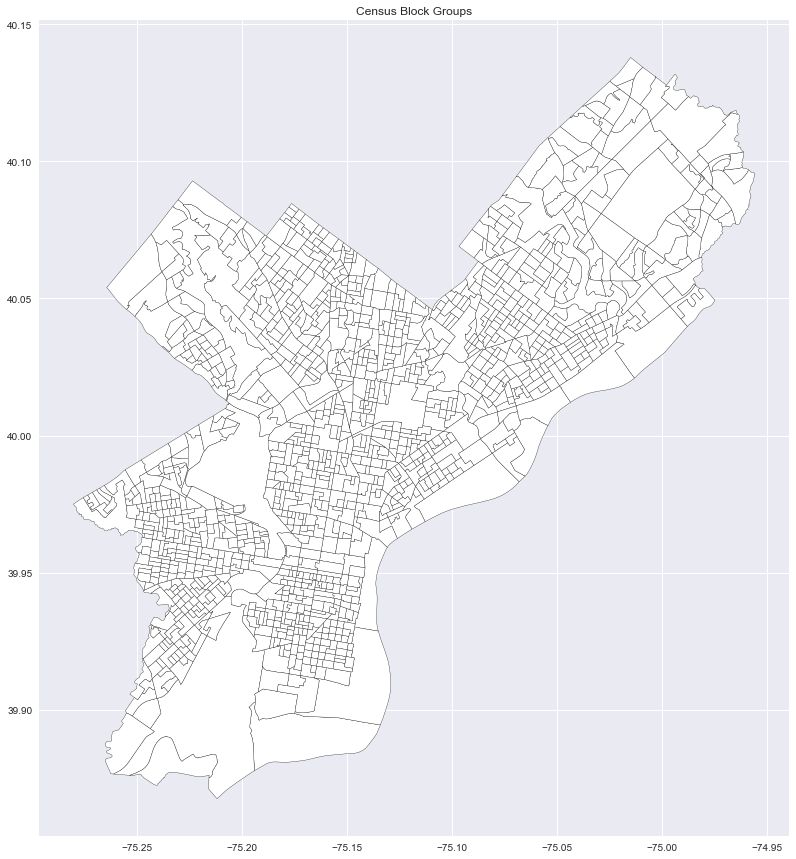

In [860]:
#plotting map using the census blockgroup
fig, ax = plt.subplots(figsize=(15,15))
plt.style.use('seaborn')
plt.title("Census Block Groups")
census_blockgroups.to_crs("EPSG:4269").plot(ax=ax, color='white', edgecolor='black')# epsg is the coordinate reference system(crs). 
#CRS tells python how these coordinates related to places on the Earth 
#"EPSG:4269" is for latitude, longitude projection

### Philly Shape file: Neighbourhoods
https://github.com/azavea/geo-data

In [851]:
street_map = gpd.read_file("data/geo_shape/Neighborhoods_Philadelphia.shp")#loading dataset
#Download shape file from here. Download all files under folder "Neighborhoods_philadelphia" and keep in the same folder https://github.com/azavea/geo-data

In [8]:
street_map.head()

NAME       LISTNAME        MAPNAME    Shape_Leng    Shape_Area  \
0     BRIDESBURG     Bridesburg     Bridesburg  27814.546521  4.458626e+07   
1      BUSTLETON      Bustleton      Bustleton  48868.458365  1.140504e+08   
2     CEDARBROOK     Cedarbrook     Cedarbrook  20021.415802  2.487174e+07   
3  CHESTNUT_HILL  Chestnut Hill  Chestnut Hill  56394.297195  7.966498e+07   
4     EAST_FALLS     East Falls     East Falls  27400.776417  4.057689e+07   

                                            geometry  
0  POLYGON ((2719789.837 256235.538, 2719814.855 ...  
1  POLYGON ((2733378.171 289259.945, 2732818.985 ...  
2  POLYGON ((2685267.950 279747.336, 2685272.265 ...  
3  POLYGON ((2678490.151 284400.400, 2678518.732 ...  
4  POLYGON ((2686769.727 263625.367, 2686921.108 ...

<AxesSubplot:title={'center':'Neighbourhoods'}>

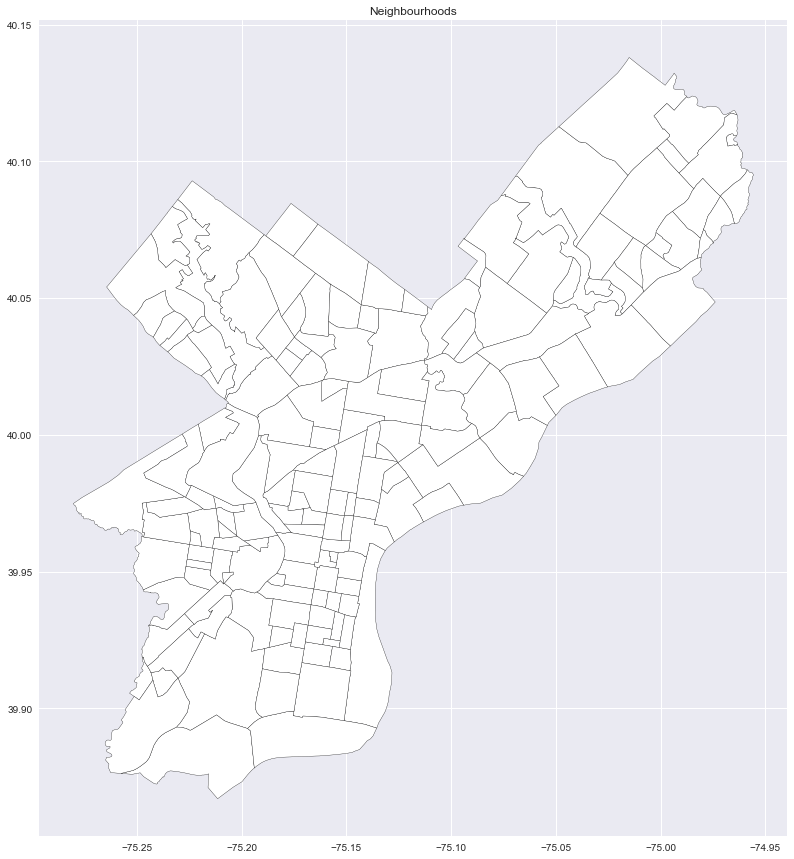

In [859]:
#Plotting with neighbourhoods
fig,ax = plt.subplots(figsize =(15,15))
plt.title("Neighbourhoods")
street_map.to_crs(epsg = 4326).plot(ax = ax, color = "white", edgecolor='black')# converting axis to coordiate with longitude and latitude
#street_map.to_crs(epsg = 4326).boundary.plot(ax = ax)# plotting only boundary

In [11]:
street_map.total_bounds# exact city boundary

array([2660586.2010556 ,  204650.55486186, 2750109.00494927,
        304965.32339202])

In [12]:
street_map.centroid# center coordinate of the sape

0      POINT (2719422.233 253264.287)
1      POINT (2725947.795 288491.804)
2      POINT (2688745.576 280652.166)
3      POINT (2679098.697 279137.188)
4      POINT (2685458.776 259484.374)
                    ...              
153    POINT (2688489.596 218958.968)
154    POINT (2697705.388 227294.296)
155    POINT (2691305.087 226663.440)
156    POINT (2688805.843 226518.573)
157    POINT (2693761.573 226871.685)
Length: 158, dtype: geometry

### Philly Shape Files: Zip Codes
Source:
https://www.opendataphilly.org/dataset/zip-codes

In [853]:
poly_zip = gpd.read_file("data/zip_shape/Zipcodes_Poly-shp/Zipcodes_Poly.shp")# uploading dataset
poly_zip.head()

OBJECTID   CODE  COD    Shape__Are    Shape__Len  \
0         1  19120   20  9.177970e+07  49921.544063   
1         2  19121   21  6.959879e+07  39534.887217   
2         3  19122   22  3.591632e+07  24124.645221   
3         4  19123   23  3.585175e+07  26421.728982   
4         5  19124   24  1.448080e+08  63658.770420   

                                            geometry  
0  POLYGON ((-75.11107 40.04682, -75.10943 40.045...  
1  POLYGON ((-75.19227 39.99463, -75.19205 39.994...  
2  POLYGON ((-75.15406 39.98601, -75.15328 39.985...  
3  POLYGON ((-75.15190 39.97056, -75.15150 39.970...  
4  POLYGON ((-75.09660 40.04249, -75.09281 40.039...

In [854]:
poly_zip.dtypes

OBJECTID         int64
CODE            object
COD              int64
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

<AxesSubplot:title={'center':'ZIP Codes'}>

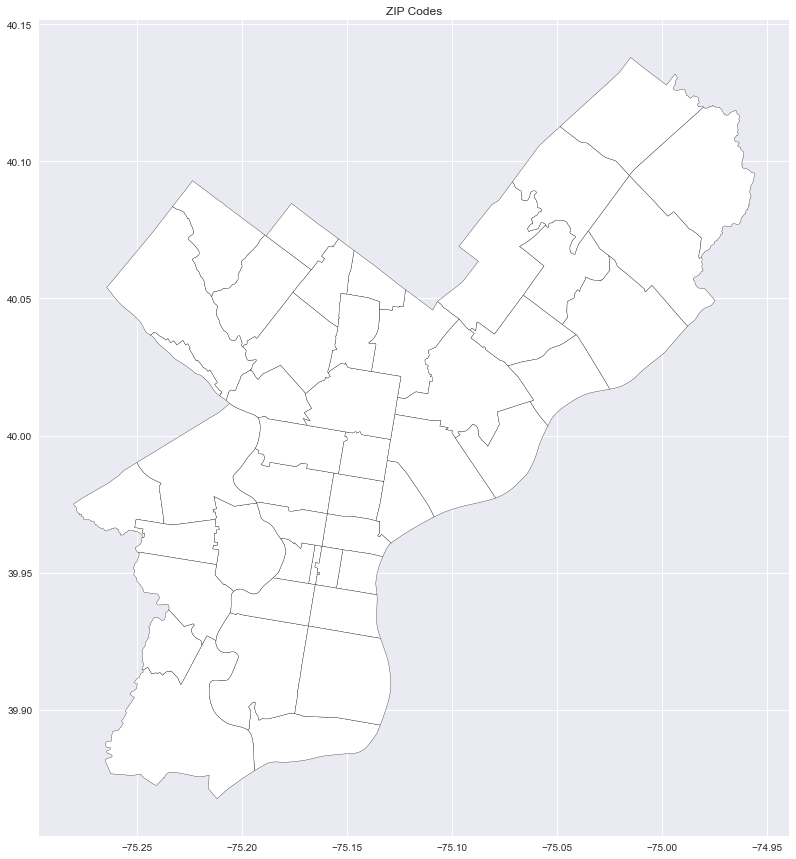

In [858]:
#plotting with zip codes
fig,ax = plt.subplots(figsize =(15,15))
plt.title("ZIP Codes")
poly_zip.to_crs(epsg = 4326).plot(ax = ax, color = "white", edgecolor='black')

### Open Street Map Files
https://download.geofabrik.de/north-america/us/pennsylvania.htm

http://download.geofabrik.de/osm-data-in-gis-formats-free.pdf

We are still deciding how and where to use this dataset

In [ ]:
#download pennsylvania open street map data
roads_path = "data/osm/gis_osm_roads_free_1.shp" #loading the roads file from open map
roads = gpd.read_file(roads_path, encoding='utf-8')

In [ ]:
roads_new = roads.to_crs(epsg = 4326)
street_map_new = street_map.to_crs(epsg = 4326) # neighbourhood shape file

In [ ]:
street_map_new.head()

NAME       LISTNAME        MAPNAME    Shape_Leng    Shape_Area  \
0     BRIDESBURG     Bridesburg     Bridesburg  27814.546521  4.458626e+07   
1      BUSTLETON      Bustleton      Bustleton  48868.458365  1.140504e+08   
2     CEDARBROOK     Cedarbrook     Cedarbrook  20021.415802  2.487174e+07   
3  CHESTNUT_HILL  Chestnut Hill  Chestnut Hill  56394.297195  7.966498e+07   
4     EAST_FALLS     East Falls     East Falls  27400.776417  4.057689e+07   

                                            geometry  
0  POLYGON ((-75.06773 40.00540, -75.06765 40.005...  
1  POLYGON ((-75.01560 40.09487, -75.01768 40.092...  
2  POLYGON ((-75.18848 40.07273, -75.18846 40.072...  
3  POLYGON ((-75.21221 40.08604, -75.21210 40.086...  
4  POLYGON ((-75.18478 40.02837, -75.18426 40.027...

In [ ]:
roads_new.head()

osm_id  code    fclass                name             ref oneway  \
0  368034  5115  tertiary       Seaport Drive            None      F   
1  368041  5113   primary  Industrial Highway    US 13;PA 291      B   
2  368043  5115  tertiary        Bullens Lane            None      F   
3  368044  5113   primary        Chester Road          PA 320      B   
4  418185  5113   primary     East 9th Street  US 13 Business      B   

   maxspeed  layer bridge tunnel  \
0         0      0      F      F   
1         0      0      F      F   
2        56      0      F      F   
3        64      1      T      F   
4        56      0      F      F   

                                            geometry  
0  LINESTRING (-75.38773 39.82798, -75.38600 39.8...  
1  LINESTRING (-75.35786 39.84750, -75.35676 39.8...  
2  LINESTRING (-75.35060 39.86874, -75.35050 39.8...  
3  LINESTRING (-75.36147 39.87190, -75.36118 39.8...  
4  LINESTRING (-75.35941 39.85319, -75.35874 39.8...

In [ ]:
#filtering only for philadelphia shape using neighbourhood shape file
roads = gpd.sjoin(roads_new, street_map_new, predicate ='intersects') # joining both datasets based on their locations

In [ ]:
roads.head()

osm_id  code       fclass            name   ref oneway  maxspeed  \
235570  12108955  5122  residential  Brunner Street  None      F         0   
235571  12108958  5122  residential  Brunner Street  None      F         0   
238204  12119360  5122  residential    Gratz Street  None      F         0   
239953  12133630  5122  residential    Staub Street  None      B         0   
239955  12133635  5122  residential    Staub Street  None      F         0   

        layer bridge tunnel  \
235570      0      F      F   
235571      0      F      F   
238204      0      F      F   
239953      0      F      F   
239955      0      F      F   

                                                 geometry  index_right  \
235570  LINESTRING (-75.15542 40.01863, -75.15717 40.0...           61   
235571  LINESTRING (-75.15710 40.01773, -75.15856 40.0...           61   
238204  LINESTRING (-75.15635 40.02050, -75.15634 40.0...           61   
239953  LINESTRING (-75.15447 40.01708, -75.15510 40.0...           61   
239955  LINESTRING (-75.15458 40.01727, -75.15440 40.0...           61   

            NAME  LISTNAME   MAPNAME    Shape_Leng    Shape_Area  
235570  NICETOWN  Nicetown  Nicetown  11237.318154  6.587596e+06  
235571  NICETOWN  Nicetown  Nicetown  11237.318154  6.587596e+06  
238204  NICETOWN  Nicetown  Nicetown  11237.318154  6.587596e+06  
239953  NICETOWN  Nicetown  Nicetown  11237.318154  6.587596e+06  
239955  NICETOWN  Nicetown  Nicetown  11237.318154  6.587596e+06

In [ ]:
roads.shape

(72827, 17)

In [ ]:
roads.fclass.value_counts()# this shows the type of roads. Most of the roads are  ones that are used for service, foorway and residential

service           26354
footway           19962
residential       13744
primary            3392
tertiary           2338
secondary          2009
path               1132
trunk               688
motorway_link       649
motorway            625
steps               569
cycleway            351
trunk_link          190
pedestrian          190
unclassified        153
primary_link        150
track               123
secondary_link       87
tertiary_link        62
bridleway            41
track_grade2          5
living_street         5
unknown               4
track_grade5          2
track_grade1          2
Name: fclass, dtype: int64

In [ ]:
#selecting roads where card travel
car_roads = roads[(roads.fclass == 'tertiary') |
                  (roads.fclass == 'tertiary_link') |
                  (roads.fclass == 'secondary') |
                  (roads.fclass == 'secondary_link') |
                  (roads.fclass == 'primary') |
                  (roads.fclass == 'primary_link') |
                  (roads.fclass == 'motorway') |
                  (roads.fclass == 'motorway_linkt')]
                  
car_roads.shape

(8663, 17)

Text(0.5, 1.0, 'Car Roads')

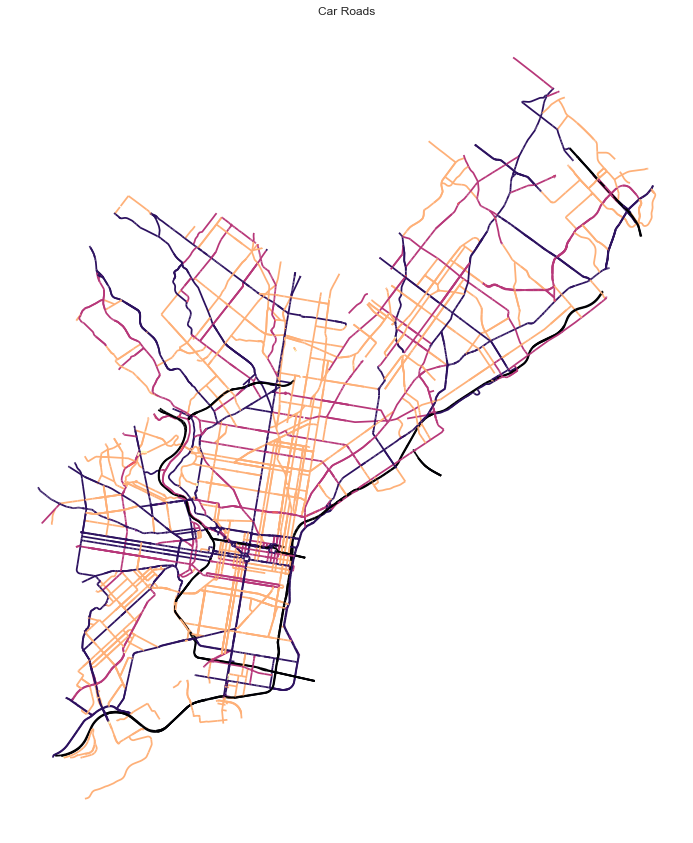

In [ ]:
#plotting with different type of roads
fig, ax = plt.subplots(figsize =(15,15))
car_roads.plot(ax = ax, markersize=0.01, column='fclass',figsize=(5, 5), cmap = 'magma')
plt.axis('off');
plt.title("Car Roads")

Text(0.5, 1.0, 'Main Roads - Philadelphia')

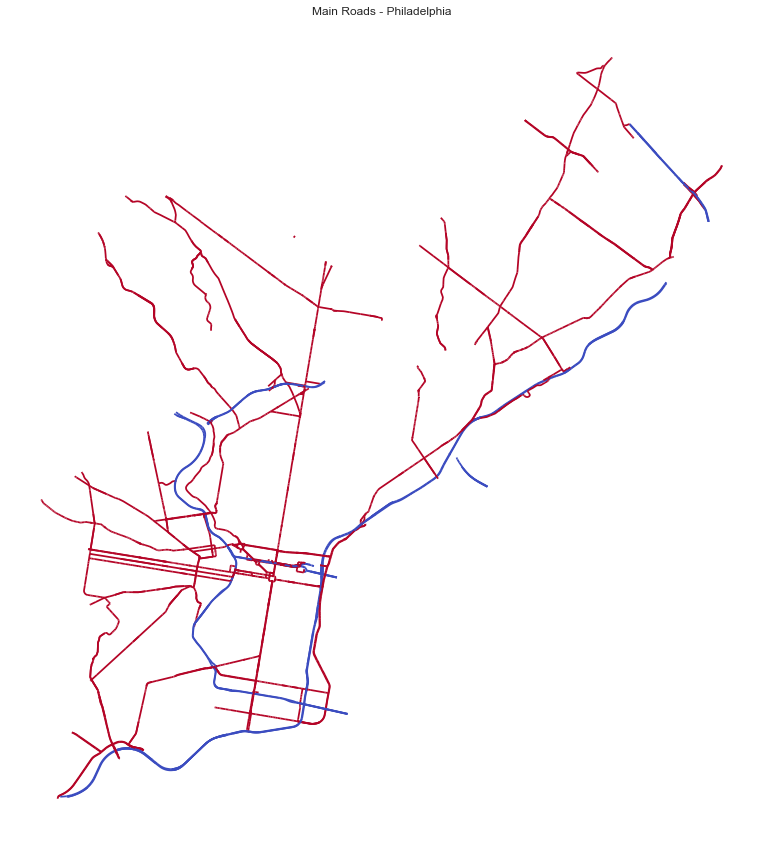

In [ ]:
#plotting with main roads only
main_roads = car_roads[(car_roads.fclass == 'primary') |
                       (car_roads.fclass == 'motorway')
                      ]#selectng only primary and motorways

fig, ax = plt.subplots(figsize =(15,15))
main_roads.plot(ax = ax, column='fclass', cmap = 'coolwarm')
plt.axis('off')
plt.title("Main Roads - Philadelphia")

### City of Philadelphia: Predicted Vacant Lot


In [ ]:
philly_points = pd.read_csv('data/city/Vacant_Indicators_Points.csv') #loading the dataset
philly_points.head()
#https://metadata.phila.gov/#home/datasetdetails/58078697d414285d25b14e3c/representationdetails/59c154f1c8357d22ed035e66/

X          Y  OBJECTID            ADDRESS  \
0 -75.178904  39.934505         1       2041 REED ST   
1 -75.164548  39.988160         2     2233 N UBER ST   
2 -75.180480  39.978561         3  1460 N MARSTON ST   
3 -75.186579  40.006852         4   3241 SUGDENS ROW   
4 -75.238794  39.954902         5       5816 PINE ST   

                      OWNER1            OWNER2              BLDG_DESC  \
0  GREATER DELIVERANCE TEMPL               NaN  VAC LAND COMM. < ACRE   
1              CITY OF PHILA               NaN    VAC LAND RES < ACRE   
2  PHILADELPHIA HOUSING AUTH               NaN    VAC LAND RES < ACRE   
3               JORDAN MARIA               NaN    VAC LAND RES < ACRE   
4                WALSH JAMES  LUBLIN WILLIAM H      ROW 2 STY MASONRY   

        OPA_ID LNIADDRESSKEY  COUNCILDISTRICT ZONINGBASEDISTRICT  ZIPCODE  \
0  885396760.0        498086                2              CMX-2  19146.0   
1  162113701.0        581713                5              RSA-5  19132.0   
2  292083110.0        415511                5              RSA-5  19121.0   
3  382209500.0        557317                4              RSA-5  19129.0   
4  604178400.0        485528                3               RM-1  19143.0   

   LAND_RANK  BUILD_RANK VACANT_FLAG  VACANT_RANK  
0       0.67         0.0        Land         0.67  
1       0.50         0.0        Land         0.50  
2       0.50         0.0        Land         0.50  
3       1.00         0.0        Land         1.00  
4       0.00         1.0    Building         1.00

In [862]:
philly_points.shape

(36917, 16)

In [ ]:
philly_points.dtypes #Type of data

X                     float64
Y                     float64
OBJECTID                int64
ADDRESS                object
OWNER1                 object
OWNER2                 object
BLDG_DESC              object
OPA_ID                float64
LNIADDRESSKEY          object
COUNCILDISTRICT         int64
ZONINGBASEDISTRICT     object
ZIPCODE               float64
LAND_RANK             float64
BUILD_RANK            float64
VACANT_FLAG            object
VACANT_RANK           float64
dtype: object

In [ ]:
philly_points.isna().sum() # sum of null values in each column

X                         0
Y                         0
OBJECTID                  0
ADDRESS                   1
OWNER1                    1
OWNER2                28556
BLDG_DESC                70
OPA_ID                   21
LNIADDRESSKEY           336
COUNCILDISTRICT           0
ZONINGBASEDISTRICT       40
ZIPCODE                 322
LAND_RANK                 2
BUILD_RANK                0
VACANT_FLAG               2
VACANT_RANK               2
dtype: int64

In [861]:
philly_points.describe(include = 'all') # Vacant flag column indicates if the property is likely to be a vacant building or vacant land

X             Y     OBJECTID             ADDRESS  \
count   36917.000000  36917.000000  36917.00000               36916   
unique           NaN           NaN          NaN               36855   
top              NaN           NaN          NaN  4923R-47 N 16TH ST   
freq             NaN           NaN          NaN                  27   
mean      -75.167337     39.985244  18459.00000                 NaN   
std         0.041322      0.031944  10657.16428                 NaN   
min       -75.269183     39.883301      1.00000                 NaN   
25%       -75.189216     39.968623   9230.00000                 NaN   
50%       -75.165435     39.986638  18459.00000                 NaN   
75%       -75.144508     39.999227  27688.00000                 NaN   
max       -74.964149     40.135042  36917.00000                 NaN   

               OWNER1           OWNER2            BLDG_DESC        OPA_ID  \
count           36916             8361                36847  3.689600e+04   
unique          20842             4550                  311           NaN   
top     CITY OF PHILA  OF PHILADELPHIA  VAC LAND RES < ACRE           NaN   
freq             2412              642                23752           NaN   
mean              NaN              NaN                  NaN  3.431197e+08   
std               NaN              NaN                  NaN  2.276140e+08   
min               NaN              NaN                  NaN  1.100490e+07   
25%               NaN              NaN                  NaN  1.831285e+08   
50%               NaN              NaN                  NaN  3.110167e+08   
75%               NaN              NaN                  NaN  4.320889e+08   
max               NaN              NaN                  NaN  8.886000e+08   

       LNIADDRESSKEY  COUNCILDISTRICT ZONINGBASEDISTRICT       ZIPCODE  \
count          36581     36917.000000              36877  36595.000000   
unique         36523              NaN                 34           NaN   
top           749746              NaN              RSA-5           NaN   
freq              27              NaN              20941           NaN   
mean             NaN         4.913211                NaN  19131.573330   
std              NaN         2.175462                NaN     11.154188   
min              NaN         1.000000                NaN  19102.000000   
25%              NaN         3.000000                NaN  19122.000000   
50%              NaN         5.000000                NaN  19133.000000   
75%              NaN         7.000000                NaN  19140.000000   
max              NaN        10.000000                NaN  19154.000000   

           LAND_RANK    BUILD_RANK VACANT_FLAG   VACANT_RANK  
count   36915.000000  36917.000000       36915  36915.000000  
unique           NaN           NaN           2           NaN  
top              NaN           NaN        Land           NaN  
freq             NaN           NaN       27613           NaN  
mean        0.525169      0.150244         NaN      0.665391  
std         0.343984      0.252557         NaN      0.184587  
min         0.000000      0.000000         NaN      0.500000  
25%         0.415000      0.000000         NaN      0.500000  
50%         0.500000      0.000000         NaN      0.670000  
75%         0.670000      0.500000         NaN      0.670000  
max         1.000000      1.000000         NaN      1.000000

/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_74088/469468503.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  philly_points.hist(ax = ax)


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'OBJECTID'}>],
       [<AxesSubplot:title={'center':'OPA_ID'}>,
        <AxesSubplot:title={'center':'COUNCILDISTRICT'}>,
        <AxesSubplot:title={'center':'ZIPCODE'}>],
       [<AxesSubplot:title={'center':'LAND_RANK'}>,
        <AxesSubplot:title={'center':'BUILD_RANK'}>,
        <AxesSubplot:title={'center':'VACANT_RANK'}>]], dtype=object)

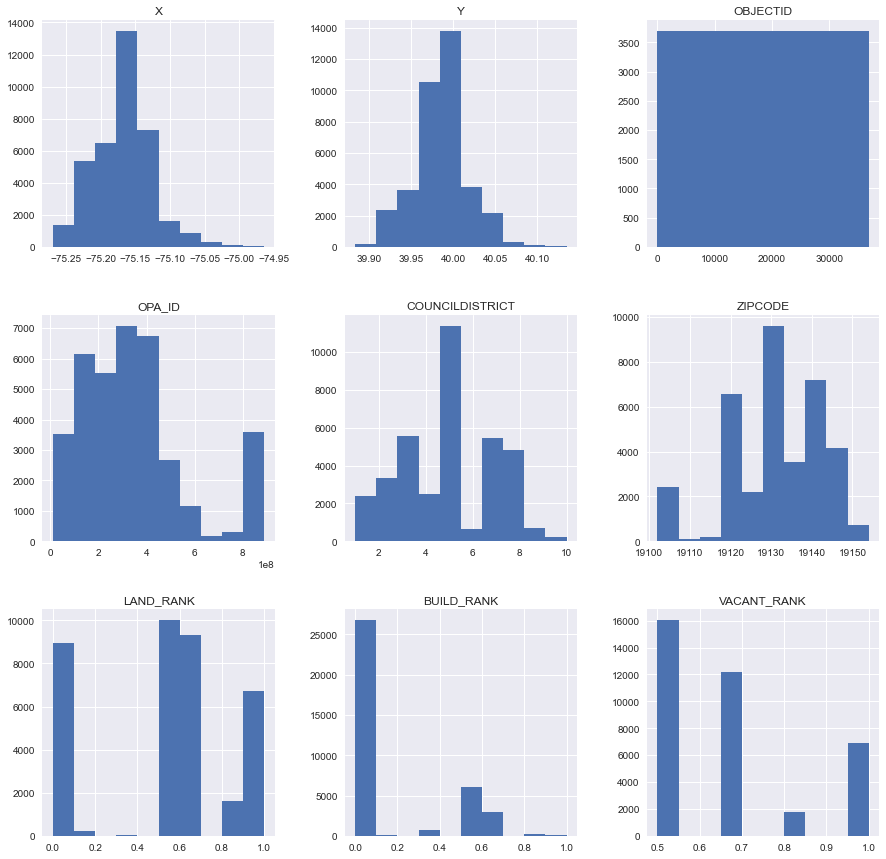

In [864]:
fig,ax = plt.subplots(figsize =(15,15))
philly_points.hist(ax = ax)#plotting histogram of the dataset to make sure all data is fine

In [867]:
#X and Y columns are latitude and longitude columns. Both columns need to be combined for into a geometry column for geo pandas to read and plot the data
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(philly_points["X"], philly_points["Y"])] 
geometry[:3]

In [868]:
philly_points = gpd.GeoDataFrame(philly_points,
                            crs = crs,
                            geometry = geometry)

philly_points.head()

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


X          Y  OBJECTID            ADDRESS  \
0 -75.178904  39.934505         1       2041 REED ST   
1 -75.164548  39.988160         2     2233 N UBER ST   
2 -75.180480  39.978561         3  1460 N MARSTON ST   
3 -75.186579  40.006852         4   3241 SUGDENS ROW   
4 -75.238794  39.954902         5       5816 PINE ST   

                      OWNER1            OWNER2              BLDG_DESC  \
0  GREATER DELIVERANCE TEMPL               NaN  VAC LAND COMM. < ACRE   
1              CITY OF PHILA               NaN    VAC LAND RES < ACRE   
2  PHILADELPHIA HOUSING AUTH               NaN    VAC LAND RES < ACRE   
3               JORDAN MARIA               NaN    VAC LAND RES < ACRE   
4                WALSH JAMES  LUBLIN WILLIAM H      ROW 2 STY MASONRY   

        OPA_ID LNIADDRESSKEY  COUNCILDISTRICT ZONINGBASEDISTRICT  ZIPCODE  \
0  885396760.0        498086                2              CMX-2  19146.0   
1  162113701.0        581713                5              RSA-5  19132.0   
2  292083110.0        415511                5              RSA-5  19121.0   
3  382209500.0        557317                4              RSA-5  19129.0   
4  604178400.0        485528                3               RM-1  19143.0   

   LAND_RANK  BUILD_RANK VACANT_FLAG  VACANT_RANK                    geometry  
0       0.67         0.0        Land         0.67  POINT (-75.17890 39.93451)  
1       0.50         0.0        Land         0.50  POINT (-75.16455 39.98816)  
2       0.50         0.0        Land         0.50  POINT (-75.18048 39.97856)  
3       1.00         0.0        Land         1.00  POINT (-75.18658 40.00685)  
4       0.00         1.0    Building         1.00  POINT (-75.23879 39.95490)

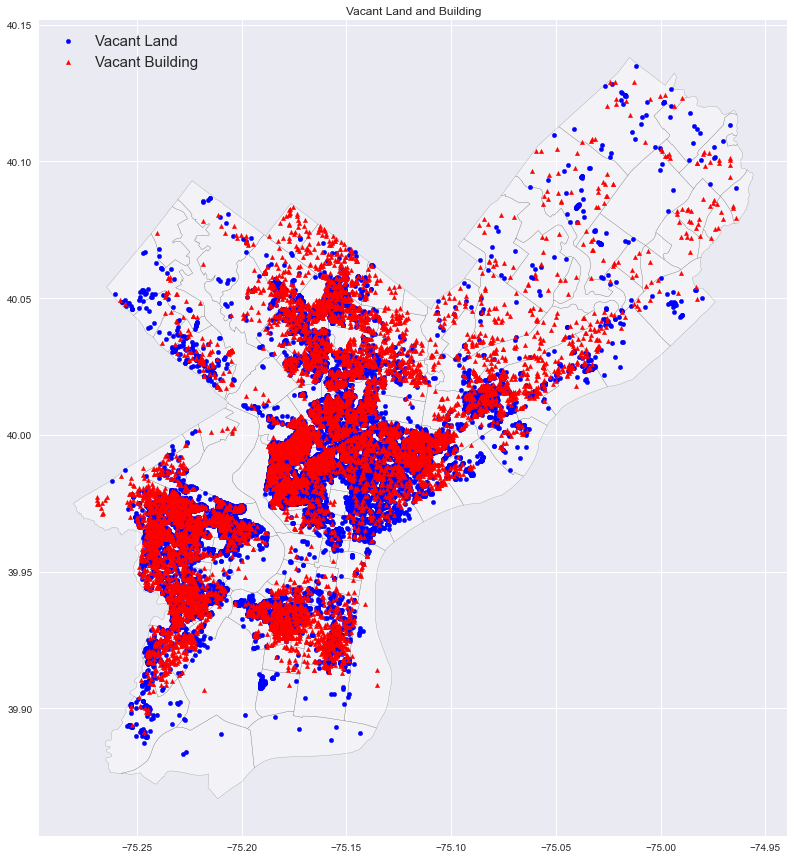

In [869]:
#Plotting Vacant land and Vacant buildings
fig, ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
plt.title('Vacant Land and Building')
philly_points[philly_points['VACANT_FLAG'] == 'Land'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Vacant Land")
philly_points[philly_points['VACANT_FLAG'] == 'Building'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Vacant Building")
plt.legend(prop = {'size' : 15})

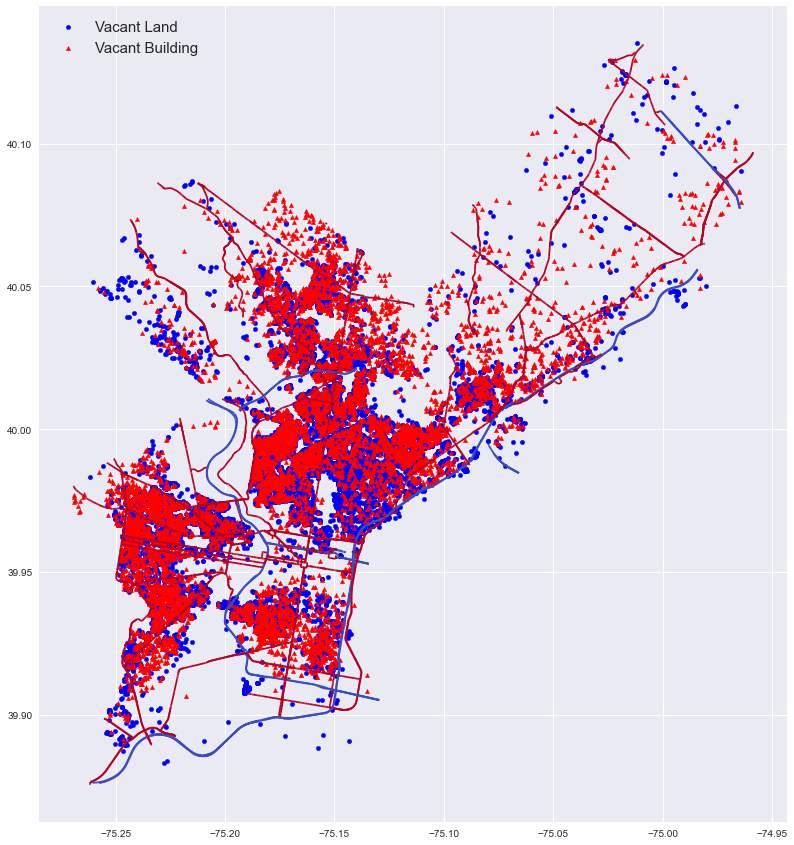

In [41]:
#vacant land and vant building layer on top of main roads in philadelphia
fig, ax = plt.subplots(figsize =(15,15))
plt.title("Predicted Vacant Land & Building with Main Roads")
main_roads.plot(ax = ax, column='fclass', cmap = 'coolwarm')
philly_points[philly_points['VACANT_FLAG'] == 'Land'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Vacant Land")
philly_points[philly_points['VACANT_FLAG'] == 'Building'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Vacant Building")
plt.legend(prop = {'size' : 15})

### American Community Survey(ACS)

Census Bureau has data that is in the following levels: states > counties > tracts > blockgroups > blocks 

Tracts are  fairly homogenous, when tract is beyond 800 people the tract is split up
Blockgroup contains blocks. Block groups have between 250 and 550 housing units. Census block is the smalest geographic census unit. Blocks can be bounded by visible features—such as streets—or by invisible boundaries, such as city limits.Census blocks are often the same as ordinary city blocks. Census blocks change every decade.

In [870]:
censusdata.search('acs5', 2019,'label', 'vacant')# finding 5 year ACS estimates from 2015 with vacant in the concept

[('B25002_003E', 'OCCUPANCY STATUS', 'Estimate!!Total:!!Vacant'),
 ('B25004_008E', 'VACANCY STATUS', 'Estimate!!Total:!!Other vacant'),
 ('B25005_002E',
  'VACANT - CURRENT RESIDENCE ELSEWHERE',
  'Estimate!!Total:!!Vacant - current residence elsewhere'),
 ('B25005_003E',
  'VACANT - CURRENT RESIDENCE ELSEWHERE',
  'Estimate!!Total:!!All other vacant units')]

In [ ]:
states = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)#printing name of state and code in the dataset
print(states['Pennsylvania']) # pennsylvania is code 42

Summary level: 040, state:42


In [871]:
counties = censusdata.geographies(censusdata.censusgeo([('state', '42'), ('county', '*')]), 'acs5', 2015)#all counties in Pennsylvania. 
#We will be using Philadelphia county with the county code 101

In [ ]:
censusdata.geographies(censusdata.censusgeo([('state', '42'),('county', '101')]), 'acs5', 2015)# selecting philadelphia county only
# we will be using these location lode to pull data from teh census package

{'Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101')))}

In [872]:
list_blockgroup = censusdata.geographies(censusdata.censusgeo([('state', '42'),('county', '101'), ('block group', '*')]), 'acs5', 2019)
# all block group in philadelphia county

### ACS: Occupancy Status
Data shows places that are occupied or vacant

In [17]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B25002')) #selecting the occupancy table and it shows the columns available

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25002_001E  | OCCUPANCY STATUS               | !! Estimate Total                                        | int  
B25002_002E  | OCCUPANCY STATUS               | !! !! Estimate Total Occupied                            | int  
B25002_003E  | OCCUPANCY STATUS               | !! !! Estimate Total Vacant                              | int  
-------------------------------------------------------------------------------------------------------------------


In [794]:
acs_occupancy = censusdata.download('acs5', 2019,
           censusdata.censusgeo([('state', '42'),# PS State
                                 ('county', '101'), # philadelphia county
                                 ('block group', '*')]),#all blockgroups
                                 ['B25002_001E', 'B25002_002E','B25002_003E'])# selecting which columns I would like to use

acs_occupancy.rename(columns = {'B25002_001E': 'total',
                                'B25002_002E': 'occupied',
                                'B25002_003E' : 'vacant'}, inplace = True)# renaming all columns

acs_occupancy.to_csv('data/acs/occupancy.csv') # download the data in my computer
acs_occupancy.head()

total  occupied  vacant
Block Group 1, Census Tract 9807, Philadelphia ...      0         0       0
Block Group 3, Census Tract 27.01, Philadelphia...    707       616      91
Block Group 2, Census Tract 337.01, Philadelphi...    400       400       0
Block Group 3, Census Tract 337.01, Philadelphi...   1451      1340     111
Block Group 2, Census Tract 205, Philadelphia C...    774       668     106

In [797]:
#convering the first column into different columns for county, census tract and census blockgroup
acs_occupancy = acs_occupancy.reset_index() #reseting the index
acs_occupancy['index'] = acs_occupancy['index'].astype(str)# turning all values into string
acs_occupancy[['census_info','county', 'census_tract', 'census_blockgroup']] = acs_occupancy['index'].str.split('>', expand = True) #splitting the column based on '>'
acs_occupancy.head()

index  total  occupied  vacant  \
0  Block Group 1, Census Tract 9807, Philadelphia...      0         0       0   
1  Block Group 3, Census Tract 27.01, Philadelphi...    707       616      91   
2  Block Group 2, Census Tract 337.01, Philadelph...    400       400       0   
3  Block Group 3, Census Tract 337.01, Philadelph...   1451      1340     111   
4  Block Group 2, Census Tract 205, Philadelphia ...    774       668     106   

                                         census_info       county  \
0  Block Group 1, Census Tract 9807, Philadelphia...   county:101   
1  Block Group 3, Census Tract 27.01, Philadelphi...   county:101   
2  Block Group 2, Census Tract 337.01, Philadelph...   county:101   
3  Block Group 3, Census Tract 337.01, Philadelph...   county:101   
4  Block Group 2, Census Tract 205, Philadelphia ...   county:101   

    census_tract census_blockgroup  
0   tract:980700     block group:1  
1   tract:002701     block group:3  
2   tract:033701     block group:2  
3   tract:033701     block group:3  
4   tract:020500     block group:2

In [804]:
#removing unnecessary words from the new columns eg county, tract, blockgroup
acs_occupancy['county'] = acs_occupancy['county'].str.replace('county:', '', regex = False)
acs_occupancy['census_tract'] = acs_occupancy['census_tract'].str.replace('tract:', '', regex = False)
acs_occupancy['census_blockgroup'] = acs_occupancy['census_blockgroup'].str.replace('block group:', '', regex = False)

In [805]:
acs_occupancy.head()

index  total  occupied  vacant  \
0  Block Group 1, Census Tract 9807, Philadelphia...      0         0       0   
1  Block Group 3, Census Tract 27.01, Philadelphi...    707       616      91   
2  Block Group 2, Census Tract 337.01, Philadelph...    400       400       0   
3  Block Group 3, Census Tract 337.01, Philadelph...   1451      1340     111   
4  Block Group 2, Census Tract 205, Philadelphia ...    774       668     106   

                                         census_info county census_tract  \
0  Block Group 1, Census Tract 9807, Philadelphia...    101       980700   
1  Block Group 3, Census Tract 27.01, Philadelphi...    101       002701   
2  Block Group 2, Census Tract 337.01, Philadelph...    101       033701   
3  Block Group 3, Census Tract 337.01, Philadelph...    101       033701   
4  Block Group 2, Census Tract 205, Philadelphia ...    101       020500   

  census_blockgroup  
0                 1  
1                 3  
2                 2  
3                 3  
4                 2

In [806]:
acs_occupancy.dtypes # datatype of columns

index                object
total                 int64
occupied              int64
vacant                int64
census_info          object
county               object
census_tract         object
census_blockgroup    object
dtype: object

In [ ]:
acs_occupancy['perc_vacant'] = acs_occupancy['vacant']/acs_occupancy['total']#creating new column which has percentage of vacant lot

In [877]:
acs_occupancy.describe(include = 'all')# some block groups have 54% vacant places

index        total  \
count                                                1336  1336.000000   
unique                                               1336          NaN   
top     Block Group 1, Census Tract 9807, Philadelphia...          NaN   
freq                                                    1          NaN   
mean                                                  NaN   513.440120   
std                                                   NaN   254.862223   
min                                                   NaN     0.000000   
25%                                                   NaN   348.000000   
50%                                                   NaN   460.500000   
75%                                                   NaN   619.500000   
max                                                   NaN  2043.000000   

           occupied       vacant  \
count   1336.000000  1336.000000   
unique          NaN          NaN   
top             NaN          NaN   
freq            NaN          NaN   
mean     450.102545    63.337575   
std      232.346504    58.294697   
min        0.000000     0.000000   
25%      303.000000    22.750000   
50%      397.000000    51.000000   
75%      554.250000    92.000000   
max     1850.000000   460.000000   

                                              census_info county  \
count                                                1336   1336   
unique                                               1336      1   
top     Block Group 1, Census Tract 9807, Philadelphia...    101   
freq                                                    1   1336   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN   
25%                                                   NaN    NaN   
50%                                                   NaN    NaN   
75%                                                   NaN    NaN   
max                                                   NaN    NaN   

         census_tract  census_blockgroup  perc_vacant  
count     1336.000000        1336.000000  1326.000000  
unique            NaN                NaN          NaN  
top               NaN                NaN          NaN  
freq              NaN                NaN          NaN  
mean     27668.919910           2.598802     0.125781  
std      87647.462929           1.496302     0.103121  
min        100.000000           1.000000     0.000000  
25%       9500.000000           1.000000     0.049860  
50%      19800.000000           2.000000     0.106026  
75%      30200.000000           3.000000     0.185122  
max     989100.000000           8.000000     0.542645

In [881]:
acs_occupancy.sum() #there are less vacant lots than occupies lots

index                Block Group 1, Census Tract 9807, Philadelphia...
total                                                           685956
occupied                                                        601337
vacant                                                           84619
census_info          Block Group 1, Census Tract 9807, Philadelphia...
county                101 101 101 101 101 101 101 101 101 101 101 1...
census_tract                                                  36965677
census_blockgroup                                                 3472
perc_vacant                                                 166.785284
dtype: object

/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_74088/2571989370.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  acs_occupancy.hist(ax = ax) # vacant places are skwed


array([[<AxesSubplot:title={'center':'total'}>,
        <AxesSubplot:title={'center':'occupied'}>],
       [<AxesSubplot:title={'center':'vacant'}>,
        <AxesSubplot:title={'center':'census_tract'}>],
       [<AxesSubplot:title={'center':'census_blockgroup'}>,
        <AxesSubplot:title={'center':'perc_vacant'}>]], dtype=object)

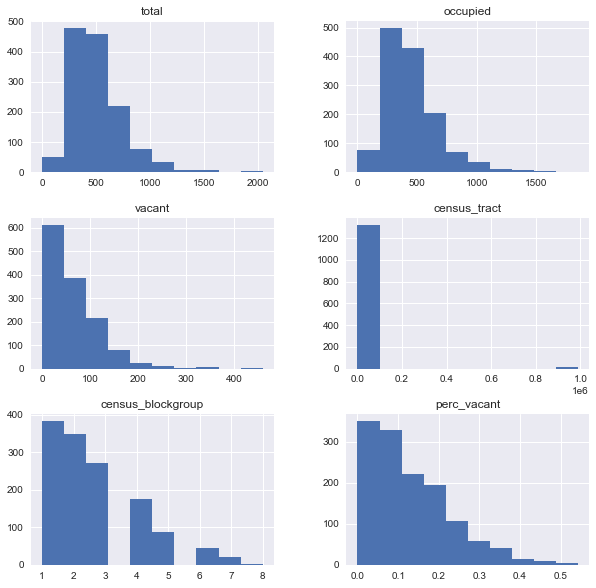

In [876]:
fig, ax = plt.subplots(figsize =(10,10))
acs_occupancy.hist(ax = ax) # vacant places are skwed 

In [817]:
#converting tract and blockgroups into integer so that we can join dataset easily
acs_occupancy['census_tract'] = acs_occupancy['census_tract'].astype(int)
acs_occupancy['census_blockgroup'] = acs_occupancy['census_blockgroup'].astype(int)

census_blockgroups['TRACTCE10'] = census_blockgroups['TRACTCE10'].astype(int)
census_blockgroups['BLKGRPCE10'] = census_blockgroups['BLKGRPCE10'].astype(int)

In [878]:
#merging occupancy acs dataset with blockgroup shape file 
occupancy = census_blockgroups.merge(acs_occupancy, how='left', left_on=["TRACTCE10", "BLKGRPCE10"], right_on=["census_tract","census_blockgroup"])

In [879]:
occupancy.head()

OBJECTID STATEFP10 COUNTYFP10  TRACTCE10  BLKGRPCE10       GEOID10  \
0         1        42        101      10800           1  421010108001   
1         2        42        101      10800           2  421010108002   
2         3        42        101      10900           2  421010109002   
3         4        42        101      11000           2  421010110002   
4         5        42        101      11000           1  421010110001   

      NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  ...  \
0  Block Group 1   G5030          S   161887  ...   
1  Block Group 2   G5030          S   103778  ...   
2  Block Group 2   G5030          S    43724  ...   
3  Block Group 2   G5030          S   108966  ...   
4  Block Group 1   G5030          S   142244  ...   

                                            geometry  \
0  POLYGON ((-75.19851 39.96945, -75.19744 39.969...   
1  POLYGON ((-75.19783 39.96571, -75.20006 39.965...   
2  POLYGON ((-75.18766 39.96450, -75.18755 39.963...   
3  POLYGON ((-75.20984 39.97351, -75.21221 39.973...   
4  POLYGON ((-75.19855 39.97330, -75.19854 39.973...   

                                               index total  occupied  vacant  \
0  Block Group 1, Census Tract 108, Philadelphia ...   243       202      41   
1  Block Group 2, Census Tract 108, Philadelphia ...   360       239     121   
2  Block Group 2, Census Tract 109, Philadelphia ...   236       221      15   
3  Block Group 2, Census Tract 110, Philadelphia ...   478       348     130   
4  Block Group 1, Census Tract 110, Philadelphia ...   240       187      53   

                                         census_info county  census_tract  \
0  Block Group 1, Census Tract 108, Philadelphia ...    101         10800   
1  Block Group 2, Census Tract 108, Philadelphia ...    101         10800   
2  Block Group 2, Census Tract 109, Philadelphia ...    101         10900   
3  Block Group 2, Census Tract 110, Philadelphia ...    101         11000   
4  Block Group 1, Census Tract 110, Philadelphia ...    101         11000   

   census_blockgroup  perc_vacant  
0                  1     0.168724  
1                  2     0.336111  
2                  2     0.063559  
3                  2     0.271967  
4                  1     0.220833  

[5 rows x 25 columns]

<AxesSubplot:title={'center':'ACS: Number of Vacant Places in each Block Group'}>

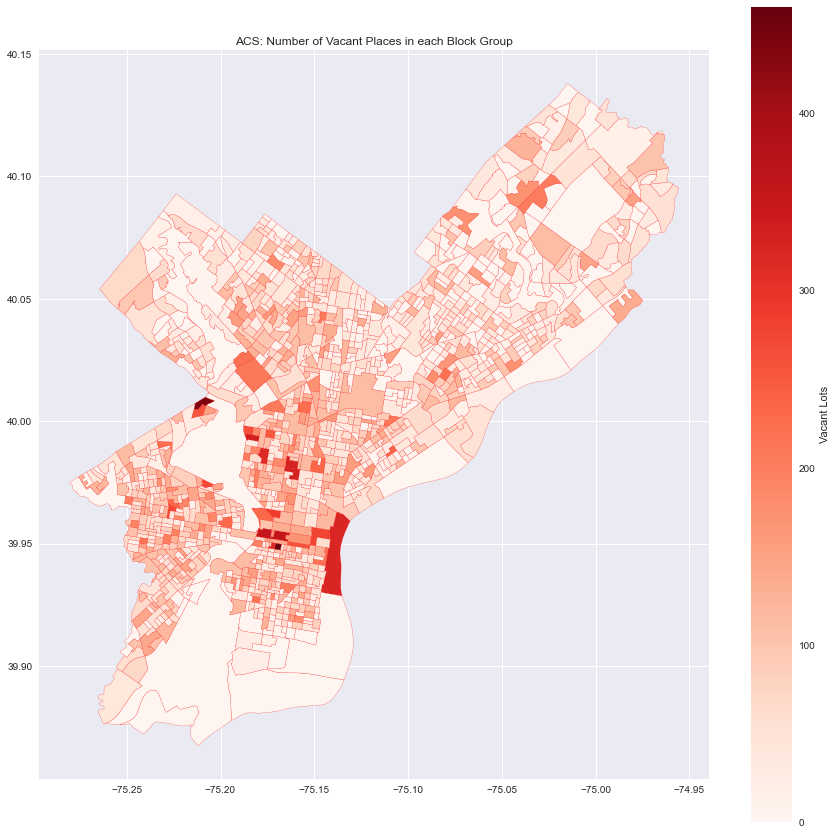

In [880]:
#plotting vacant lots on each block group
fig, ax = plt.subplots(figsize=(15,15))
plt.style.use('seaborn')
plt.title('ACS: Number of Vacant Places in each Block Group')
#census_blockgroups.to_crs("EPSG:4269").plot(ax=ax, color='white', edgecolor='black')
occupancy.plot(ax=ax, column='vacant',
            edgecolor='red', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Vacant Lots'})


<AxesSubplot:>

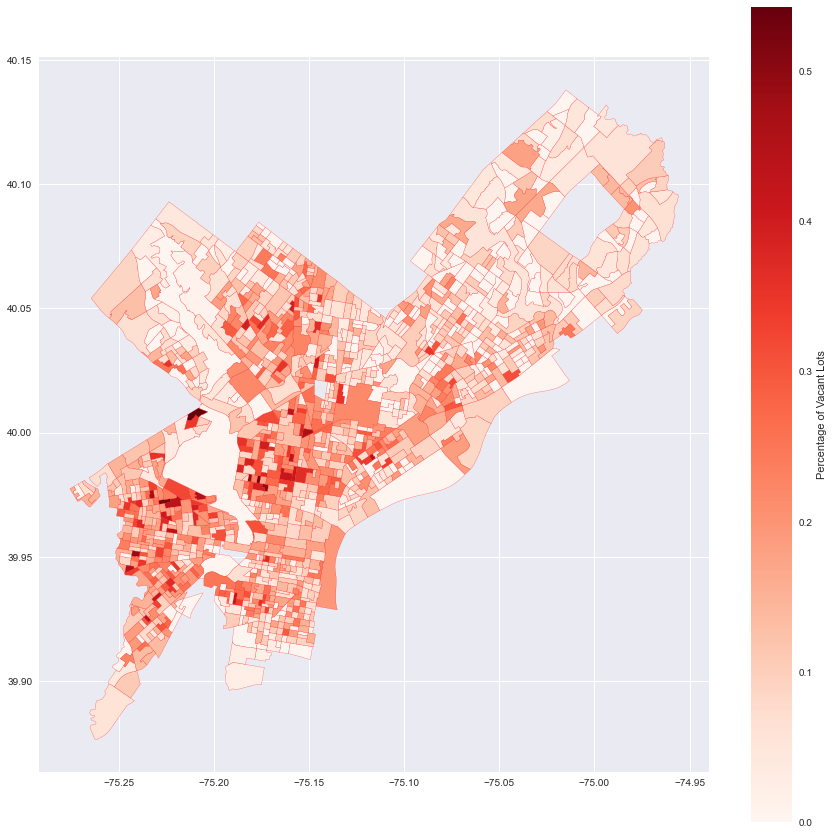

In [825]:
#plotting percentage of vacant lots on each block group
#this shows that when when you do percentage, the plot changes completely. Think would be a better variable to consider than just looking at vacant lots
fig, ax = plt.subplots(figsize=(15,15))
plt.style.use('seaborn')
plt.title('ACS: Percentage of Vacant Places in each Block Group')
#census_blockgroups.to_crs("EPSG:4269").plot(ax=ax, color='white', edgecolor='black')
occupancy.plot(ax=ax, column='perc_vacant',
            edgecolor='red', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Percentage of Vacant Lots'})

### ACS: Vacancy Type

In [98]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B25004'))# selecting type of vacancy table and the columns included

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25004_001E  | VACANCY STATUS                 | !! Estimate Total:                                       | int  
B25004_002E  | VACANCY STATUS                 | !! !! Estimate Total: For rent                           | int  
B25004_003E  | VACANCY STATUS                 | !! !! Estimate Total: Rented, not occupied               | int  
B25004_004E  | VACANCY STATUS                 | !! !! Estimate Total: For sale only                      | int  
B25004_005E  | VACANCY STATUS                 | !! !! Estimate Total: Sold, not occupied                 | int  
B25004_006E  | VACANCY STATUS                 | !! !! Estimate Total: For seasonal, recreational, or occ | int  
B25004_007E  | VACANCY STATUS                 | !! !! Estimate Total: For migrant workers    

In [135]:
acs_vacant_type = censusdata.download('acs5', 2019,
           censusdata.censusgeo([('state', '42'),
                                 ('county', '101'), # philadelphia county
                                 ('block group', '*')]),# all blockgroups
                                 ['B25004_001E', 'B25004_002E', 'B25004_003E', 'B25004_004E', 'B25004_005E', 'B25004_006E',
                                 'B25004_007E', 'B25004_008E'])#selecting all columns

acs_vacant_type.rename(columns = {'B25004_001E': 'total',
                                'B25004_002E':  'for_rent',
                                'B25004_003E' : 'rented_not_occupied',
                                'B25004_004E' : 'for_sale_only',
                                'B25004_005E' : 'sold_not_occupied',
                                'B25004_006E' : 'seasonal_recreational',
                                'B25004_007E' : 'migrant_workers',
                                'B25004_008E' : 'other'}, inplace = True)#renaming columns

acs_vacant_type.to_csv('data/acs/vacant_type.csv')#downloading dataset
acs_vacant_type.head()

total  for_rent  \
Block Group 1, Census Tract 9807, Philadelphia ...      0         0   
Block Group 3, Census Tract 27.01, Philadelphia...     91         0   
Block Group 2, Census Tract 337.01, Philadelphi...      0         0   
Block Group 3, Census Tract 337.01, Philadelphi...    111        73   
Block Group 2, Census Tract 205, Philadelphia C...    106         0   

                                                    rented_not_occupied  \
Block Group 1, Census Tract 9807, Philadelphia ...                    0   
Block Group 3, Census Tract 27.01, Philadelphia...                    0   
Block Group 2, Census Tract 337.01, Philadelphi...                    0   
Block Group 3, Census Tract 337.01, Philadelphi...                    0   
Block Group 2, Census Tract 205, Philadelphia C...                    0   

                                                    for_sale_only  \
Block Group 1, Census Tract 9807, Philadelphia ...              0   
Block Group 3, Census Tract 27.01, Philadelphia...             48   
Block Group 2, Census Tract 337.01, Philadelphi...              0   
Block Group 3, Census Tract 337.01, Philadelphi...              0   
Block Group 2, Census Tract 205, Philadelphia C...              0   

                                                    sold_not_occupied  \
Block Group 1, Census Tract 9807, Philadelphia ...                  0   
Block Group 3, Census Tract 27.01, Philadelphia...                  0   
Block Group 2, Census Tract 337.01, Philadelphi...                  0   
Block Group 3, Census Tract 337.01, Philadelphi...                 38   
Block Group 2, Census Tract 205, Philadelphia C...                  0   

                                                    seasonal_recreational  \
Block Group 1, Census Tract 9807, Philadelphia ...                      0   
Block Group 3, Census Tract 27.01, Philadelphia...                      0   
Block Group 2, Census Tract 337.01, Philadelphi...                      0   
Block Group 3, Census Tract 337.01, Philadelphi...                      0   
Block Group 2, Census Tract 205, Philadelphia C...                      0   

                                                    migrant_workers  other  
Block Group 1, Census Tract 9807, Philadelphia ...                0      0  
Block Group 3, Census Tract 27.01, Philadelphia...                0     43  
Block Group 2, Census Tract 337.01, Philadelphi...                0      0  
Block Group 3, Census Tract 337.01, Philadelphi...                0      0  
Block Group 2, Census Tract 205, Philadelphia C...                0    106

In [827]:
acs_vacant_type.describe(include = 'all')#describing dataste

total     for_rent  rented_not_occupied  for_sale_only  \
count  1336.000000  1336.000000          1336.000000    1336.000000   
mean     63.337575    14.039671             3.464072       4.755240   
std      58.294697    25.349141            11.301529      13.120158   
min       0.000000     0.000000             0.000000       0.000000   
25%      22.750000     0.000000             0.000000       0.000000   
50%      51.000000     0.000000             0.000000       0.000000   
75%      92.000000    22.000000             0.000000       0.000000   
max     460.000000   231.000000           105.000000     135.000000   

       sold_not_occupied  seasonal_recreational  migrant_workers        other  
count        1336.000000            1336.000000      1336.000000  1336.000000  
mean            3.907186               2.559880         0.142964    34.468563  
std            11.882524              11.040043         3.346382    40.548789  
min             0.000000               0.000000         0.000000     0.000000  
25%             0.000000               0.000000         0.000000     0.000000  
50%             0.000000               0.000000         0.000000    25.000000  
75%             0.000000               0.000000         0.000000    52.000000  
max           147.000000             144.000000       114.000000   334.000000

In [828]:
acs_vacant_type.sum() #most of the vacant places are "other"

total                    84619
for_rent                 18757
rented_not_occupied       4628
for_sale_only             6353
sold_not_occupied         5220
seasonal_recreational     3420
migrant_workers            191
other                    46050
dtype: int64

In [830]:
(acs_vacant_type.sum()/acs_vacant_type['total'].sum()).sort_values()# other is the highest percentage type of vacant lots, we will be focusing on this type of vacant lot

migrant_workers          0.002257
seasonal_recreational    0.040416
rented_not_occupied      0.054692
sold_not_occupied        0.061688
for_sale_only            0.075078
for_rent                 0.221664
other                    0.544204
total                    1.000000
dtype: float64

In [832]:
#splitting column to have seperate columns for blockgroup and tract.
acs_vacant_type = acs_vacant_type.reset_index() # reset index
acs_vacant_type['index'] = acs_vacant_type['index'].astype(str)# turning to string
acs_vacant_type[['census_info','county', 'census_tract', 'census_blockgroup']] = acs_vacant_type['index'].str.split('>', expand = True)
acs_vacant_type.head()

index  total  for_rent  \
0  Block Group 1, Census Tract 9807, Philadelphia...      0         0   
1  Block Group 3, Census Tract 27.01, Philadelphi...     91         0   
2  Block Group 2, Census Tract 337.01, Philadelph...      0         0   
3  Block Group 3, Census Tract 337.01, Philadelph...    111        73   
4  Block Group 2, Census Tract 205, Philadelphia ...    106         0   

   rented_not_occupied  for_sale_only  sold_not_occupied  \
0                    0              0                  0   
1                    0             48                  0   
2                    0              0                  0   
3                    0              0                 38   
4                    0              0                  0   

   seasonal_recreational  migrant_workers  other  \
0                      0                0      0   
1                      0                0     43   
2                      0                0      0   
3                      0                0      0   
4                      0                0    106   

                                         census_info       county  \
0  Block Group 1, Census Tract 9807, Philadelphia...   county:101   
1  Block Group 3, Census Tract 27.01, Philadelphi...   county:101   
2  Block Group 2, Census Tract 337.01, Philadelph...   county:101   
3  Block Group 3, Census Tract 337.01, Philadelph...   county:101   
4  Block Group 2, Census Tract 205, Philadelphia ...   county:101   

    census_tract census_blockgroup  
0   tract:980700     block group:1  
1   tract:002701     block group:3  
2   tract:033701     block group:2  
3   tract:033701     block group:3  
4   tract:020500     block group:2

In [833]:
#removing unnecessary words from the columns
acs_vacant_type['county'] = acs_vacant_type['county'].str.replace('county:', '', regex = False)
acs_vacant_type['census_tract'] = acs_vacant_type['census_tract'].str.replace('tract:', '', regex = False)
acs_vacant_type['census_blockgroup'] = acs_vacant_type['census_blockgroup'].str.replace('block group:', '', regex = False)

#converting to integer
acs_vacant_type['census_tract'] = acs_vacant_type['census_tract'].astype(int)
acs_vacant_type['census_blockgroup'] = acs_vacant_type['census_blockgroup'].astype(int)

#converting to integer
census_blockgroups['TRACTCE10'] = census_blockgroups['TRACTCE10'].astype(int)
census_blockgroups['BLKGRPCE10'] = census_blockgroups['BLKGRPCE10'].astype(int)

acs_vacant_type.head()

index  total  for_rent  \
0  Block Group 1, Census Tract 9807, Philadelphia...      0         0   
1  Block Group 3, Census Tract 27.01, Philadelphi...     91         0   
2  Block Group 2, Census Tract 337.01, Philadelph...      0         0   
3  Block Group 3, Census Tract 337.01, Philadelph...    111        73   
4  Block Group 2, Census Tract 205, Philadelphia ...    106         0   

   rented_not_occupied  for_sale_only  sold_not_occupied  \
0                    0              0                  0   
1                    0             48                  0   
2                    0              0                  0   
3                    0              0                 38   
4                    0              0                  0   

   seasonal_recreational  migrant_workers  other  \
0                      0                0      0   
1                      0                0     43   
2                      0                0      0   
3                      0                0      0   
4                      0                0    106   

                                         census_info county census_tract  \
0  Block Group 1, Census Tract 9807, Philadelphia...    101       980700   
1  Block Group 3, Census Tract 27.01, Philadelphi...    101       002701   
2  Block Group 2, Census Tract 337.01, Philadelph...    101       033701   
3  Block Group 3, Census Tract 337.01, Philadelph...    101       033701   
4  Block Group 2, Census Tract 205, Philadelphia ...    101       020500   

  census_blockgroup  
0                 1  
1                 3  
2                 2  
3                 3  
4                 2

In [835]:
#merging vacant tyep file with shape file of blockgroup based on tract and blockgroup
vacant_type = census_blockgroups.merge(acs_vacant_type, how='left', left_on=["TRACTCE10", "BLKGRPCE10"], right_on=["census_tract","census_blockgroup"])
vacant_type.head()

OBJECTID STATEFP10 COUNTYFP10  TRACTCE10  BLKGRPCE10       GEOID10  \
0         1        42        101      10800           1  421010108001   
1         2        42        101      10800           2  421010108002   
2         3        42        101      10900           2  421010109002   
3         4        42        101      11000           2  421010110002   
4         5        42        101      11000           1  421010110001   

      NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  ...  rented_not_occupied  \
0  Block Group 1   G5030          S   161887  ...                    0   
1  Block Group 2   G5030          S   103778  ...                    0   
2  Block Group 2   G5030          S    43724  ...                    8   
3  Block Group 2   G5030          S   108966  ...                   32   
4  Block Group 1   G5030          S   142244  ...                   33   

  for_sale_only sold_not_occupied  seasonal_recreational  migrant_workers  \
0             0                 0                      0                0   
1             0                21                      0                0   
2             0                 0                      0                0   
3            25                 0                      0                0   
4             0                 0                      0                0   

  other                                        census_info  county  \
0    41  Block Group 1, Census Tract 108, Philadelphia ...     101   
1    82  Block Group 2, Census Tract 108, Philadelphia ...     101   
2     7  Block Group 2, Census Tract 109, Philadelphia ...     101   
3    73  Block Group 2, Census Tract 110, Philadelphia ...     101   
4    20  Block Group 1, Census Tract 110, Philadelphia ...     101   

   census_tract  census_blockgroup  
0         10800                  1  
1         10800                  2  
2         10900                  2  
3         11000                  2  
4         11000                  1  

[5 rows x 29 columns]

<AxesSubplot:title={'center':'Other Vacant Type on Block Groups'}>

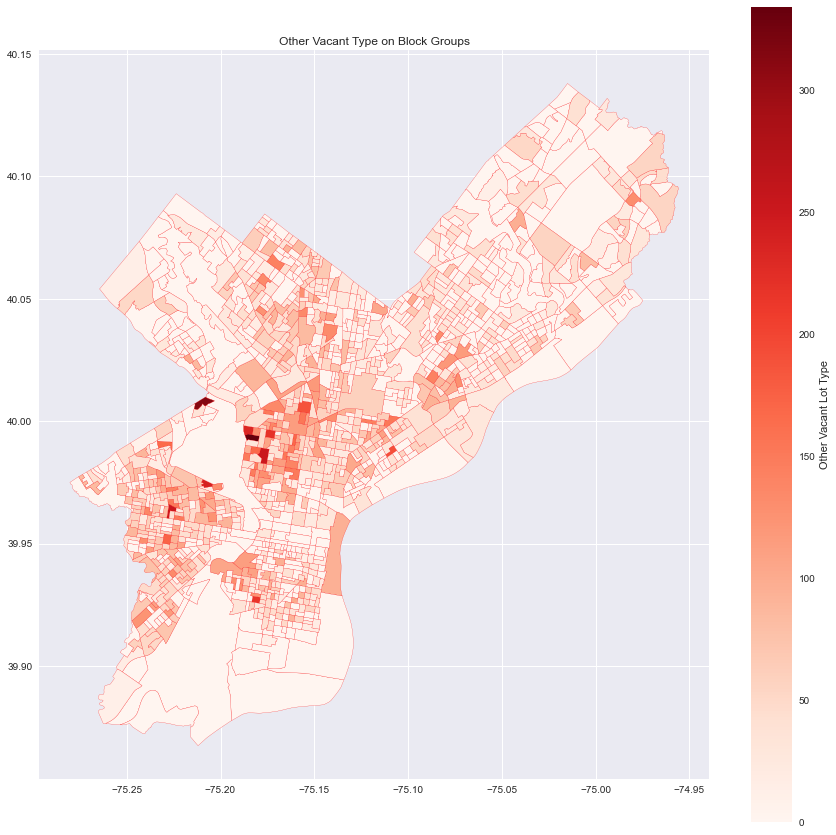

In [882]:
fig, ax = plt.subplots(figsize=(15,15))
plt.style.use('seaborn')
plt.title("Other Vacant Type on Block Groups")
#census_blockgroups.to_crs("EPSG:4269").plot(ax=ax, color='white', edgecolor='black')
vacant_type.plot(ax=ax, column='other',
            edgecolor='red', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Other Vacant Lot Type'})


### Other Important ACS datasets
Datasets in this section are uploaded but not explored a lot at the moment. We are still deciding whether to use them.

##### ACS: Race

In [846]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B03002'))#race
#censusdata.censustable('acs5', 2019, 'B03002')


Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B03002_001E  | HISPANIC OR LATINO ORIGIN BY R | !! Estimate Total:                                       | int  
B03002_002E  | HISPANIC OR LATINO ORIGIN BY R | !! !! Estimate Total: Not Hispanic or Latino:            | int  
B03002_003E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total: Not Hispanic or Latino: White a | int  
B03002_004E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total: Not Hispanic or Latino: Black o | int  
B03002_005E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total: Not Hispanic or Latino: America | int  
B03002_006E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total: Not Hispanic or Latino: Asian a | int  
B03002_007E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total: Not Hispanic or Lati

In [849]:
acs_race = censusdata.download('acs5', 2019,
           censusdata.censusgeo([('state', '42'),
                                 ('county', '101'), # philadelphia county
                                 ('block group', '*')]),
                                 ['B03002_001E', 'B03002_003E', 'B03002_004E', 'B03002_006E', 'B03002_012E'])

acs_race.rename(columns = {'B03002_001E': 'race_total', 
                            'B03002_003E': 'race_white', 
                            'B03002_004E': 'race_black', 
                            'B03002_006E': 'race_asian', 
                            'B03002_012E': 'race_hispanic'}, inplace = True)

acs_race.to_csv('data/acs/race.csv')
acs_race.head()

race_total  race_white  \
Block Group 1, Census Tract 9807, Philadelphia ...           0           0   
Block Group 3, Census Tract 27.01, Philadelphia...        1955         904   
Block Group 2, Census Tract 337.01, Philadelphi...         976         654   
Block Group 3, Census Tract 337.01, Philadelphi...        3859        1594   
Block Group 2, Census Tract 205, Philadelphia C...        1017          36   

                                                    race_black  race_asian  \
Block Group 1, Census Tract 9807, Philadelphia ...           0           0   
Block Group 3, Census Tract 27.01, Philadelphia...         262         502   
Block Group 2, Census Tract 337.01, Philadelphi...           0          99   
Block Group 3, Census Tract 337.01, Philadelphi...         477         305   
Block Group 2, Census Tract 205, Philadelphia C...         796         124   

                                                    race_hispanic  
Block Group 1, Census Tract 9807, Philadelphia ...              0  
Block Group 3, Census Tract 27.01, Philadelphia...            251  
Block Group 2, Census Tract 337.01, Philadelphi...             79  
Block Group 3, Census Tract 337.01, Philadelphi...           1301  
Block Group 2, Census Tract 205, Philadelphia C...             61

##### ACS: Education

In [850]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B15002'))#education

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15002_001E  | SEX BY EDUCATIONAL ATTAINMENT  | !! Estimate Total                                        | int  
B15002_002E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! Estimate Total Male                                | int  
B15002_003E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male No schooling completed      | int  
B15002_004E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male Nursery to 4th grade        | int  
B15002_005E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male 5th and 6th grade           | int  
B15002_006E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male 7th and 8th grade           | int  
B15002_007E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male 9th grade       

##### ACS: Household Income

In [883]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B19001'))#household income

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19001_001E  | HOUSEHOLD INCOME IN THE PAST 1 | !! Estimate Total                                        | int  
B19001_002E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total Less than $10,000                   | int  
B19001_003E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $10,000 to $14,999                  | int  
B19001_004E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $15,000 to $19,999                  | int  
B19001_005E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $20,000 to $24,999                  | int  
B19001_006E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $25,000 to $29,999                  | int  
B19001_007E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $30,000 to $34,999      

##### ACS: Age and Sex

In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B01001'))#age and sex

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01001_001E  | SEX BY AGE                     | !! Estimate Total:                                       | int  
B01001_002E  | SEX BY AGE                     | !! !! Estimate Total: Male:                              | int  
B01001_003E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: Under 5 years             | int  
B01001_004E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 5 to 9 years              | int  
B01001_005E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 10 to 14 years            | int  
B01001_006E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 15 to 17 years            | int  
B01001_007E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 18 and 19 year

In [ ]:
acs_gender = censusdata.download('acs5', 2019,
           censusdata.censusgeo([('state', '42'),
                                 ('county', '101'), # philadelphia county
                                 ('block group', '*')]),
                                 ['B01001_001E', 'B01001_002E', 'B01001_026E'])

acs_gender.rename(columns = {'B01001_001E': 'total',
                             'B01001_002E': 'Male',
                             'B01001_026E': 'Female',}, inplace = True) #include age here, group by under 18, 18-64, 65 and over

acs_gender.to_csv('data/acs/gender.csv')
acs_gender.head()

total  Male  Female
Block Group 1, Census Tract 9807, Philadelphia ...      0     0       0
Block Group 3, Census Tract 27.01, Philadelphia...   1955  1023     932
Block Group 2, Census Tract 337.01, Philadelphi...    976   541     435
Block Group 3, Census Tract 337.01, Philadelphi...   3859  1969    1890
Block Group 2, Census Tract 205, Philadelphia C...   1017   553     464

##### ACS: Poverty Status

In [76]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B17001'))#poverty stattus

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B17001_001E  | POVERTY STATUS IN THE PAST 12  | !! Estimate Total                                        | int  
B17001_002E  | POVERTY STATUS IN THE PAST 12  | !! !! Estimate Total Income in the past 12 months below  | int  
B17001_003E  | POVERTY STATUS IN THE PAST 12  | !! !! !! Estimate Total Income in the past 12 months bel | int  
B17001_004E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_005E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_006E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_007E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past

### City of Philadelphia: Property Tax Delinquency 
https://metadata.phila.gov/#home/datasetdetails/57d9643afab162fe2708224e/representationdetails/57d9643cfab162fe27082252/ 

An account is delinquent when Real Estate Tax is still unpaid on January 1 the following year the tax was due

Date Range 1972 - 2018, Updated Monthly

In [303]:
tax = pd.read_csv('data/city/real_estate_tax_delinquencies.csv')#uploading dataset

In [304]:
tax.head()

objectid   opa_number    street_address  zip_code   zip_4 unit_type  \
0   2556493  493169300.0   6045 N CAMAC ST   19141.0  3227.0       NaN   
1   2556494  493179100.0   5620 N CAMAC ST   19141.0  4106.0       NaN   
2   2556495  493180700.0   5714 N CAMAC ST   19141.0  4108.0       NaN   
3   2556496  493183600.0   5812 N CAMAC ST   19141.0  4123.0       NaN   
4   2556497  223166200.0  420 GLEN ECHO RD   19119.0  2914.0       NaN   

  unit_num                owner             co_owner  principal_due  ...  \
0      NaN  WILLIAMS JACQUELINE  WILLIAMS JACQUELINE       12200.18  ...   
1      NaN         RAY MATTIE E         RAY MATTIE E          -0.05  ...   
2      NaN         TOMLIN PAULA         TOMLIN PAULA         895.87  ...   
3      NaN    BATTS PRINCETON B    BATTS PRINCETON B        4536.94  ...   
4      NaN       WHITE CLARENCE       WHITE CLARENCE        4224.60  ...   

   oldest_bankrupt_year  principal_sum_bankrupt_years  \
0                   NaN                           NaN   
1                   NaN                           NaN   
2                   NaN                           NaN   
3                   NaN                           NaN   
4                   NaN                           NaN   

   total_amount_bankrupt_years  sheriff_sale  liens_sold_1990s  \
0                          NaN             N             False   
1                          NaN             N             False   
2                          NaN             N             False   
3                          NaN             N             False   
4                          NaN             N             False   

   liens_sold_2015  assessment_under_appeal  year_month        lat        lng  
0                N                    False      202111 -75.140099  40.045081  
1                N                    False      202111 -75.141930  40.039007  
2                N                    False      202111 -75.141727  40.039940  
3                N                    False      202111 -75.141395  40.041404  
4                N                    False      202111 -75.195309  40.051563  

[5 rows x 55 columns]

In [305]:
tax.columns #columns in dataset

Index(['objectid', 'opa_number', 'street_address', 'zip_code', 'zip_4',
       'unit_type', 'unit_num', 'owner', 'co_owner', 'principal_due',
       'penalty_due', 'interest_due', 'other_charges_due', 'total_due',
       'is_actionable', 'payment_agreement', 'num_years_owed',
       'most_recent_year_owed', 'oldest_year_owed', 'most_recent_payment_date',
       'year_of_last_assessment', 'total_assessment', 'taxable_assessment',
       'mailing_address', 'mailing_city', 'mailing_state', 'mailing_zip',
       'return_mail', 'building_code', 'detail_building_description',
       'general_building_description', 'building_category',
       'coll_agency_num_years', 'coll_agency_most_recent_year',
       'coll_agency_oldest_year', 'coll_agency_principal_owed',
       'coll_agency_total_owed', 'exempt_abatement_assessment',
       'homestead_value', 'net_tax_value_after_homestead', 'agreement_agency',
       'sequestration_enforcement', 'bankruptcy', 'years_in_bankruptcy',
       'most_recent

In [306]:
tax.dtypes #type of data included

objectid                           int64
opa_number                       float64
street_address                    object
zip_code                         float64
zip_4                            float64
unit_type                         object
unit_num                          object
owner                             object
co_owner                          object
principal_due                    float64
penalty_due                      float64
interest_due                     float64
other_charges_due                float64
total_due                        float64
is_actionable                       bool
payment_agreement                   bool
num_years_owed                     int64
most_recent_year_owed              int64
oldest_year_owed                   int64
most_recent_payment_date          object
year_of_last_assessment          float64
total_assessment                 float64
taxable_assessment               float64
mailing_address                   object
mailing_city    

In [307]:
tax.T# transposing the dataset

0                     1      \
objectid                                    2556493               2556494   
opa_number                              493169300.0           493179100.0   
street_address                      6045 N CAMAC ST       5620 N CAMAC ST   
zip_code                                    19141.0               19141.0   
zip_4                                        3227.0                4106.0   
unit_type                                       NaN                   NaN   
unit_num                                        NaN                   NaN   
owner                           WILLIAMS JACQUELINE          RAY MATTIE E   
co_owner                        WILLIAMS JACQUELINE          RAY MATTIE E   
principal_due                              12200.18                 -0.05   
penalty_due                                 1110.17                   0.0   
interest_due                               14261.97                 41.05   
other_charges_due                           3098.66                   0.0   
total_due                                  30670.98                  41.0   
is_actionable                                 False                 False   
payment_agreement                              True                  True   
num_years_owed                                   23                     1   
most_recent_year_owed                          2021                  2021   
oldest_year_owed                               1994                  2021   
most_recent_payment_date        2021-09-16 00:00:00   2021-09-17 00:00:00   
year_of_last_assessment                      2021.0                2021.0   
total_assessment                           111400.0              111200.0   
taxable_assessment                         111400.0              111200.0   
mailing_address                                 NaN                   NaN   
mailing_city                                    NaN                   NaN   
mailing_state                                   NaN                   NaN   
mailing_zip                                     NaN                   NaN   
return_mail                                    True                   NaN   
building_code                                   R30                   R30   
detail_building_description    ROW B/GAR 2STY MASON  ROW B/GAR 2STY MASON   
general_building_description                  house                 house   
building_category                       residential           residential   
coll_agency_num_years                             0                     0   
coll_agency_most_recent_year                    NaN                   NaN   
coll_agency_oldest_year                         NaN                   NaN   
coll_agency_principal_owed                      0.0                   0.0   
coll_agency_total_owed                          0.0                   0.0   
exempt_abatement_assessment                     0.0                   0.0   
homestead_value                              629.91                629.91   
net_tax_value_after_homestead                929.47                926.67   
agreement_agency                               TIPS                  TIPS   
sequestration_enforcement                     False                 False   
bankruptcy                                    False                 False   
years_in_bankruptcy                             NaN                   NaN   
most_recent_bankrupt_year                       NaN                   NaN   
oldest_bankrupt_year                            NaN                   NaN   
principal_sum_bankrupt_years                    NaN                   NaN   
total_amount_bankrupt_years                     NaN                   NaN   
sheriff_sale                                      N                     N   
liens_sold_1990s                              False                 False   
liens_sold_2015                                   N                     N   
assessment_under_appeal                   

In [313]:
tax.isna().sum()#null values included in the dataset

objectid                             0
opa_number                           3
street_address                      10
zip_code                            59
zip_4                             3102
unit_type                        71339
unit_num                         71339
owner                                2
co_owner                            98
principal_due                        0
penalty_due                          0
interest_due                         0
other_charges_due                    0
total_due                            0
is_actionable                        0
payment_agreement                    0
num_years_owed                       0
most_recent_year_owed                0
oldest_year_owed                     0
most_recent_payment_date          4920
year_of_last_assessment           1482
total_assessment                  1482
taxable_assessment                1482
mailing_address                  46023
mailing_city                     46022
mailing_state            

In [315]:
tax.shape #size of dataset

(72718, 55)

In [316]:
tax.isna().sum()/tax.shape[0] # remove mailing_address, mailing_city, unit_type, unit_num, mailing_state, mailing_zip, 
# remove return_mail, coll_agency_most_recent_year, coll_agency_oldest_year, agreement_agency, years_in_bankruptcy , 
# remove most_recent_bankrupt_year, oldest_bankrupt_year, principal_sum_bankrupt_years, total_amount_bankrupt_years

objectid                         0.000000
opa_number                       0.000041
street_address                   0.000138
zip_code                         0.000811
zip_4                            0.042658
unit_type                        0.981036
unit_num                         0.981036
owner                            0.000028
co_owner                         0.001348
principal_due                    0.000000
penalty_due                      0.000000
interest_due                     0.000000
other_charges_due                0.000000
total_due                        0.000000
is_actionable                    0.000000
payment_agreement                0.000000
num_years_owed                   0.000000
most_recent_year_owed            0.000000
oldest_year_owed                 0.000000
most_recent_payment_date         0.067659
year_of_last_assessment          0.020380
total_assessment                 0.020380
taxable_assessment               0.020380
mailing_address                  0

In [317]:
tax.drop(['mailing_address', 'mailing_city', 'unit_type', 'unit_num', 'mailing_state', 'mailing_zip', 
        'return_mail', 'coll_agency_most_recent_year', 'coll_agency_oldest_year', 'agreement_agency', 'years_in_bankruptcy' , 
        'most_recent_bankrupt_year', 'oldest_bankrupt_year', 'principal_sum_bankrupt_years', 'total_amount_bankrupt_years'], 
        axis=1, inplace=True) # removing columns thta have high null values


In [318]:
tax.columns

Index(['objectid', 'opa_number', 'street_address', 'zip_code', 'zip_4',
       'owner', 'co_owner', 'principal_due', 'penalty_due', 'interest_due',
       'other_charges_due', 'total_due', 'is_actionable', 'payment_agreement',
       'num_years_owed', 'most_recent_year_owed', 'oldest_year_owed',
       'most_recent_payment_date', 'year_of_last_assessment',
       'total_assessment', 'taxable_assessment', 'building_code',
       'detail_building_description', 'general_building_description',
       'building_category', 'coll_agency_num_years',
       'coll_agency_principal_owed', 'coll_agency_total_owed',
       'exempt_abatement_assessment', 'homestead_value',
       'net_tax_value_after_homestead', 'sequestration_enforcement',
       'bankruptcy', 'sheriff_sale', 'liens_sold_1990s', 'liens_sold_2015',
       'assessment_under_appeal', 'year_month', 'lat', 'lng'],
      dtype='object')

In [321]:
(tax.isna().sum()/tax.shape[0]).sort_values(ascending=False)

most_recent_payment_date         0.067659
zip_4                            0.042658
building_category                0.020449
general_building_description     0.020449
detail_building_description      0.020449
building_code                    0.020408
taxable_assessment               0.020380
net_tax_value_after_homestead    0.020380
homestead_value                  0.020380
exempt_abatement_assessment      0.020380
total_assessment                 0.020380
year_of_last_assessment          0.020380
lat                              0.002654
lng                              0.002654
co_owner                         0.001348
zip_code                         0.000811
street_address                   0.000138
opa_number                       0.000041
owner                            0.000028
num_years_owed                   0.000000
year_month                       0.000000
assessment_under_appeal          0.000000
liens_sold_2015                  0.000000
liens_sold_1990s                 0

In [329]:
#minimum and maximum latitude
print(tax['lat'].min())
print(tax['lat'].max())

-75.27396176893846
-74.9593407520959


In [330]:
#minimum and maximum longitude
print(tax['lng'].min())
print(tax['lng'].max())

39.88640598393346
40.13621377256551


In [343]:
#dropping null values within  longitude and latitude
tax.dropna(subset=['lat'], inplace=True)
tax.dropna(subset=['lng'], inplace=True)

In [337]:
#combining latitude and longitude data into one column called geometry for gropandas to read
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(tax["lat"], tax["lng"])]
tax = gpd.GeoDataFrame(tax,
                        crs = crs,
                        geometry = geometry)

tax.head()

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


objectid   opa_number    street_address  zip_code   zip_4  \
0   2556493  493169300.0   6045 N CAMAC ST   19141.0  3227.0   
1   2556494  493179100.0   5620 N CAMAC ST   19141.0  4106.0   
2   2556495  493180700.0   5714 N CAMAC ST   19141.0  4108.0   
3   2556496  493183600.0   5812 N CAMAC ST   19141.0  4123.0   
4   2556497  223166200.0  420 GLEN ECHO RD   19119.0  2914.0   

                 owner             co_owner  principal_due  penalty_due  \
0  WILLIAMS JACQUELINE  WILLIAMS JACQUELINE       12200.18      1110.17   
1         RAY MATTIE E         RAY MATTIE E          -0.05         0.00   
2         TOMLIN PAULA         TOMLIN PAULA         895.87         0.00   
3    BATTS PRINCETON B    BATTS PRINCETON B        4536.94       283.14   
4       WHITE CLARENCE       WHITE CLARENCE        4224.60         0.00   

   interest_due  ...  sequestration_enforcement  bankruptcy  sheriff_sale  \
0      14261.97  ...                      False       False             N   
1         41.05  ...                      False       False             N   
2        120.94  ...                      False       False             N   
3       1161.05  ...                      False       False             N   
4        570.32  ...                      False       False             N   

   liens_sold_1990s  liens_sold_2015  assessment_under_appeal  year_month  \
0             False                N                    False      202111   
1             False                N                    False      202111   
2             False                N                    False      202111   
3             False                N                    False      202111   
4             False                N                    False      202111   

         lat        lng                    geometry  
0 -75.140099  40.045081  POINT (-75.14010 40.04508)  
1 -75.141930  40.039007  POINT (-75.14193 40.03901)  
2 -75.141727  40.039940  POINT (-75.14173 40.03994)  
3 -75.141395  40.041404  POINT (-75.14140 40.04140)  
4 -75.195309  40.051563  POINT (-75.19531 40.05156)  

[5 rows x 41 columns]

/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_74088/1335946433.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  tax.hist(ax=ax)


array([[<AxesSubplot:title={'center':'objectid'}>,
        <AxesSubplot:title={'center':'opa_number'}>,
        <AxesSubplot:title={'center':'zip_4'}>,
        <AxesSubplot:title={'center':'principal_due'}>,
        <AxesSubplot:title={'center':'penalty_due'}>],
       [<AxesSubplot:title={'center':'interest_due'}>,
        <AxesSubplot:title={'center':'other_charges_due'}>,
        <AxesSubplot:title={'center':'total_due'}>,
        <AxesSubplot:title={'center':'num_years_owed'}>,
        <AxesSubplot:title={'center':'most_recent_year_owed'}>],
       [<AxesSubplot:title={'center':'oldest_year_owed'}>,
        <AxesSubplot:title={'center':'year_of_last_assessment'}>,
        <AxesSubplot:title={'center':'total_assessment'}>,
        <AxesSubplot:title={'center':'taxable_assessment'}>,
        <AxesSubplot:title={'center':'coll_agency_num_years'}>],
       [<AxesSubplot:title={'center':'coll_agency_principal_owed'}>,
        <AxesSubplot:title={'center':'coll_agency_total_owed'}>,
    

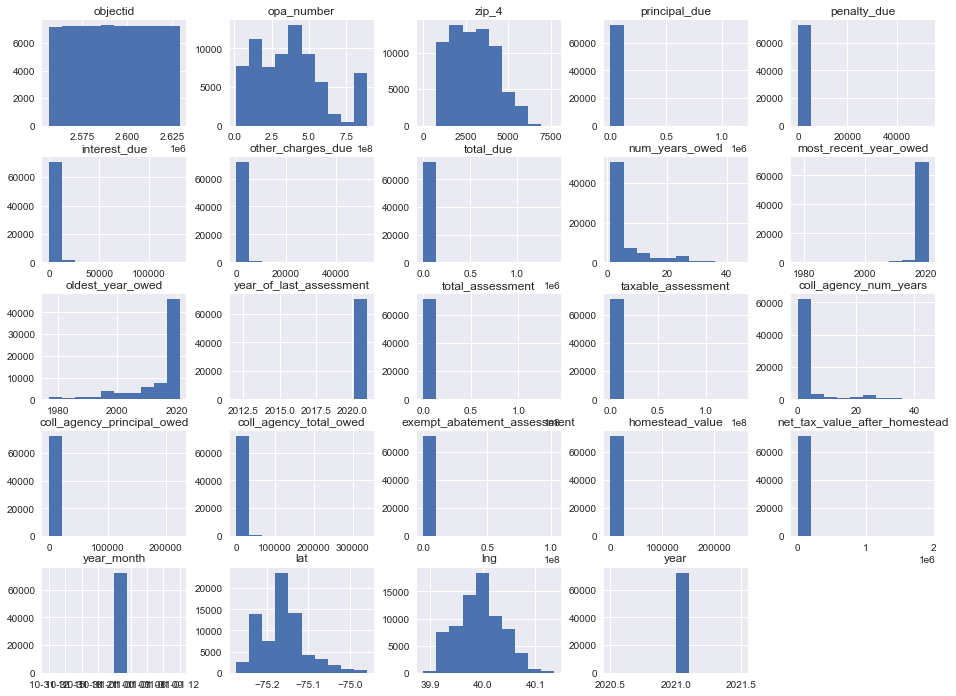

In [ ]:
#histogram of the dataset
#important column that we will be considering is the principal due column. The data is skwed
fig, ax = plt.subplots(figsize=(16,12))
tax.hist(ax=ax)

In [ ]:
tax.describe().T # median for principal value is around #2000

count          mean           std  \
objectid                       72525.0  2.592829e+06  2.098687e+04   
opa_number                     72525.0  3.735889e+08  2.357474e+08   
zip_code                       72479.0  1.911504e+04  6.070185e+02   
zip_4                          69616.0  2.969683e+03  1.271406e+03   
principal_due                  72525.0  3.170896e+03  1.031891e+04   
penalty_due                    72525.0  2.143030e+02  5.637250e+02   
interest_due                   72525.0  1.752588e+03  4.424587e+03   
other_charges_due              72525.0  7.366745e+02  1.324276e+03   
total_due                      72525.0  5.875430e+03  1.486095e+04   
num_years_owed                 72525.0  6.231134e+00  8.224082e+00   
most_recent_year_owed          72525.0  2.020192e+03  3.371291e+00   
oldest_year_owed               72525.0  2.014309e+03  9.664412e+00   
year_of_last_assessment        71212.0  2.020957e+03  4.939431e-01   
total_assessment               71212.0  1.456987e+05  1.343773e+06   
taxable_assessment             71212.0  1.258007e+05  1.014012e+06   
coll_agency_num_years          72525.0  3.205088e+00  7.344373e+00   
coll_agency_principal_owed     72525.0  1.108963e+03  3.934209e+03   
coll_agency_total_owed         72525.0  2.211462e+03  6.939029e+03   
exempt_abatement_assessment    71212.0  1.989802e+04  8.101003e+05   
homestead_value                71212.0  2.220513e+02  9.916045e+02   
net_tax_value_after_homestead  71212.0  1.539039e+03  1.376266e+04   
year_month                     72525.0  2.021110e+05  0.000000e+00   
lat                            72525.0 -7.516213e+01  5.420265e-02   
lng                            72525.0  3.999380e+01  4.274897e-02   

                                        min           25%           50%  \
objectid                       2.556371e+06  2.574662e+06  2.592829e+06   
opa_number                     1.100080e+07  1.810721e+08  3.640166e+08   
zip_code                       1.000000e+00  1.912800e+04  1.913500e+04   
zip_4                          3.000000e+00  1.907000e+03  2.908000e+03   
principal_due                 -1.741060e+03  2.456400e+02  1.197030e+03   
penalty_due                   -1.089500e+02  0.000000e+00  5.749000e+01   
interest_due                  -4.703100e+02  7.841000e+01  2.664700e+02   
other_charges_due             -4.526000e+01  0.000000e+00  2.747300e+02   
total_due                      1.000000e-02  4.627300e+02  2.021930e+03   
num_years_owed                 1.000000e+00  1.000000e+00  3.000000e+00   
most_recent_year_owed          1.978000e+03  2.021000e+03  2.021000e+03   
oldest_year_owed               1.977000e+03  2.012000e+03  2.019000e+03   
year_of_last_assessment        2.012000e+03  2.021000e+03  2.021000e+03   
total_assessment               0.000000e+00  3.430000e+04  7.300000e+04   
taxable_assessment             0.000000e+00  3.310000e+04  7.120000e+04   
coll_agency_num_years          0.000000e+00  0.000000e+00  1.000000e+00   
coll_agency_principal_owed    -1.741060e+03  0.000000e+00  0.000000e+00   
coll_agency_total_owed         0.000000e+00  0.000000e+00  5.719000e+01   
exempt_abatement_assessment    0.000000e+00  0.000000e+00  0.000000e+00   
homestead_value                0.000000e+00  0.000000e+00  0.000000e+00   
net_tax_value_after_homestead  0.000000e+00  2.785600e+02  7.516900e+02   
year_month                     2.021110e+05  2.021110e+05  2.021110e+05   
lat                           -7.527396e+01 -7.519973e+01 -7.516256e+01   
lng                            3.988641e+01  3.996484e+01  3.999254e+01   

                                        75%           max  
objectid                       2.611000e+06  2.629184e+06  
opa_number                     5.021726e+08  8.888007e+08  
zip_code                       1.914300e+04  1.919200e+04  
zip_4                          3.920000e+03  7.711000e+03  
principal_due                  3.363210e+03  1.174312e+06  
penalty_due                    2.477300e+02  5

In [382]:
tax.isna().sum()

objectid                            0
opa_number                          0
street_address                      0
zip_code                           46
zip_4                            2909
owner                               1
co_owner                           35
principal_due                       0
penalty_due                         0
interest_due                        0
other_charges_due                   0
total_due                           0
is_actionable                       0
payment_agreement                   0
num_years_owed                      0
most_recent_year_owed               0
oldest_year_owed                    0
most_recent_payment_date         4793
year_of_last_assessment          1313
total_assessment                 1313
taxable_assessment               1313
building_code                    1314
detail_building_description      1316
general_building_description     1316
building_category                1316
coll_agency_num_years               0
coll_agency_

<AxesSubplot:title={'center':'Property Tax Delinquency of Principal Value More than $2000 on Neighbourhood'}>

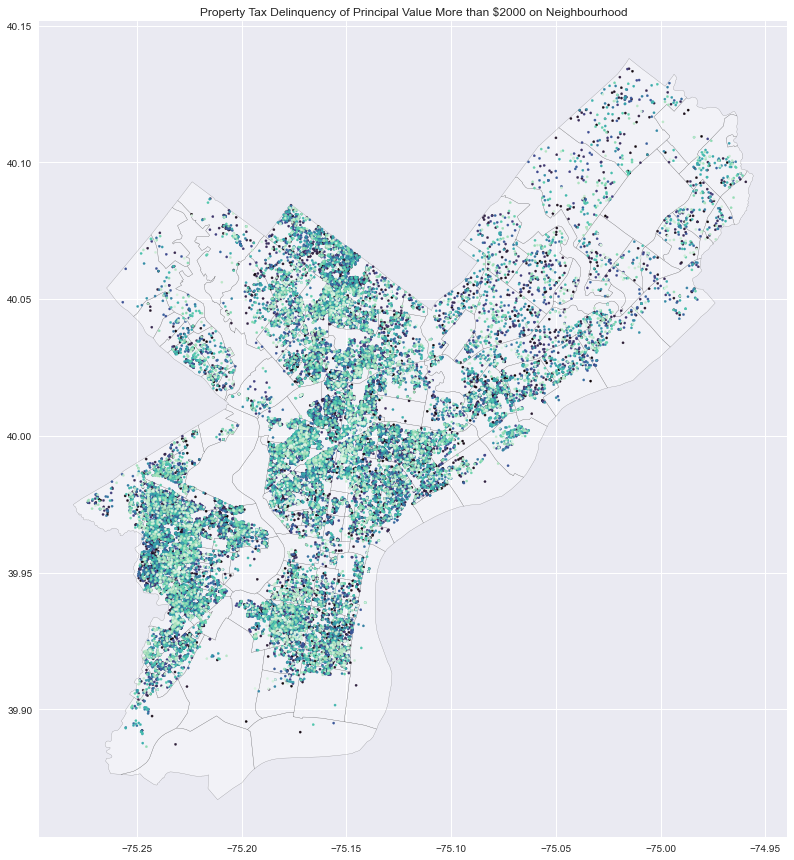

In [885]:
fig, ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
plt.title("Property Tax Delinquency of Principal Value More than $2000 on Neighbourhood")
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black') #using shape map of neighbourhood
tax[tax['principal_due'] > 2000].plot(ax = ax, cmap = 'mako',legend=True, markersize = 5)#principal that is more than 2000
#plt.legend(prop = {'size' : 15})
#plt.show()

In [409]:
tax.dropna(subset=['zip_code'], inplace=True)# dropping null values zip code
tax['zip_code'] = tax['zip_code'].astype(int).astype(str) #turning number to integer then to object

In [412]:
tax.dtypes

objectid                            int64
opa_number                        float64
street_address                     object
zip_code                           object
zip_4                             float64
owner                              object
co_owner                           object
principal_due                     float64
penalty_due                       float64
interest_due                      float64
other_charges_due                 float64
total_due                         float64
is_actionable                        bool
payment_agreement                    bool
num_years_owed                      int64
most_recent_year_owed               int64
oldest_year_owed                    int64
most_recent_payment_date           object
year_of_last_assessment           float64
total_assessment                  float64
taxable_assessment                float64
building_code                      object
detail_building_description        object
general_building_description      

In [447]:
tax_zip_sum = tax.groupby('zip_code')[['principal_due','total_due', 'is_actionable']].sum().reset_index()#grouping by zip code and sum of values
tax_zip_count = tax.groupby('zip_code')[['opa_number']].count().reset_index()#group by zip codes  and number of delinquent properties

In [421]:
poly_zip_tax_count = pd.merge(poly_zip, tax_zip_count, left_on = "CODE", right_on = "zip_code", how = 'left')#combining the tax file with zip code with zip code shape file
poly_zip_tax_count.head()

OBJECTID   CODE  COD    Shape__Are    Shape__Len  \
0         1  19120   20  9.177970e+07  49921.544063   
1         2  19121   21  6.959879e+07  39534.887217   
2         3  19122   22  3.591632e+07  24124.645221   
3         4  19123   23  3.585175e+07  26421.728982   
4         5  19124   24  1.448080e+08  63658.770420   

                                            geometry zip_code  opa_number  
0  POLYGON ((-75.11107 40.04682, -75.10943 40.045...    19120      2039.0  
1  POLYGON ((-75.19227 39.99463, -75.19205 39.994...    19121      2948.0  
2  POLYGON ((-75.15406 39.98601, -75.15328 39.985...    19122      1329.0  
3  POLYGON ((-75.15190 39.97056, -75.15150 39.970...    19123       523.0  
4  POLYGON ((-75.09660 40.04249, -75.09281 40.039...    19124      2393.0

<AxesSubplot:title={'center':'Number of Property Tax Delinquent Properties by Zip Code'}>

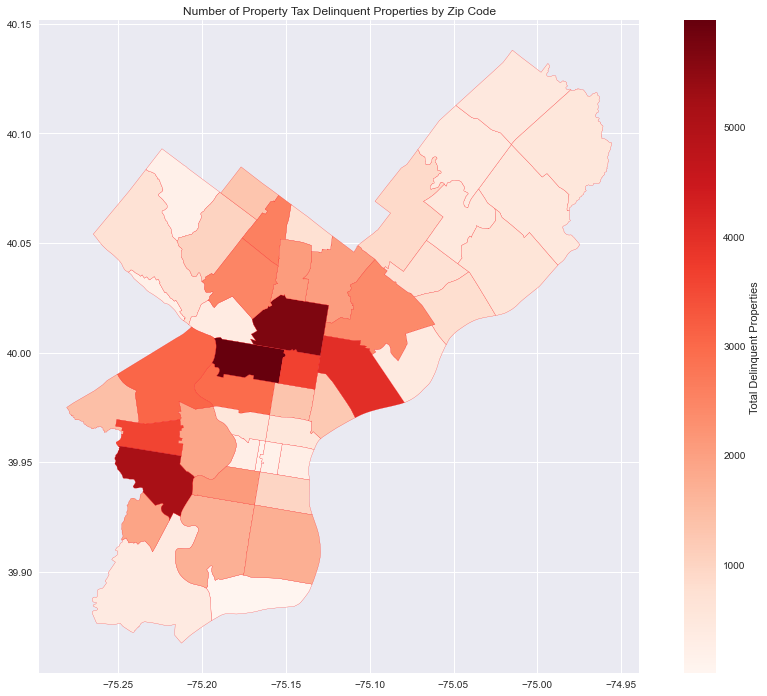

In [886]:
fig, ax = plt.subplots(figsize=(16,12))
plt.title("Number of Property Tax Delinquent Properties by Zip Code")
poly_zip_tax_count.plot(ax=ax, column='opa_number',
            edgecolor='red', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Total Delinquent Properties'})

#sum of delinquent properties and the number of delinquent properties seems to be around in the same zip codes

In [448]:
poly_tax_zip_sum = pd.merge(poly_zip, tax_zip_sum, left_on = "CODE", right_on = "zip_code", how = 'left')#merging zip code shape file with  sum of values dataset
poly_tax_zip_sum.head()

OBJECTID   CODE  COD    Shape__Are    Shape__Len  \
0         1  19120   20  9.177970e+07  49921.544063   
1         2  19121   21  6.959879e+07  39534.887217   
2         3  19122   22  3.591632e+07  24124.645221   
3         4  19123   23  3.585175e+07  26421.728982   
4         5  19124   24  1.448080e+08  63658.770420   

                                            geometry zip_code  principal_due  \
0  POLYGON ((-75.11107 40.04682, -75.10943 40.045...    19120     5017812.12   
1  POLYGON ((-75.19227 39.99463, -75.19205 39.994...    19121     7093001.39   
2  POLYGON ((-75.15406 39.98601, -75.15328 39.985...    19122     3344355.11   
3  POLYGON ((-75.15190 39.97056, -75.15150 39.970...    19123     3743411.62   
4  POLYGON ((-75.09660 40.04249, -75.09281 40.039...    19124     6791774.93   

     total_due  is_actionable  
0   9529801.48          880.0  
1  12953515.62         1827.0  
2   5839664.03          733.0  
3   5372027.03          298.0  
4  12672901.32         1142.0

<AxesSubplot:title={'center':'Sum of Principal Due for Property Tax Delinquency by Zip Code'}>

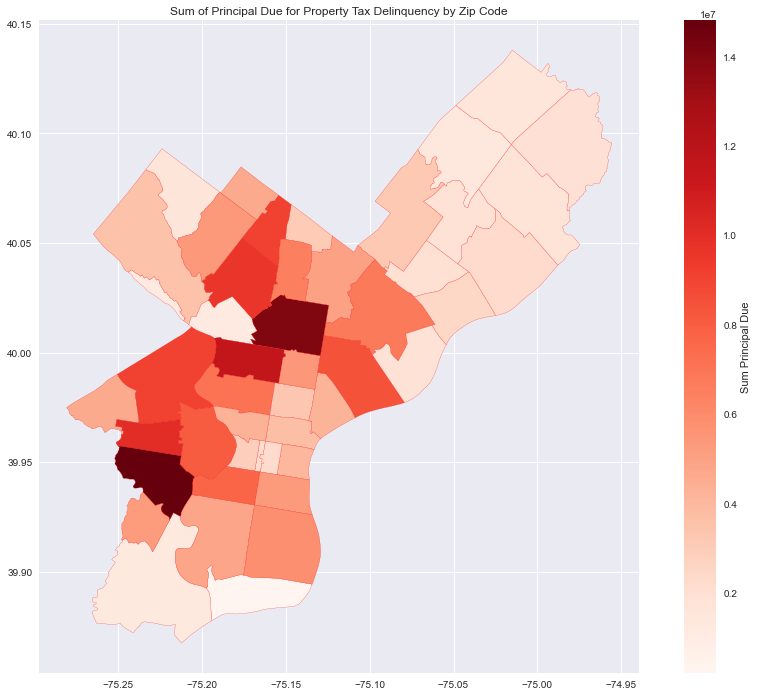

In [887]:
fig, ax = plt.subplots(figsize=(16,12))
plt.title("Sum of Principal Due for Property Tax Delinquency by Zip Code")
poly_tax_zip_sum.plot(ax=ax, column='principal_due',
            edgecolor='red', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Sum Principal Due'})

<AxesSubplot:title={'center':'Sum of Principal Due that is Actionable by Zip Code'}>

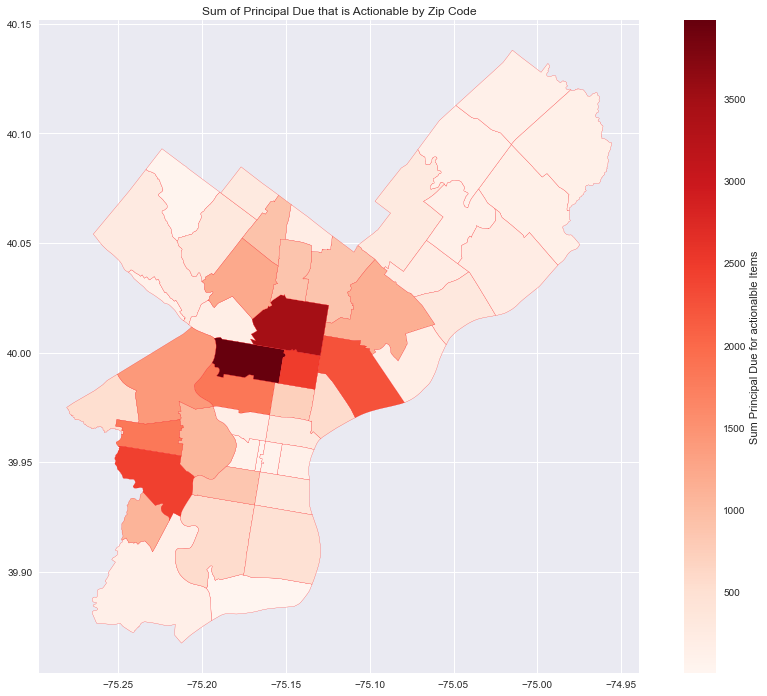

In [888]:
fig, ax = plt.subplots(figsize=(16,12))
plt.title("Sum of Principal Due that is Actionable by Zip Code")
poly_tax_zip_sum.plot(ax=ax, column='is_actionable',
            edgecolor='red', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Sum Principal Due for actionalble Items'})

In [441]:
tax['principal_due'].sum()#sum of principal due

229224414.01999998

In [444]:
tax['is_actionable'].unique()#this is boolean value

array([False,  True])

In [446]:
tax.loc[tax['is_actionable']== True]['principal_due'].sum()#sum of principal due that is actionable
#Actionable means that the city is actively working to collect these accounts, non-actional means that the city can't do anything further or thery are barrred from collection

121126557.50999999

In [457]:
tax.groupby(tax['is_actionable'])['principal_due'].sum().reset_index() # is actionable and not actionable is not that different
#Accounts that are in payment agreement, bankruptcy, or overdue but not yet delinquent are considered "not actionable".

is_actionable  principal_due
0          False   1.080979e+08
1           True   1.211266e+08

In [459]:
tax.groupby(tax['is_actionable'])['principal_due'].sum()/tax['principal_due'].sum()#percentage of actional and non-actionable principal due  is almost the same 
#more percentage of principal due for actionaable

is_actionable
False    0.471581
True     0.528419
Name: principal_due, dtype: float64

In [475]:
tax.groupby(tax['num_years_owed'])['principal_due'].sum().reset_index().sort_values(by = ['principal_due'], ascending= False)
#Most of the principal due is owned for 1-4 years, then there is 25 years which has the highest principal due

num_years_owed  principal_due
1                2    26959928.69
0                1    25667386.23
2                3    22582465.41
3                4    16764381.46
24              25    13166360.38
4                5    12543099.89
5                6    11032846.29
6                7     8113435.71
7                8     7243378.20
11              12     6592288.78
8                9     6354391.31
9               10     6061230.49
10              11     5512859.40
13              14     5014584.95
12              13     4920943.23
14              15     4249660.21
20              21     3845421.86
15              16     3773332.27
23              24     3620005.06
17              18     3510552.36
16              17     3374508.34
18              19     3123978.55
22              23     3083700.57
21              22     3063217.30
19              20     2910133.65
27              28     1472989.17
25              26     1450242.28
26              27     1429127.75
28              29     1229403.04
32              33     1114820.15
31              32     1077972.33
43              44     1044263.97
30              31      973101.27
29              30      868240.63
33              34      826829.43
35              36      778074.76
34              35      765812.31
36              37      718980.99
37              38      574930.25
38              39      516875.32
42              43      381043.12
39              40      368221.62
41              42      292565.37
40              41      253507.86
44              45        3321.81

In [479]:
tax.groupby(tax['num_years_owed'])['principal_due'].median().reset_index().sort_values(by = ['principal_due'], ascending= False)
#when you do median principal dues, it is 18, 23, 22 and 27 years.
#principal value is skewed so meadian is a better measure

num_years_owed  principal_due
17              18       5783.580
22              23       5735.850
21              22       5725.700
26              27       5666.460
18              19       5291.020
27              28       5131.220
25              26       4909.580
19              20       4787.910
15              16       4720.230
16              17       4666.210
39              40       4592.710
23              24       4543.620
13              14       4525.560
41              42       4448.170
30              31       4270.680
42              43       4204.530
14              15       4095.185
40              41       4017.970
29              30       3820.270
24              25       3718.880
38              39       3698.420
11              12       3592.830
12              13       3572.330
43              44       3497.240
36              37       3478.085
32              33       3436.920
37              38       3414.990
9               10       3324.215
44              45       3321.810
35              36       3275.390
8                9       3238.390
10              11       3225.175
34              35       3158.905
7                8       3075.225
6                7       2879.590
33              34       2860.270
31              32       2805.345
5                6       2594.335
28              29       2411.840
4                5       2274.055
3                4       2006.705
2                3       1704.090
20              21       1406.630
1                2       1082.570
0                1        208.580

In [484]:
tax.groupby(tax['num_years_owed'])['opa_number'].count().reset_index().sort_values(by = ['opa_number'], ascending= False)
#most of the delinquent properties are between owened for 1-6 year , then there is 25 years owned of delinquent properties

num_years_owed  opa_number
0                1       26311
1                2        9556
2                3        6669
3                4        4562
4                5        3310
5                6        2626
24              25        2277
6                7        1827
7                8        1592
8                9        1246
9               10        1164
10              11        1080
11              12        1017
12              13         863
20              21         800
13              14         759
14              15         666
15              16         528
16              17         487
23              24         455
17              18         445
18              19         421
19              20         402
21              22         400
22              23         378
28              29         222
43              44         219
31              32         194
25              26         191
27              28         190
29              30         166
30              31         165
32              33         164
26              27         159
35              36         150
33              34         147
34              35         142
36              37         116
37              38         106
38              39          95
42              43          57
39              40          56
40              41          52
41              42          46
44              45           1

In [485]:
tax.groupby(tax['building_category'])['opa_number'].count()# most of the dentinquent properties are  residential

building_category
commercial      6021
residential    65186
Name: opa_number, dtype: int64

In [488]:
tax.groupby(tax['building_category'])['opa_number'].count()/tax['opa_number'].count()#89% is residential properties

building_category
commercial     0.083072
residential    0.899378
Name: opa_number, dtype: float64

In [889]:
#converting year_month column to year only
tax['year_month'] = pd.to_datetime(tax['year_month'], format="%Y%m")
tax['year'] = pd.DatetimeIndex(tax['year_month']).year

In [494]:
tax[['is_actionable', 'bankruptcy', 'sheriff_sale', 'sequestration_enforcement', 'payment_agreement', 'principal_due']]#selecting only columns that are important

is_actionable  bankruptcy sheriff_sale  sequestration_enforcement  \
0              False       False            N                      False   
1              False       False            N                      False   
2              False       False            N                      False   
3              False       False            N                      False   
4              False       False            N                      False   
...              ...         ...          ...                        ...   
72713          False       False            N                      False   
72714          False       False            N                      False   
72715          False       False            N                      False   
72716           True       False            N                      False   
72717           True       False            N                      False   

       payment_agreement  principal_due  
0                   True       12200.18  
1                   True          -0.05  
2                  False         895.87  
3                   True        4536.94  
4                  False        4224.60  
...                  ...            ...  
72713               True          71.34  
72714              False        1542.58  
72715               True        2504.38  
72716              False        4079.25  
72717              False        2301.27  

[72479 rows x 6 columns]

In [519]:
#bankrupcy is non-actionable
print(tax.groupby(tax['bankruptcy'])['principal_due'].sum())
print(tax['bankruptcy'].value_counts())

bankruptcy
False    2.292244e+08
Name: principal_due, dtype: float64
False    72479
Name: bankruptcy, dtype: int64


In [ ]:
#payment agreement non-actionable. Payment agreement is one of the way the city collect debts
print(tax.groupby(tax['payment_agreement'])['principal_due'].sum())
print(tax['payment_agreement'].value_counts())

payment_agreement
False    1.482439e+08
True     8.098053e+07
Name: principal_due, dtype: float64
False    48678
True     23801
Name: payment_agreement, dtype: int64


In [520]:
#sheriff sale is actionable. A sheriff's sale is a public auction where mortgage lenders, banks, tax collectors, and other litigants can collect money lost on property
print(tax.groupby(tax['sheriff_sale'])['principal_due'].sum())
print(tax['sheriff_sale'].value_counts())

sheriff_sale
N    2.138628e+08
Y    1.536159e+07
Name: principal_due, dtype: float64
N    70314
Y     2165
Name: sheriff_sale, dtype: int64


In [521]:
# sequestration is actionable
#The taking of someones property, voluntarily (by deposit) or involuntarily (by seizure), 
# by court officers or into the possession of a third party, awaiting the outcome of a trial in which ownership of that property is at issue
#If the delinquent property is a rental property, the City can take over the rent collection and apply those rental payments to the delinquent Real Estate Tax bill.
print(tax.groupby(tax['sequestration_enforcement'])['principal_due'].sum())
print(tax['sequestration_enforcement'].value_counts())


sequestration_enforcement
False    2.287520e+08
True     4.724364e+05
Name: principal_due, dtype: float64
False    72381
True        98
Name: sequestration_enforcement, dtype: int64


In [524]:
#The assessment appeal process allows property owners the opportunity to dispute the value determined by the Department.
print(tax.groupby(tax['assessment_under_appeal'])['principal_due'].sum())
print(tax['assessment_under_appeal'].value_counts())
#most of the assessment are not under appeal

assessment_under_appeal
False    2.230154e+08
True     6.208983e+06
Name: principal_due, dtype: float64
False    71971
True       508
Name: assessment_under_appeal, dtype: int64


In [533]:
tax['general_building_description'].unique()#different type of descriptions included

array(['house', 'theater_stadium_other amuse', 'vacantLand', 'mixedUsage',
       'apartmentSmall', 'retail', 'industrial', nan, 'apartmentLarge',
       'miscCommercial', 'nonProfit', 'parking_garage', 'condo', 'garage',
       'hotel', 'Restaurant_Bar', 'officeBuilding', 'miscResidential',
       'parkingLot', 'bank', 'utility'], dtype=object)

In [537]:
tax.groupby(tax['general_building_description'])['principal_due'].sum().sort_values(ascending=False)
#principal due is also the most for house and vacant land

general_building_description
house                          1.331961e+08
vacantLand                     3.026161e+07
apartmentSmall                 1.320392e+07
mixedUsage                     1.133693e+07
apartmentLarge                 9.104813e+06
nonProfit                      5.194570e+06
industrial                     4.105313e+06
retail                         3.802362e+06
condo                          3.304997e+06
miscCommercial                 2.440253e+06
officeBuilding                 1.892045e+06
parkingLot                     1.778640e+06
theater_stadium_other amuse    1.595614e+06
Restaurant_Bar                 7.796232e+05
parking_garage                 6.016357e+05
garage                         5.697422e+05
hotel                          4.450313e+05
miscResidential                2.573390e+05
utility                        5.262612e+04
bank                           9.603020e+03
Name: principal_due, dtype: float64

In [536]:
print(tax['general_building_description'].value_counts()) # most of them are houses and vacant lots

house                          49796
vacantLand                     11623
apartmentSmall                  3528
mixedUsage                      2374
condo                            910
industrial                       560
retail                           415
nonProfit                        365
apartmentLarge                   331
miscCommercial                   324
garage                           275
parkingLot                       235
miscResidential                  191
theater_stadium_other amuse       90
officeBuilding                    76
Restaurant_Bar                    71
hotel                             22
parking_garage                    16
bank                               3
utility                            2
Name: general_building_description, dtype: int64


In [541]:
tax.groupby(tax['general_building_description'])['principal_due'].median().sort_values(ascending=False)
#howver, the median and mean principal due is not high for house and vacant lots

general_building_description
utility                        26313.060
officeBuilding                  8626.265
apartmentLarge                  8141.580
hotel                           7714.150
Restaurant_Bar                  6149.910
theater_stadium_other amuse     5572.080
nonProfit                       4324.050
parking_garage                  4072.705
retail                          3360.110
miscCommercial                  3225.140
bank                            2920.940
industrial                      2705.660
mixedUsage                      2397.415
apartmentSmall                  2069.885
condo                           1121.630
vacantLand                      1101.110
house                           1086.830
parkingLot                       979.070
garage                           911.270
miscResidential                  494.970
Name: principal_due, dtype: float64

### City of Philadelphia: Property Code Violations

https://www.opendataphilly.org/dataset/licenses-and-inspections-violations

Column description: https://metadata.phila.gov/#home/datasetdetails/5543ca7a5c4ae4cd66d3ff86/representationdetails/5e99bab227c80700158695b0/

This dataset was quite big so we had to download three different datasets for different years and combine them togather

In [633]:
#upload all datasets
violation1 = pd.read_csv('data/city/violations_2019.csv')
violation2 = pd.read_csv('data/city/violations2016-2018.csv')
violation3 = pd.read_csv('data/city/violations2013-2015.csv')


violation = [violation1, violation2, violation3]
violation = pd.concat(violation)#combining all datasets

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,3,6,10,15,16,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,3,6,15,16,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3,6,15,16,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [635]:
violation.head()

objectid  addressobjectid parcel_id_num casenumber      casecreateddate  \
0     22000      156857764.0           NaN     678967  2019-04-05 14:04:19   
1       199       15897333.0        475137     568999  2017-01-09 13:23:18   
2     20439      131980134.0           NaN     678131  2019-03-29 12:09:52   
3       385       15514326.0        326877     569328  2017-01-13 08:41:18   
4       386       15514326.0        326877     569328  2017-01-13 08:41:18   

     casecompleteddate             casetype    casestatus  \
0                  NaN  NOTICE OF VIOLATION  IN VIOLATION   
1                  NaN  NOTICE OF VIOLATION  IN VIOLATION   
2  2020-09-21 12:32:03  NOTICE OF VIOLATION        CLOSED   
3                  NaN  NOTICE OF VIOLATION  IN VIOLATION   
4                  NaN  NOTICE OF VIOLATION  IN VIOLATION   

              caseresponsibility caseprioritydesc  ...         zip  \
0  CODE ENFORCEMENT INVESTIGATOR        HAZARDOUS  ...         NaN   
1               CSU INVESTIGATOR           UNSAFE  ...  19104-1123   
2          BUILDING INVESTIGATOR         STANDARD  ...         NaN   
3          BUILDING INVESTIGATOR         STANDARD  ...  19138-3051   
4          BUILDING INVESTIGATOR         STANDARD  ...  19138-3051   

  censustract        opa_owner systemofrecord     geocode_x      geocode_y  \
0         NaN              NaN        ECLIPSE           NaN            NaN   
1       110.0  COLEMAN GREGORY        ECLIPSE  2.683078e+06  243246.473027   
2         NaN              NaN        ECLIPSE           NaN            NaN   
3       267.0   JAQUEZ RAMON M        ECLIPSE  2.695877e+06  272847.558740   
4       267.0   JAQUEZ RAMON M        ECLIPSE  2.695877e+06  272847.558740   

  council_district  posse_jobid        lat        lng  
0              NaN  195203950.0        NaN        NaN  
1              3.0  195194705.0  39.972746 -75.200065  
2              NaN  195203407.0        NaN        NaN  
3              9.0  195194755.0  40.052946 -75.151310  
4              9.0  195194755.0  40.052946 -75.151310  

[5 rows x 32 columns]

In [636]:
violation.head().T

0  \
objectid                                         22000   
addressobjectid                            156857764.0   
parcel_id_num                                      NaN   
casenumber                                      678967   
casecreateddate                    2019-04-05 14:04:19   
casecompleteddate                                  NaN   
casetype                           NOTICE OF VIOLATION   
casestatus                                IN VIOLATION   
caseresponsibility       CODE ENFORCEMENT INVESTIGATOR   
caseprioritydesc                             HAZARDOUS   
violationnumber                              211959680   
violationdate                      2019-04-05 00:00:00   
violationcode                                 PM15-301   
violationcodetitle           VACANT STRUCTURE AND LAND   
violationstatus                                   OPEN   
violationresolutiondate                            NaN   
violationresolutioncode                            NaN   
mostrecentinvestigation            2020-06-24 12:01:43   
opa_account_num                                    NaN   
address                                            NaN   
unit_type                                          NaN   
unit_num                                           NaN   
zip                                                NaN   
censustract                                        NaN   
opa_owner                                          NaN   
systemofrecord                                 ECLIPSE   
geocode_x                                          NaN   
geocode_y                                          NaN   
council_district                                   NaN   
posse_jobid                                195203950.0   
lat                                                NaN   
lng                                                NaN   

                                                     1  \
objectid                                           199   
addressobjectid                             15897333.0   
parcel_id_num                                   475137   
casenumber                                      568999   
casecreateddate                    2017-01-09 13:23:18   
casecompleteddate                                  NaN   
casetype                           NOTICE OF VIOLATION   
casestatus                                IN VIOLATION   
caseresponsibility                    CSU INVESTIGATOR   
caseprioritydesc                                UNSAFE   
violationnumber                              211935476   
violationdate                      2019-01-23 00:00:00   
violationcode                              PM15-304.1G   
violationcodetitle       EXTERIOR STRUCT UNSAFE COND 7   
violationstatus                                   OPEN   
violationresolutiondate                            NaN   
violationresolutioncode                            NaN   
mostrecentinvestigation            2021-09-28 12:01:31   
opa_account_num                            243186900.0   
address                             3831 WYALUSING AVE   
unit_type                                          NaN   
unit_num                                           NaN   
zip                                         19104-1123   
censustract                                      110.0   
opa_owner                              COLEMAN GREGORY   
systemofrecord                                 ECLIPSE   
geocode_x                               2683077.781269   
geocode_y                                243246.473027   
council_district                                   3.0   
posse_jobid                                195194705.0   
lat                                          39.972746   
lng                                         -75.200065   

                                                      2  \
objectid                                          20439   
addressobjectid                             131980134.0   
parcel_id_num                                 

In [637]:
violation.shape# side of dataset

(903633, 32)

In [638]:
violation.columns# different columns included

Index(['objectid', 'addressobjectid', 'parcel_id_num', 'casenumber',
       'casecreateddate', 'casecompleteddate', 'casetype', 'casestatus',
       'caseresponsibility', 'caseprioritydesc', 'violationnumber',
       'violationdate', 'violationcode', 'violationcodetitle',
       'violationstatus', 'violationresolutiondate', 'violationresolutioncode',
       'mostrecentinvestigation', 'opa_account_num', 'address', 'unit_type',
       'unit_num', 'zip', 'censustract', 'opa_owner', 'systemofrecord',
       'geocode_x', 'geocode_y', 'council_district', 'posse_jobid', 'lat',
       'lng'],
      dtype='object')

In [639]:
violation.dtypes #type of dataset

objectid                     int64
addressobjectid            float64
parcel_id_num               object
casenumber                  object
casecreateddate             object
casecompleteddate           object
casetype                    object
casestatus                  object
caseresponsibility          object
caseprioritydesc            object
violationnumber             object
violationdate               object
violationcode               object
violationcodetitle          object
violationstatus             object
violationresolutiondate     object
violationresolutioncode     object
mostrecentinvestigation     object
opa_account_num            float64
address                     object
unit_type                   object
unit_num                    object
zip                         object
censustract                float64
opa_owner                   object
systemofrecord              object
geocode_x                  float64
geocode_y                  float64
council_district    

/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_74088/1763168730.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  violation.hist(ax=ax)


array([[<AxesSubplot:title={'center':'objectid'}>,
        <AxesSubplot:title={'center':'addressobjectid'}>,
        <AxesSubplot:title={'center':'opa_account_num'}>],
       [<AxesSubplot:title={'center':'censustract'}>,
        <AxesSubplot:title={'center':'geocode_x'}>,
        <AxesSubplot:title={'center':'geocode_y'}>],
       [<AxesSubplot:title={'center':'council_district'}>,
        <AxesSubplot:title={'center':'posse_jobid'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'lng'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

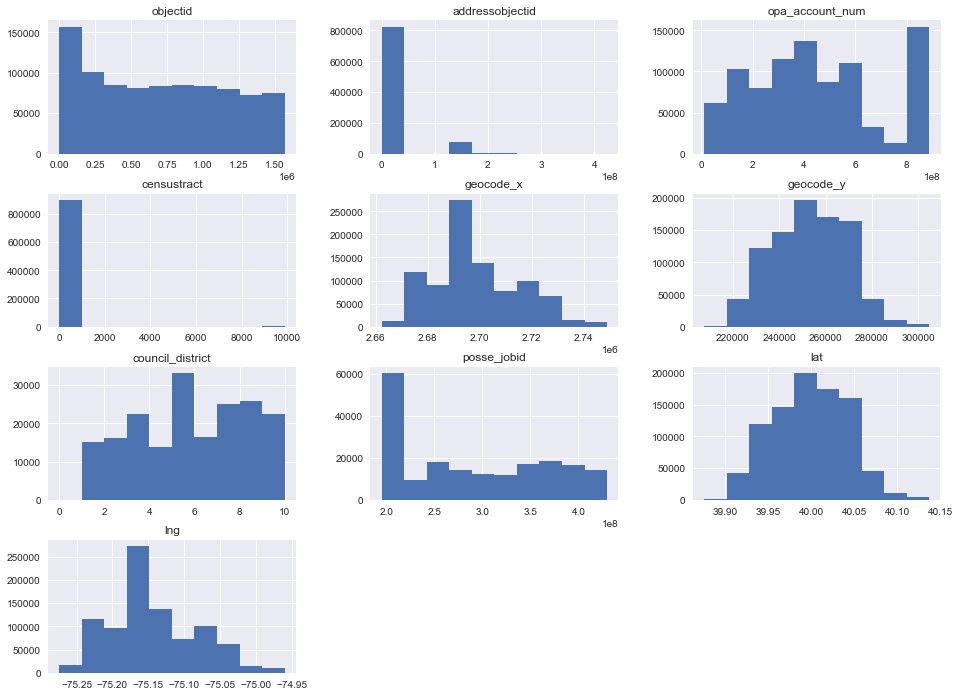

In [640]:
#plotting histogram
fig, ax = plt.subplots(figsize=(16,12))
violation.hist(ax=ax)

In [641]:
violation.describe(include = 'all').T# describing dataset

count  unique  \
objectid                 903633.0     NaN   
addressobjectid          902429.0     NaN   
parcel_id_num              191017   65323   
casenumber                 903633  400338   
casecreateddate            888022  387418   
casecompleteddate          718252  319955   
casetype                   192360       5   
casestatus                 903633       7   
caseresponsibility         887458      39   
caseprioritydesc           887986      10   
violationnumber            903633  903633   
violationdate              903633    4556   
violationcode              903377    2260   
violationcodetitle         903159    2286   
violationstatus            895070      13   
violationresolutiondate    108619    1376   
violationresolutioncode    108620      14   
mostrecentinvestigation    879738  335052   
opa_account_num          894028.0     NaN   
address                    902082  163352   
unit_type                    5827      13   
unit_num                    11379     613   
zip                        902075   37162   
censustract              901417.0     NaN   
opa_owner                  896510  132306   
systemofrecord             903633       2   
geocode_x                901396.0     NaN   
geocode_y                901396.0     NaN   
council_district         190477.0     NaN   
posse_jobid              192575.0     NaN   
lat                      901396.0     NaN   
lng                      901396.0     NaN   

                                                                       top  \
objectid                                                               NaN   
addressobjectid                                                        NaN   
parcel_id_num                                         DATA CONVERSION ONLY   
casenumber                                                          569328   
casecreateddate                                        2018-07-02 07:43:19   
casecompleteddate                                      2016-07-20 08:37:14   
casetype                                               NOTICE OF VIOLATION   
casestatus                                                          CLOSED   
caseresponsibility                                                    CLIP   
caseprioritydesc                                                  STANDARD   
violationnumber                                                  211959680   
violationdate                                          2018-06-21 00:00:00   
violationcode                                                        CP-01   
violationcodetitle                                   CLIP VIOLATION NOTICE   
violationstatus                                                   COMPLIED   
violationresolutiondate                                2021-06-02 00:00:00   
violationresolutioncode                            COMPLIED - OWNER REPAIR   
mostrecentinvestigation                                2018-07-23 00:00:00   
opa_account_num                                                        NaN   
address                  DATA CONVERSION ONLY 1DATA CONVERSION ONLY MAR...   
unit_type                                                                #   
unit_num                                                                 1   
zip                                                             19121-0000   
censustract                                                            NaN   
opa_owner                                        PHILADELPHIA HOUSING AUTH   
systemofrecord                                                      HANSEN   
geocode_x                                                              NaN   
geocode_y                                                              NaN   
council_district                                                       NaN   
posse_jobid                                                            NaN   
lat                                                                    NaN   
lng                                           

In [642]:
violation.isna().sum()# null values

objectid                        0
addressobjectid              1204
parcel_id_num              712616
casenumber                      0
casecreateddate             15611
casecompleteddate          185381
casetype                   711273
casestatus                      0
caseresponsibility          16175
caseprioritydesc            15647
violationnumber                 0
violationdate                   0
violationcode                 256
violationcodetitle            474
violationstatus              8563
violationresolutiondate    795014
violationresolutioncode    795013
mostrecentinvestigation     23895
opa_account_num              9605
address                      1551
unit_type                  897806
unit_num                   892254
zip                          1558
censustract                  2216
opa_owner                    7123
systemofrecord                  0
geocode_x                    2237
geocode_y                    2237
council_district           713156
posse_jobid   

In [643]:
(violation.isna().sum()/violation.shape[0]).sort_values(ascending=False)#unit type, unit num, has a lot of null values

unit_type                  0.993552
unit_num                   0.987407
violationresolutiondate    0.879797
violationresolutioncode    0.879796
council_district           0.789210
parcel_id_num              0.788612
casetype                   0.787126
posse_jobid                0.786888
casecompleteddate          0.205151
mostrecentinvestigation    0.026443
caseresponsibility         0.017900
caseprioritydesc           0.017316
casecreateddate            0.017276
opa_account_num            0.010629
violationstatus            0.009476
opa_owner                  0.007883
geocode_x                  0.002476
geocode_y                  0.002476
lat                        0.002476
lng                        0.002476
censustract                0.002452
zip                        0.001724
address                    0.001716
addressobjectid            0.001332
violationcodetitle         0.000525
violationcode              0.000283
systemofrecord             0.000000
violationdate              0

In [670]:
violation.dropna(subset=['lat', 'lng', 'zip'], inplace = True)#dropping nuull values within latitude, longitude and zip code data

In [644]:
#converting  date columns to datetime
violation['casecreateddate'] = pd.to_datetime(violation['casecreateddate'])
violation['casecompleteddate'] = pd.to_datetime(violation['casecompleteddate'])
violation['violationdate'] = pd.to_datetime(violation['violationdate'])
violation['violationresolutiondate'] = pd.to_datetime(violation['violationresolutiondate'])

In [650]:
violation['casecreateddate_year'] = pd.to_datetime(violation['casecreateddate'].dt.strftime('%Y-%m'))

<AxesSubplot:>

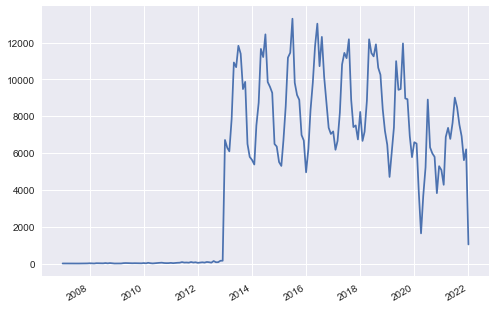

In [672]:
violation['casecreateddate_year'].value_counts().plot()#theere seems to some seasonality in case violations

In [701]:
violation['caseprioritydesc'].value_counts()# most of the cases are standard

STANDARD                          743549
CONSTRUCTION SERVICES              49410
UNSAFE                             45166
HAZARDOUS                          30076
IMMINENTLY DANGEROUS               17454
ACCELERATED REVIEW                    31
UNLAWFUL                              24
AIU LICENSING VIOLATION NOTICE        17
UNFIT                                  7
5 DAY REVIEW GROUP                     3
Name: caseprioritydesc, dtype: int64

In [704]:
violation['opa_owner'].value_counts().head(20)# opa_owner is Office of Property Assessment's ownership  from the current deed for the property. 
#Most of these were from tPhiladelphia housing Auth and second highest was philadelphia land bank

PHILADELPHIA HOUSING AUTH                   13011
PHILADELPHIA LAND BANK                       6810
SCHOOL DISTRICT OF PHILA                     4412
REDEVELOPMENT AUTHORITY  OF PHILADELPHIA     3922
CITY OF PHILADELPHIA                         2296
REDEVELOPMENT AUTHORITY  OF PHILA            1506
CITY OF PHILA                                1457
GEENA LLC                                    1260
REDEVELOPMENT AUTHORITY O                    1056
REDEVELOPMENT AUTHORITY, OF PHILADELPHIA      859
EMARCO DREW                                   715
STABLE GENIUS LLC                             685
GULLE JEAN PAUL                               633
PHILADELPHIA REDEVELOPMEN                     630
CITY OF PHILA, DEPT OF PUBLIC PROP            565
BID PROPERTIES LLC                            548
BCM INVESTMENTS LLC                           545
ULATOWSKI WALTER                              544
CORESTATES GROUP LLC                          540
TTP HOLDINGS LLC                              513


In [706]:
violation['opa_owner'].nunique()# number of unique opa_owner

132279

In [661]:
(violation.groupby('violationcodetitle')['objectid'].count()).sort_values(ascending=False).reset_index().head(20)
#included description of the violations.  A lot of them are related to vacant lots

violationcodetitle  objectid
0            CLIP VIOLATION NOTICE    133117
1   EXT A-VACANT LOT CLEAN/MAINTAI     57499
2                   HIGH WEEDS-CUT     50055
3              EXTERIOR AREA WEEDS     35311
4   RUBBISH/GARBAGE EXTERIOR-OWNER     30000
5         VACANT STRUCTURE LICENSE     23305
6         EXTERIOR AREA SANITATION     15877
7                 UNSAFE STRUCTURE     13107
8                RUBBISH & GARBAGE     11461
9        LICENSE - RENTAL PROPERTY     11417
10            LICENSE-VAC RES BLDG     10600
11               INTERIOR SURFACES      9034
12       VACANT STRUCTURE AND LAND      9026
13                 VACANT AND OPEN      9020
14         VACANT STRUCTURE & LAND      8349
15            VACANT PROP STANDARD      8284
16   EXTERIOR STRUCT UNSAFE COND 7      8139
17                 PERM Z- NEW USE      7390
18         ONE AND TWO FAMILY (R3)      6870
19     ARCHITECT/ENGINEER SERVICES      6737

In [664]:
violation['violationcodetitle'].nunique()# around 2 thoughsad violation types

2286

In [668]:
violation['violationstatus'].value_counts() # most of the status of violation are complied

COMPLIED          699572
OPEN               83955
CLOSEDCASE         76789
CLOSED             11377
DEMOLISH           10165
ERROR               6709
RESOLVE             4916
CVN ISSUED          1386
STOP WORK            108
WARNING ISSUED        67
SVN ISSUED            22
COMPEXCP               3
CMPLY                  1
Name: violationstatus, dtype: int64

In [652]:
violation.columns # column names in the dataset

Index(['objectid', 'addressobjectid', 'parcel_id_num', 'casenumber',
       'casecreateddate', 'casecompleteddate', 'casetype', 'casestatus',
       'caseresponsibility', 'caseprioritydesc', 'violationnumber',
       'violationdate', 'violationcode', 'violationcodetitle',
       'violationstatus', 'violationresolutiondate', 'violationresolutioncode',
       'mostrecentinvestigation', 'opa_account_num', 'address', 'unit_type',
       'unit_num', 'zip', 'censustract', 'opa_owner', 'systemofrecord',
       'geocode_x', 'geocode_y', 'council_district', 'posse_jobid', 'lat',
       'lng', 'casecreateddate_year'],
      dtype='object')

In [695]:
#combining latitude and longitue columns into geometru column for geo pandas to read and make maps
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(violation["lng"], violation["lat"])]
violation = gpd.GeoDataFrame(violation,
                        crs = crs,
                        geometry = geometry)

violation.head()

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


objectid  addressobjectid parcel_id_num casenumber     casecreateddate  \
1       199       15897333.0        475137     568999 2017-01-09 13:23:18   
3       385       15514326.0        326877     569328 2017-01-13 08:41:18   
4       386       15514326.0        326877     569328 2017-01-13 08:41:18   
5       387       15514326.0        326877     569328 2017-01-13 08:41:18   
6       388       15514326.0        326877     569328 2017-01-13 08:41:18   

  casecompleteddate             casetype    casestatus     caseresponsibility  \
1               NaT  NOTICE OF VIOLATION  IN VIOLATION       CSU INVESTIGATOR   
3               NaT  NOTICE OF VIOLATION  IN VIOLATION  BUILDING INVESTIGATOR   
4               NaT  NOTICE OF VIOLATION  IN VIOLATION  BUILDING INVESTIGATOR   
5               NaT  NOTICE OF VIOLATION  IN VIOLATION  BUILDING INVESTIGATOR   
6               NaT  NOTICE OF VIOLATION  IN VIOLATION  BUILDING INVESTIGATOR   

  caseprioritydesc  ...        opa_owner systemofrecord     geocode_x  \
1           UNSAFE  ...  COLEMAN GREGORY        ECLIPSE  2.683078e+06   
3         STANDARD  ...   JAQUEZ RAMON M        ECLIPSE  2.695877e+06   
4         STANDARD  ...   JAQUEZ RAMON M        ECLIPSE  2.695877e+06   
5         STANDARD  ...   JAQUEZ RAMON M        ECLIPSE  2.695877e+06   
6         STANDARD  ...   JAQUEZ RAMON M        ECLIPSE  2.695877e+06   

       geocode_y council_district  posse_jobid        lat        lng  \
1  243246.473027              3.0  195194705.0  39.972746 -75.200065   
3  272847.558740              9.0  195194755.0  40.052946 -75.151310   
4  272847.558740              9.0  195194755.0  40.052946 -75.151310   
5  272847.558740              9.0  195194755.0  40.052946 -75.151310   
6  272847.558740              9.0  195194755.0  40.052946 -75.151310   

   casecreateddate_year                    geometry  
1            2017-01-01  POINT (-75.20007 39.97275)  
3            2017-01-01  POINT (-75.15131 40.05295)  
4            2017-01-01  POINT (-75.15131 40.05295)  
5            2017-01-01  POINT (-75.15131 40.05295)  
6            2017-01-01  POINT (-75.15131 40.05295)  

[5 rows x 34 columns]

<AxesSubplot:title={'center':'Violation Code Title contains Vacant in it'}>

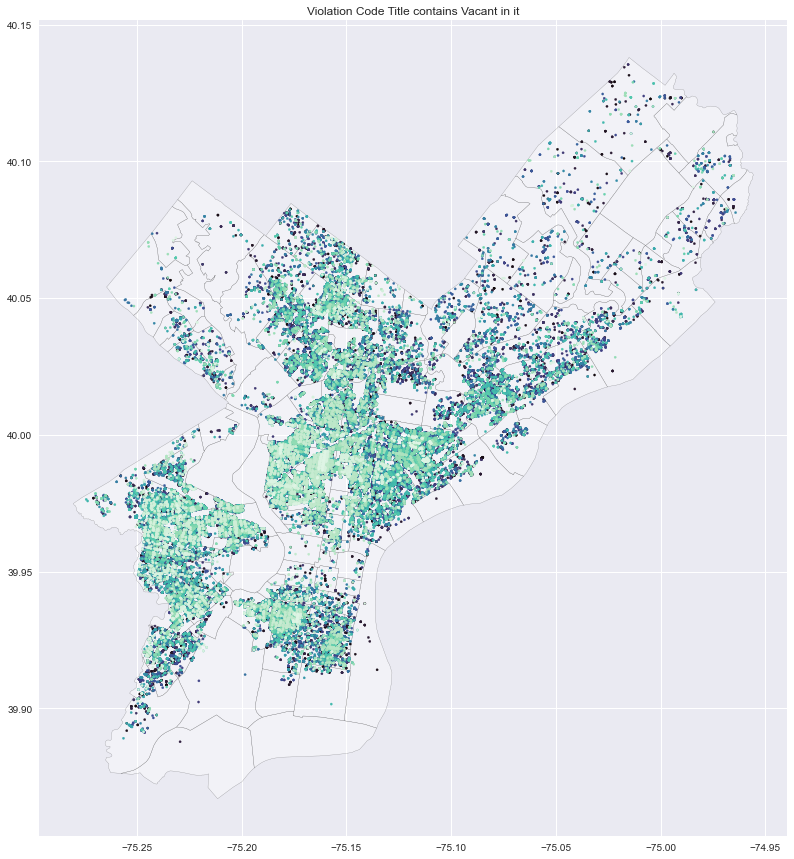

In [890]:
#creating map with vacant in the code violation title
fig, ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
plt.title("Violation Code Title contains Vacant in it")
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')# shape file of neighbourhood
violation[violation['violationcodetitle'].str.contains('VACANT',na=False)].plot(ax = ax, cmap = 'mako',legend=True, markersize = 5, label = "Vacant lot violations")

<AxesSubplot:>

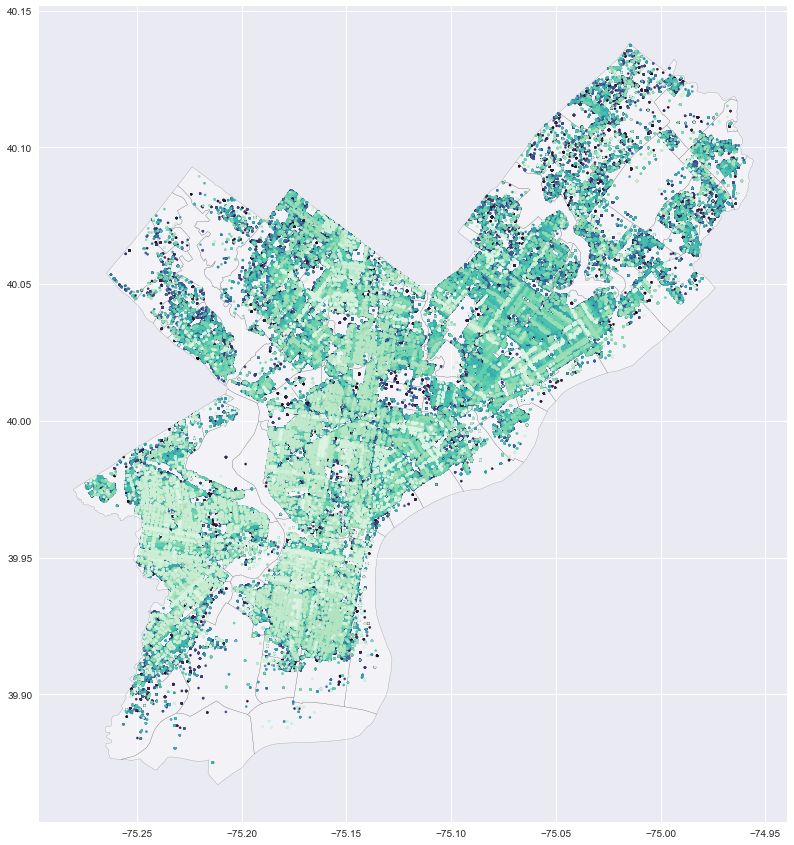

In [698]:
#creating map that does not include vacant in the code violation title
fig, ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
plt.title("Violation Code Title contains that does not contain Vacant in it")
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
violation[~violation['violationcodetitle'].str.contains('VACANT',na=False)].plot(ax = ax, cmap = 'mako',legend=True, markersize = 5, label = "Violation does not cotain Vacant")
#the map shows that the violations are very different from what we see where vacant lots tend to be

### City of Philadelphia: Crime

In [904]:
#Source: https://metadata.phila.gov/#home/datasetdetails/5543868920583086178c4f8e/representationdetails/570e7621c03327dc14f4b68d/
crime = pd.read_csv('data/city/crime.csv')

In [905]:
crime.columns

Index(['the_geom', 'the_geom_webmercator', 'objectid', 'dc_dist', 'psa',
       'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'hour_',
       'dc_key', 'location_block', 'ucr_general', 'text_general_code',
       'point_x', 'point_y', 'lat', 'lng'],
      dtype='object')

In [906]:
crime.head()

the_geom  \
0  0101000020E6100000EA77405D0DC952C016F8ED98F8FA...   
1  0101000020E6100000EA77405D0DC952C016F8ED98F8FA...   
2  0101000020E6100000EA77405D0DC952C016F8ED98F8FA...   
3  0101000020E6100000EA77405D0DC952C016F8ED98F8FA...   
4  0101000020E6100000FB79CF5866C552C0942E81847604...   

                                the_geom_webmercator  objectid  dc_dist psa  \
0  0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...       107        6   1   
1  0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...       108        6   1   
2  0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...       109        6   1   
3  0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...       110        6   1   
4  0101000020110F0000A78BF98174E25FC145F74595D894...       111        2   1   

    dispatch_date_time dispatch_date dispatch_time  hour_        dc_key  \
0  2013-05-28 09:43:00    2013-05-28      09:43:00    9.0  201306025636   
1  2013-11-26 10:24:00    2013-11-26      10:24:00   10.0  201306061456   
2  2013-12-16 13:10:00    2013-12-16      13:10:00   13.0  201306064336   
3  2014-01-27 13:12:00    2014-01-27      13:12:00   13.0  201406003790   
4  2011-09-08 11:27:00    2011-09-08      11:27:00   11.0  201102059237   

                 location_block  ucr_general     text_general_code    point_x  \
0  N 02ND ST / SPRING GARDEN ST          600                Thefts -75.141441   
1  N 02ND ST / SPRING GARDEN ST          300    Robbery No Firearm -75.141441   
2  N 02ND ST / SPRING GARDEN ST          600                Thefts -75.141441   
3  N 02ND ST / SPRING GARDEN ST          600                Thefts -75.141441   
4        5900 BLOCK LORETTO AVE          500  Burglary Residential -75.084372   

     point_y        lat        lng  
0  39.960712  39.960712 -75.141441  
1  39.960712  39.960712 -75.141441  
2  39.960712  39.960712 -75.141441  
3  39.960712  39.960712 -75.141441  
4  40.034867  40.034867 -75.084372

In [907]:
crime.isna().sum()# sum of null values 

the_geom                 282
the_geom_webmercator     282
objectid                   0
dc_dist                    0
psa                      644
dispatch_date_time         0
dispatch_date              0
dispatch_time              0
hour_                     28
dc_key                     0
location_block            55
ucr_general                0
text_general_code          0
point_x                 1423
point_y                 1423
lat                      282
lng                      282
dtype: int64

In [908]:
crime.dtypes#type of data

the_geom                 object
the_geom_webmercator     object
objectid                  int64
dc_dist                   int64
psa                      object
dispatch_date_time       object
dispatch_date            object
dispatch_time            object
hour_                   float64
dc_key                    int64
location_block           object
ucr_general               int64
text_general_code        object
point_x                 float64
point_y                 float64
lat                     float64
lng                     float64
dtype: object

In [909]:
#dropping null values of lat  and lng values
crime.dropna(subset=['lat'], inplace=True)
crime.dropna(subset=['lng'], inplace=True)

In [910]:
crime['dispatch_date'] = pd.to_datetime(crime['dispatch_date'])# converting dispatch date ti time value

In [911]:
crime.shape#size of dataset

(2828248, 17)

In [912]:
crime = crime.loc[crime["dispatch_date"] >= "2013-01-01"].reset_index(drop=True)#filtering for dataset for 2013 and onwards
crime.shape

(1436678, 17)

In [913]:
crime.info()#dataset description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436678 entries, 0 to 1436677
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   the_geom              1436678 non-null  object        
 1   the_geom_webmercator  1436678 non-null  object        
 2   objectid              1436678 non-null  int64         
 3   dc_dist               1436678 non-null  int64         
 4   psa                   1436508 non-null  object        
 5   dispatch_date_time    1436678 non-null  object        
 6   dispatch_date         1436678 non-null  datetime64[ns]
 7   dispatch_time         1436678 non-null  object        
 8   hour_                 1436673 non-null  float64       
 9   dc_key                1436678 non-null  int64         
 10  location_block        1436671 non-null  object        
 11  ucr_general           1436678 non-null  int64         
 12  text_general_code     1436678 non-null  ob

In [914]:
#minimum of pointx and lngitude
print(crime['point_x'].min())
print(crime['lng'].min())

-81.58137853
-81.58137853


In [ ]:
#maximum of point x and longitude
print(crime['point_x'].max())
print(crime['lng'].max())

2725830.9416288
-74.95753244


In [ ]:
print(crime['point_y'].max())
print(crime['lat'].max())

278069.04403542
40.13771285


In [ ]:
print(crime['point_y'].min())
print(crime['lat'].min())
#After analyzing longitude and latude and point_x and point_y, we came to the conclusion that we should not use point_x and point_y as they have more orregular values.
#lat and lng also have values that are beyond the range

-3975202.88585439
28.41954829


<AxesSubplot:>

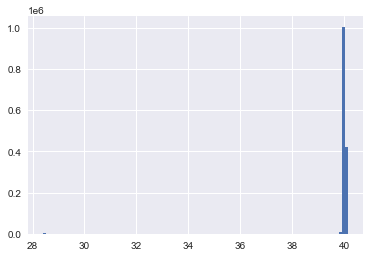

In [915]:
crime['lat'].hist(bins = 100) # histogram shows the irregularies in lat data

In [916]:
print(crime.loc[crime['lat']>30].shape)#size of dataset after with just more than 30 lat
print(crime.loc[crime['lat']<30].shape)#size of dataset after with less than than 30 lat. 
#There are just around 5000 rows that are irregular. Thus if we remove them we dont be losing a lot fo data

(1431665, 17)
(5013, 17)


<AxesSubplot:>

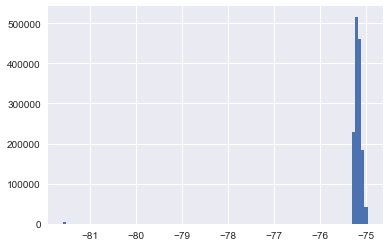

In [917]:
crime['lng'].hist(bins= 100)# historgram shows the irregularities in lng data

In [918]:
print(crime.loc[crime['lng']<-81].shape)#size of dataset after with less than -81 as longitude. This isthe irredular data. 
print(crime.loc[crime['lng']>-81].shape)#size of dataset after with more than -81 as longitude. 

(5013, 17)
(1431665, 17)


In [920]:
crime = crime.loc[crime['lng']>-81].reset_index(drop=True)#dropping all irregular longitude and latitude
crime.shape

(1431665, 17)

<AxesSubplot:>

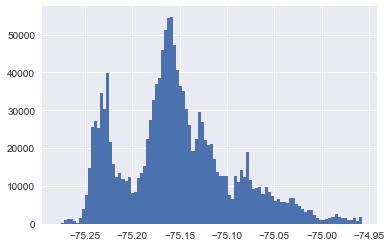

In [921]:
crime['lng'].hist(bins= 100)#histogram shows that values are within the range it is supposed to be

<AxesSubplot:>

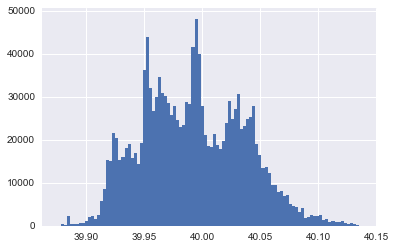

In [922]:
crime['lat'].hist(bins= 100)#histogram shows that values are within the range it is supposed to be

In [923]:
#combining latitude and longitude data into geometrey column so that we can use it on map
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(crime["lng"], crime["lat"])]
geometry[:3]

In [924]:
crime = gpd.GeoDataFrame(crime,
                            crs = crs,
                            geometry = geometry)

crime.head()

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


the_geom  \
0  0101000020E6100000EA77405D0DC952C016F8ED98F8FA...   
1  0101000020E6100000EA77405D0DC952C016F8ED98F8FA...   
2  0101000020E6100000EA77405D0DC952C016F8ED98F8FA...   
3  0101000020E6100000EA77405D0DC952C016F8ED98F8FA...   
4  0101000020E61000002FD31F2F1ECE52C07129BE0C0CF5...   

                                the_geom_webmercator  objectid  dc_dist psa  \
0  0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...       107        6   1   
1  0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...       108        6   1   
2  0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...       109        6   1   
3  0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...       110        6   1   
4  0101000020110F0000401FFA8143F15FC1160AD2D2C283...       117       12   1   

    dispatch_date_time dispatch_date dispatch_time  hour_        dc_key  \
0  2013-05-28 09:43:00    2013-05-28      09:43:00    9.0  201306025636   
1  2013-11-26 10:24:00    2013-11-26      10:24:00   10.0  201306061456   
2  2013-12-16 13:10:00    2013-12-16      13:10:00   13.0  201306064336   
3  2014-01-27 13:12:00    2014-01-27      13:12:00   13.0  201406003790   
4  2018-01-06 10:56:00    2018-01-06      10:56:00   10.0  201812001185   

                 location_block  ucr_general   text_general_code    point_x  \
0  N 02ND ST / SPRING GARDEN ST          600              Thefts -75.141441   
1  N 02ND ST / SPRING GARDEN ST          300  Robbery No Firearm -75.141441   
2  N 02ND ST / SPRING GARDEN ST          600              Thefts -75.141441   
3  N 02ND ST / SPRING GARDEN ST          600              Thefts -75.141441   
4      6600 BLOCK ESSINGTON AVE          600              Thefts -75.220592   

     point_y        lat        lng                    geometry  
0  39.960712  39.960712 -75.141441  POINT (-75.14144 39.96071)  
1  39.960712  39.960712 -75.141441  POINT (-75.14144 39.96071)  
2  39.960712  39.960712 -75.141441  POINT (-75.14144 39.96071)  
3  39.960712  39.960712 -75.141441  POINT (-75.14144 39.96071)  
4  39.914430  39.914430 -75.220592  POINT (-75.22059 39.91443)

In [925]:
crime['text_general_code'].value_counts()

All Other Offenses                         264088
Other Assaults                             210109
Thefts                                     206410
Vandalism/Criminal Mischief                133131
Theft from Vehicle                         118242
Fraud                                       95562
Narcotic / Drug Law Violations              76201
Burglary Residential                        51046
Aggravated Assault No Firearm               48424
Robbery No Firearm                          30353
Motor Vehicle Theft                         27425
DRIVING UNDER THE INFLUENCE                 27275
Aggravated Assault Firearm                  23573
Robbery Firearm                             22727
Weapon Violations                           20170
Burglary Non-Residential                    15327
Disorderly Conduct                          14032
Rape                                         9803
Other Sex Offenses (Not Commercialized)      8506
Prostitution and Commercialized Vice         7229


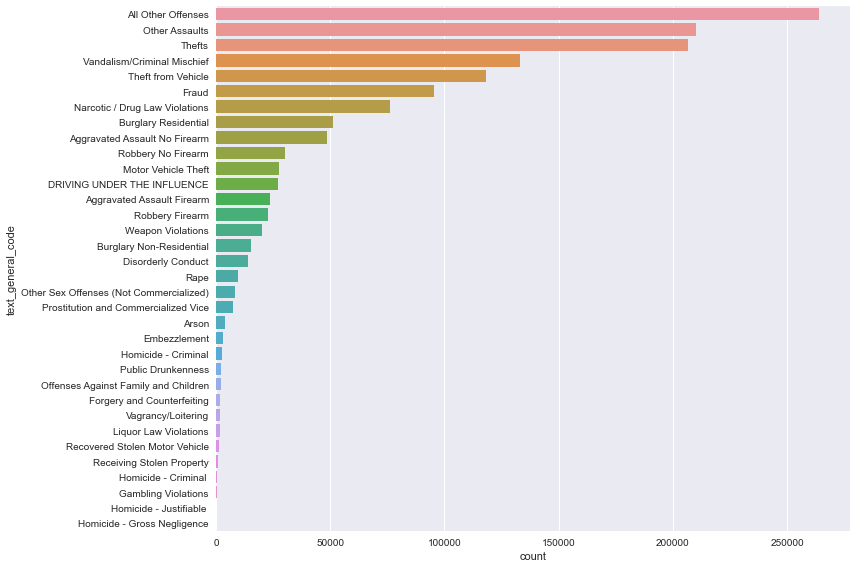

In [926]:
# Countplot of crime tyope
# most fo the crime are all other offenses,assults is the second highest
sns.catplot(y = 'text_general_code',
            kind = 'count',
            height = 8,
            aspect = 1.5,
            order = crime.text_general_code.value_counts().index,
            data = crime)

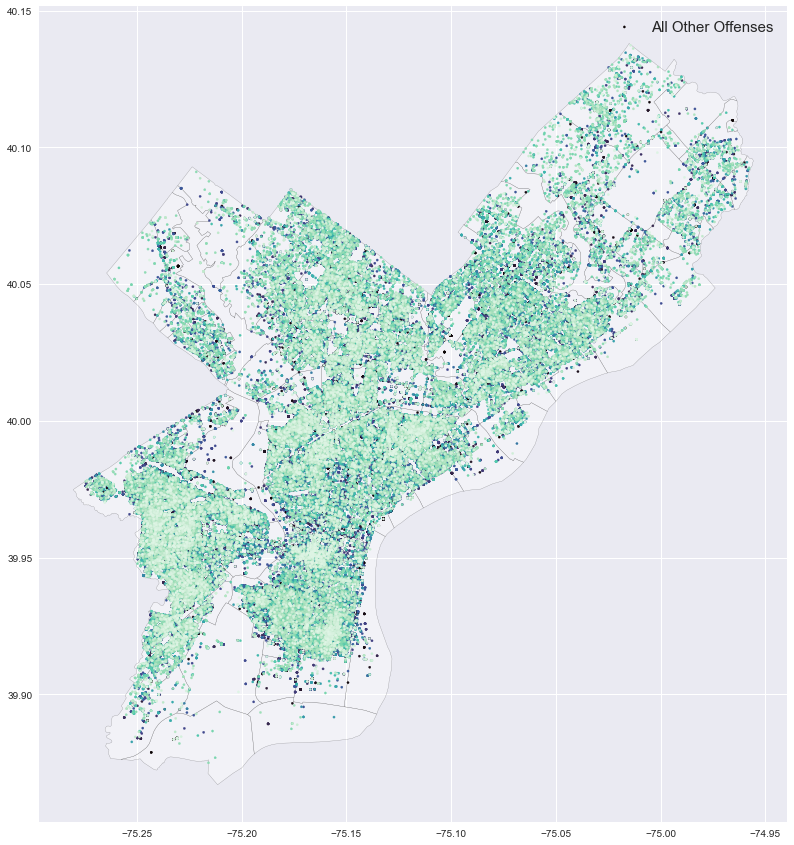

In [927]:
#plotting where all other offenses are occuring
fig, ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
#crime[crime['text_general_code'] == 'All Other Offenses'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "All Other Offenses")
crime[crime['text_general_code'] == 'All Other Offenses'].plot(ax = ax, cmap = 'mako', legend=True, markersize = 5, label = "All Other Offenses")
#crime[crime_df['text_general_code'] == 'Thefts'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Thefts")
plt.legend(prop = {'size' : 15})
plt.show()

Text(-12.949999999999974, 0.5, 'Count')

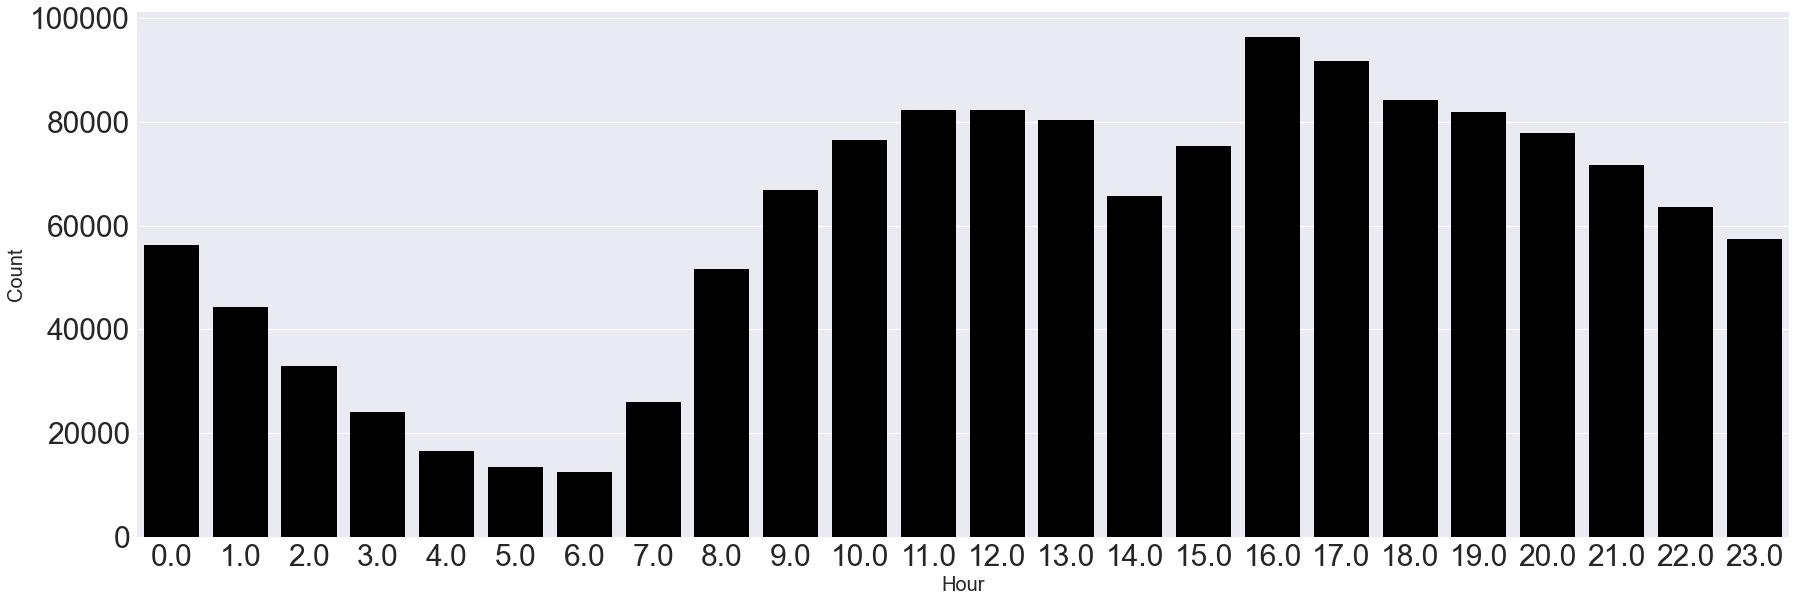

In [928]:
# Crimes by the hour

sns.catplot( x = 'hour_',
            kind = 'count',
            height = 8,
            aspect = 3,
            color = 'black',
            data = crime)

plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Hour', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

### City of Philadelphia: Property Assessment
https://metadata.phila.gov/#home/datasetdetails/5543865f20583086178c4ee5/

In [929]:
assess = pd.read_csv('data/city/opa_properties_public.csv')#uploading dataset

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (1,2,4,11,12,21,25,30,34,42,47,53,54,55,60,67,69,71) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [930]:
assess.head()

objectid      assessment_date basements beginning_point book_and_page  \
0  55242915  1949-01-01 00:00:00       NaN             NaN       0872170   
1  55242916  1949-01-01 00:00:00       NaN             NaN       2620507   
2  55242917  1949-01-01 00:00:00       NaN             NaN       2677268   
3  55242918  1949-01-01 00:00:00       NaN             NaN       2886779   
4  55242919  1949-01-01 00:00:00       NaN             NaN       2886779   

  building_code  building_code_description  category_code  \
0         SR     VACANT LAND RESIDE < ACRE              6   
1         SR     VACANT LAND RESIDE < ACRE              6   
2         SR     VACANT LAND RESIDE < ACRE              6   
3         SR     VACANT LAND RESIDE < ACRE              6   
4         SR     VACANT LAND RESIDE < ACRE              6   

  category_code_description  census_tract  ... unit utility view_type  \
0               Vacant Land         142.0  ...   CA     NaN       NaN   
1               Vacant Land         379.0  ...  NaN     NaN       NaN   
2               Vacant Land         142.0  ...  NaN     NaN       NaN   
3               Vacant Land         367.0  ...  NaN     NaN       NaN   
4               Vacant Land         367.0  ...  NaN     NaN       NaN   

   year_built  year_built_estimate  zip_code  zoning         pin        lat  \
0         0.0                  NaN   19123.0    RSA5  1001317719 -75.144757   
1         0.0                  NaN   19134.0    RSA5  1001124565 -75.092534   
2         0.0                  NaN   19123.0    RSA5  1001430746 -75.146154   
3         0.0                  NaN   19123.0    ICMX  1001206446 -75.145586   
4         0.0                  NaN   19123.0    ICMX  1001206456 -75.146035   

         lng  
0  39.967847  
1  39.991459  
2  39.967067  
3  39.962679  
4  39.962772  

[5 rows x 78 columns]

In [931]:
assess.dtypes#type of data

objectid             int64
assessment_date     object
basements           object
beginning_point     object
book_and_page       object
                    ...   
zip_code           float64
zoning              object
pin                  int64
lat                float64
lng                float64
Length: 78, dtype: object

In [947]:
assess.columns

Index(['objectid', 'assessment_date', 'basements', 'beginning_point',
       'book_and_page', 'building_code', 'building_code_description',
       'category_code', 'category_code_description', 'census_tract',
       'central_air', 'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade', 'recording_date', 'registry_number', 'sale_

In [932]:
assess.isna().sum()#sum of null values

objectid                0
assessment_date    547392
basements          255101
beginning_point     11174
book_and_page        2769
                    ...  
zip_code               53
zoning                734
pin                     0
lat                    52
lng                    52
Length: 78, dtype: int64

In [ ]:
assess['assessment_date'] = pd.to_datetime(assess['assessment_date'])#turning into datetime value

In [948]:
assess.describe(include = 'all')

/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_74088/2767216599.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  assess.describe(include = 'all')
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


objectid      assessment_date basements  \
count   5.813520e+05                34005    326298   
unique           NaN                 1662        16   
top              NaN  2021-10-06 17:51:57         D   
freq             NaN                  133    119848   
first            NaN  1949-01-01 00:00:00       NaN   
last             NaN  2022-01-05 13:57:16       NaN   
mean    5.553357e+07                  NaN       NaN   
std     1.678322e+05                  NaN       NaN   
min     5.524285e+07                  NaN       NaN   
25%     5.538822e+07                  NaN       NaN   
50%     5.553358e+07                  NaN       NaN   
75%     5.567892e+07                  NaN       NaN   
max     5.582427e+07                  NaN       NaN   

                  beginning_point book_and_page building_code  \
count                      570185        578589        581348   
unique                     435461        499505           806   
top     57' S BAINBRIDGE ST             0000000         O30     
freq                          862         28711        176691   
first                         NaN           NaN           NaN   
last                          NaN           NaN           NaN   
mean                          NaN           NaN           NaN   
std                           NaN           NaN           NaN   
min                           NaN           NaN           NaN   
25%                           NaN           NaN           NaN   
50%                           NaN           NaN           NaN   
75%                           NaN           NaN           NaN   
max                           NaN           NaN           NaN   

       building_code_description  category_code category_code_description  \
count                     581335  581352.000000                    581275   
unique                       798            NaN                         6   
top            ROW 2 STY MASONRY            NaN             Single Family   
freq                      176691            NaN                    461869   
first                        NaN            NaN                       NaN   
last                         NaN            NaN                       NaN   
mean                         NaN       1.606206                       NaN   
std                          NaN       1.435171                       NaN   
min                          NaN       1.000000                       NaN   
25%                          NaN       1.000000                       NaN   
50%                          NaN       1.000000                       NaN   
75%                          NaN       1.000000                       NaN   
max                          NaN      15.000000                       NaN   

         census_tract  ... utility  view_type year_built  year_built_estimate  \
count   581349.000000  ...    9096     560322   578828.0               438571   
unique            NaN  ...       5          8      402.0                    3   
top               NaN  ...       A          I     1925.0                    Y   
freq              NaN  ...    8477     521858   113704.0               438277   
first             NaN  ...     NaN        NaN        NaN                  NaN   
last              NaN  ...     NaN        NaN        NaN                  NaN   
mean       195.130075  ...     NaN        NaN        NaN                  NaN   
std        118.747152  ...     NaN        NaN        NaN                  NaN   
min          1.000000  ...     NaN        NaN        NaN                  NaN   
25%         93.000000  ...     NaN        NaN        NaN                  NaN   
50%        188.000000  ...     NaN        NaN        NaN                  NaN   
75%        302.000000  ...     NaN        NaN        NaN                  NaN   
max        891.000000  ...     NaN        NaN        NaN                  NaN   

             zip_code  zoning           pin            lat            lng  \
count   581351.000000  580670  5.813520

In [934]:
#dropping null values of lat  and lng values
assess.dropna(subset=['lat'], inplace=True)
assess.dropna(subset=['lng'], inplace=True)

In [936]:
assess.shape

(581352, 78)

In [937]:
assess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581352 entries, 0 to 581403
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   objectid                   581352 non-null  int64         
 1   assessment_date            34005 non-null   datetime64[ns]
 2   basements                  326298 non-null  object        
 3   beginning_point            570185 non-null  object        
 4   book_and_page              578589 non-null  object        
 5   building_code              581348 non-null  object        
 6   building_code_description  581335 non-null  object        
 7   category_code              581352 non-null  int64         
 8   category_code_description  581275 non-null  object        
 9   census_tract               581349 non-null  float64       
 10  central_air                286727 non-null  object        
 11  cross_reference            114843 non-null  object  

In [938]:
print(assess['lng'].min())

39.87512753045684


In [939]:
print(assess['lng'].max())

40.137704744433634


In [940]:
print(assess['lat'].max())

-74.9581902396646


In [941]:
print(assess['lat'].min())

-75.27438935809397


<AxesSubplot:>

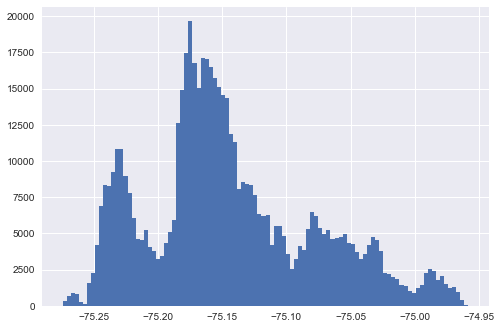

In [942]:
assess['lat'].hist(bins = 100)#histogram of latitude

<AxesSubplot:>

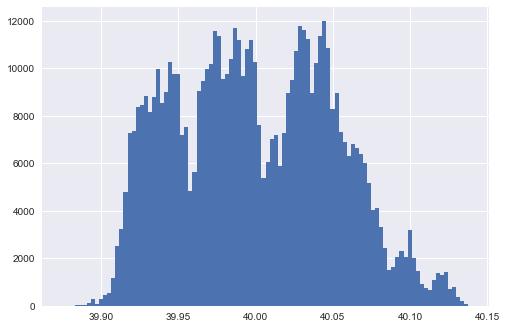

In [943]:
assess['lng'].hist(bins= 100)#histogram of longitude

In [944]:
#combining latitude and longitude data to make geometry column
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(assess["lat"], assess["lng"])]
geometry[:3]

In [945]:
assess = gpd.GeoDataFrame(assess,
                            crs = crs,
                            geometry = geometry)

assess.head()

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


objectid assessment_date basements beginning_point book_and_page  \
0  55242915      1949-01-01       NaN             NaN       0872170   
1  55242916      1949-01-01       NaN             NaN       2620507   
2  55242917      1949-01-01       NaN             NaN       2677268   
3  55242918      1949-01-01       NaN             NaN       2886779   
4  55242919      1949-01-01       NaN             NaN       2886779   

  building_code  building_code_description  category_code  \
0         SR     VACANT LAND RESIDE < ACRE              6   
1         SR     VACANT LAND RESIDE < ACRE              6   
2         SR     VACANT LAND RESIDE < ACRE              6   
3         SR     VACANT LAND RESIDE < ACRE              6   
4         SR     VACANT LAND RESIDE < ACRE              6   

  category_code_description  census_tract  ... utility view_type year_built  \
0               Vacant Land         142.0  ...     NaN       NaN        0.0   
1               Vacant Land         379.0  ...     NaN       NaN        0.0   
2               Vacant Land         142.0  ...     NaN       NaN        0.0   
3               Vacant Land         367.0  ...     NaN       NaN        0.0   
4               Vacant Land         367.0  ...     NaN       NaN        0.0   

   year_built_estimate  zip_code  zoning         pin        lat        lng  \
0                  NaN   19123.0    RSA5  1001317719 -75.144757  39.967847   
1                  NaN   19134.0    RSA5  1001124565 -75.092534  39.991459   
2                  NaN   19123.0    RSA5  1001430746 -75.146154  39.967067   
3                  NaN   19123.0    ICMX  1001206446 -75.145586  39.962679   
4                  NaN   19123.0    ICMX  1001206456 -75.146035  39.962772   

                     geometry  
0  POINT (-75.14476 39.96785)  
1  POINT (-75.09253 39.99146)  
2  POINT (-75.14615 39.96707)  
3  POINT (-75.14559 39.96268)  
4  POINT (-75.14604 39.96277)  

[5 rows x 79 columns]

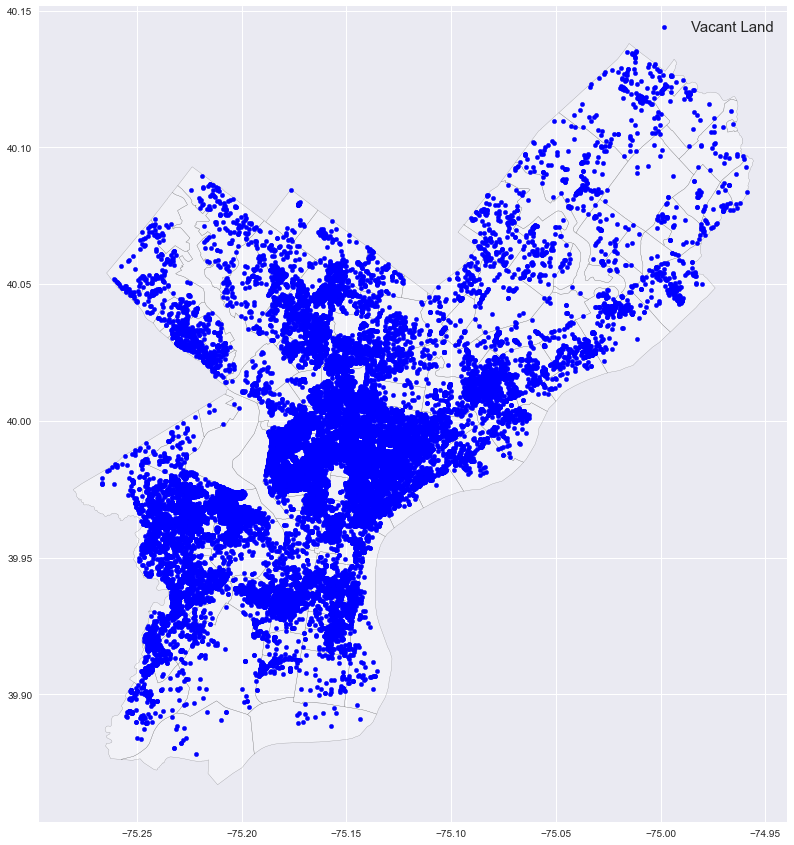

In [946]:
#crime_df = crime_df.to_crs(epsg = 4326)
fig, ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
assess[assess['category_code_description'] == 'Vacant Land'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Vacant Land")
#crime_df[crime_df['text_general_code'] == 'Thefts'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Thefts")
#geo_df.plot(column = 'BUILD_RANK', ax = ax, alpha = 0.5, legend = True, markersize = 10)
plt.legend(prop = {'size' : 15})
plt.show()

### City of Philadelphia: 311 Calls
https://metadata.phila.gov/#home/datasetdetails/5543864d20583086178c4e98/representationdetails/5762e19fa237544b2ecfe722/

In [949]:
philly_311 = pd.read_csv("data/city/311Request_2019.csv")

philly_311.head(10)

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


objectid  service_request_id  status       status_notes  \
0   5933314            12471689  Closed                NaN   
1   5933315            12471188  Closed          Completed   
2   6287831            12579945  Closed                NaN   
3   6287832            12585987  Closed                NaN   
4   6287833            12584999  Closed                NaN   
5   6427983            12629554  Closed  Question Answered   
6   6427985            12629556  Closed                NaN   
7   5776446            12427253    Open                NaN   
8   6540805            12660537  Closed  Question Answered   
9   5933291            12474020  Closed  Question Answered   

                             service_name service_code  \
0                           Street Defect      SR-ST01   
1                      Revenue Escalation          NaN   
2  Rubbish/Recyclable Material Collection      SR-ST03   
3  Rubbish/Recyclable Material Collection      SR-ST03   
4                         Illegal Dumping      SR-ST02   
5                     Information Request      SR-IR01   
6                     Information Request      SR-IR01   
7                      Revenue Escalation          NaN   
8                     Information Request      SR-IR01   
9                     Information Request      SR-IR01   

               agency_responsible   service_notice   requested_datetime  \
0              Streets Department  3 Business Days  2019-02-13 19:50:26   
1              Revenue Department              NaN  2019-02-13 15:28:02   
2              Streets Department  2 Business Days  2019-04-17 13:25:09   
3              Streets Department              NaN  2019-04-22 14:47:16   
4              Streets Department  5 Business Days  2019-04-22 10:48:51   
5  First Judicial District/Courts              NaN  2019-05-14 14:54:39   
6              Streets Department              NaN  2019-05-14 14:55:04   
7              Revenue Department              NaN  2019-01-16 15:00:35   
8  Animal Care and Control - ACCT              NaN  2019-05-30 10:30:20   
9           Department of Records              NaN  2019-02-15 09:30:23   

      updated_datetime    expected_datetime              address zipcode  \
0  2019-02-15 09:31:24  2019-02-18 19:00:00       532 WATKINS ST     NaN   
1  2019-02-15 09:31:25  2019-02-15 10:00:17                  NaN     NaN   
2  2019-04-23 08:01:09  2019-04-18 20:00:00      1423 W TIOGA ST     NaN   
3  2019-04-23 08:01:11  2019-04-23 20:00:00     12601 CALPINE RD     NaN   
4  2019-04-23 08:01:14  2019-04-28 20:00:00  1246 N HOLLYWOOD ST   19121   
5  2019-05-14 14:54:58  2019-05-14 15:00:16                  NaN     NaN   
6  2019-05-14 14:55:22  2019-05-14 15:00:16                  NaN     NaN   
7  2019-01-16 15:00:36  2019-01-16 15:30:16                  NaN     NaN   
8  2019-05-30 10:30:27  2019-05-30 11:00:22                  NaN     NaN   
9  2019-02-15 09:30:32  2019-02-15 10:00:17                  NaN     NaN   

  media_url        lat        lon  
0       NaN  39.927043 -75.155113  
1       NaN        NaN        NaN  
2       NaN  40.006315 -75.152884  
3       NaN  40.098897 -74.971720  
4       NaN  39.975887 -75.183814  
5       NaN        NaN        NaN  
6       NaN        NaN        NaN  
7       NaN        NaN        NaN  
8       NaN        NaN        NaN  
9       NaN        NaN        NaN

In [950]:
philly_311.columns

Index(['objectid', 'service_request_id', 'status', 'status_notes',
       'service_name', 'service_code', 'agency_responsible', 'service_notice',
       'requested_datetime', 'updated_datetime', 'expected_datetime',
       'address', 'zipcode', 'media_url', 'lat', 'lon'],
      dtype='object')

In [951]:
philly_311.dtypes

objectid                int64
service_request_id      int64
status                 object
status_notes           object
service_name           object
service_code           object
agency_responsible     object
service_notice         object
requested_datetime     object
updated_datetime       object
expected_datetime      object
address                object
zipcode                object
media_url              object
lat                   float64
lon                   float64
dtype: object

In [952]:
philly_311.isna().sum()

objectid                   0
service_request_id         0
status                     0
status_notes          307158
service_name               0
service_code          101992
agency_responsible         3
service_notice        390564
requested_datetime         0
updated_datetime           0
expected_datetime          0
address               329515
zipcode               594034
media_url             578638
lat                   350470
lon                   350470
dtype: int64

In [953]:
philly_311.describe()

objectid  service_request_id            lat            lon
count  6.230420e+05        6.230420e+05  272572.000000  272572.000000
mean   6.847379e+06        1.272970e+07      39.990820     -75.152511
std    6.574168e+05        1.928838e+05       0.052109       0.103089
min    5.690931e+06        1.239670e+07      31.798323    -106.401761
25%    6.289357e+06        1.256194e+07      39.951036     -75.185402
50%    6.898952e+06        1.272900e+07      39.986678     -75.159537
75%    7.396704e+06        1.289744e+07      40.028212     -75.121924
max    1.147772e+07        1.306357e+07      40.137508     -74.959341

In [954]:
philly_311.lat.replace(-1, None, inplace = True)
philly_311.lon.replace(-1, None, inplace = True)

In [955]:
philly_311.shape

(623042, 16)

In [956]:
philly_311.isnull().sum(axis=0)
philly_311.shape

(623042, 16)

In [958]:
philly_311.isnull().sum(axis=0)

objectid                   0
service_request_id         0
status                     0
status_notes          307158
service_name               0
service_code          101992
agency_responsible         3
service_notice        390564
requested_datetime         0
updated_datetime           0
expected_datetime          0
address               329515
zipcode               594034
media_url             578638
lat                   350470
lon                   350470
dtype: int64

In [959]:
philly_311['service_name'].value_counts()

Information Request                       279286
Revenue Escalation                         41491
Agency Receivables                         37150
Rubbish/Recyclable Material Collection     34983
Illegal Dumping                            28210
                                           ...  
Right-of-Way                                   4
Emergency Air Conditioning                     1
Complaint against Fire or EMS                  1
No Heat Residential                            1
Maintenance Complaint                          1
Name: service_name, Length: 61, dtype: int64

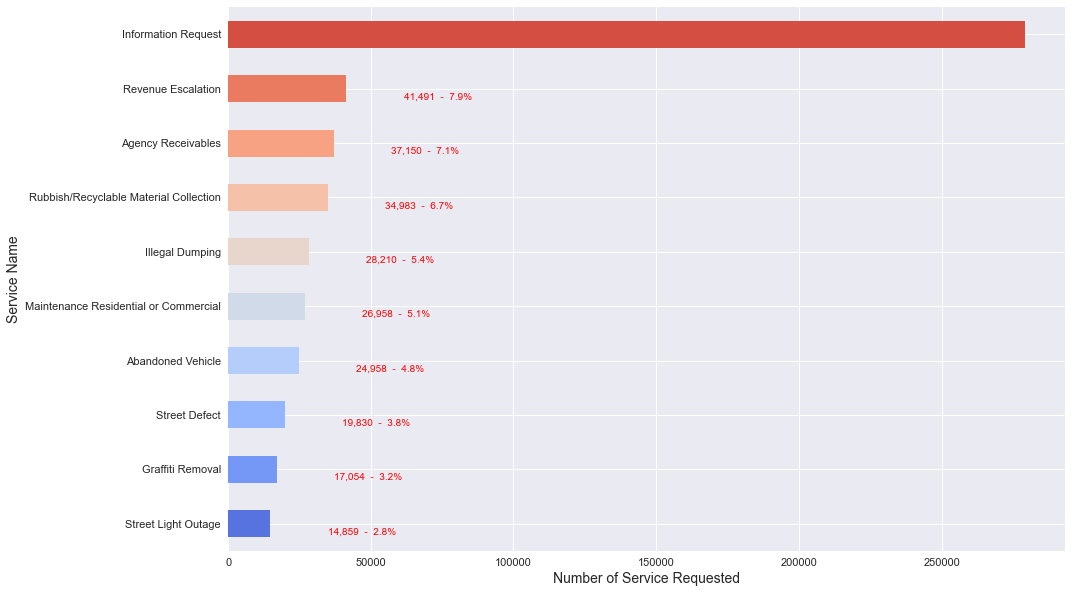

In [960]:
#plotting bar chart based on service(name) type requested
philly_service = philly_311['service_name'].value_counts().head(10).sort_values()
philly_service.plot(kind='barh',figsize=(15,10),fontsize=11, color=sns.color_palette('coolwarm',len(philly_service)))
plt.ylabel('Service Name', fontsize = 14)
plt.xlabel('Number of Service Requested', fontsize = 14)


# Include the number of service name and the corresponding percentage for every type

for index, value in enumerate(philly_service):    
    label = str(format(int(value), ',')) + '  -  {}%'.format(round( (value/philly_service.sum())*100, 1)) 
    plt.annotate(label, xy = (value + 20000, index - 0.2 ), color = 'red')

<AxesSubplot:>

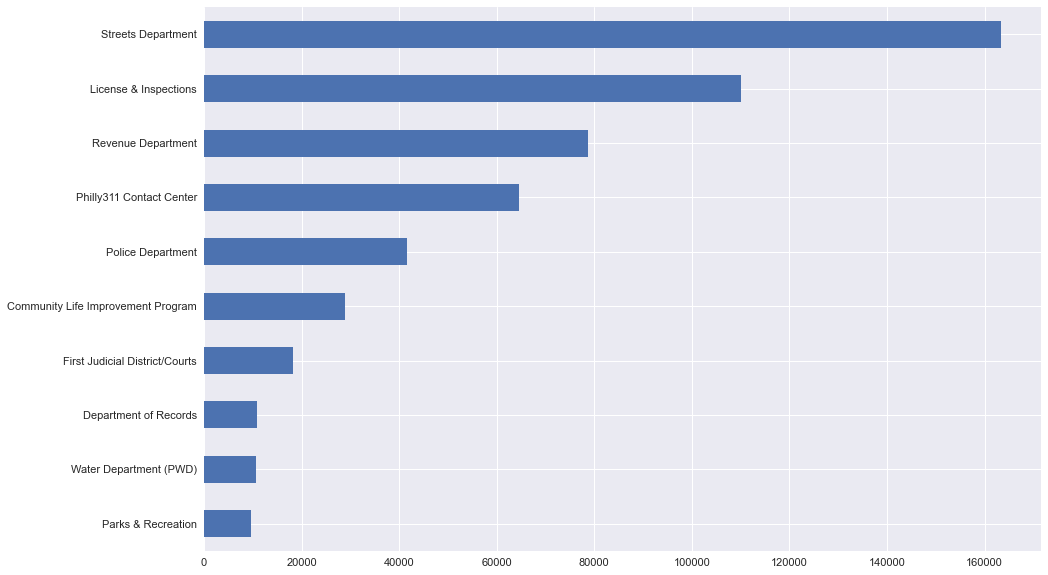

In [961]:
#Agencies responsible for 311 calls. Most of the calls are for the Street Department
philly_agency = philly_311['agency_responsible'].value_counts().head(10).sort_values()
philly_agency.plot(kind='barh',figsize=(15,10),fontsize=11)

In [962]:
#creating geometry column based on longitude and latitude data
crs= {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(philly_311["lon"],philly_311["lat"])]

philly_311 = gpd.GeoDataFrame(philly_311,
                            crs = crs,
                            geometry = geometry)

philly_311.head()

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


objectid  service_request_id  status status_notes  \
0   5933314            12471689  Closed          NaN   
1   5933315            12471188  Closed    Completed   
2   6287831            12579945  Closed          NaN   
3   6287832            12585987  Closed          NaN   
4   6287833            12584999  Closed          NaN   

                             service_name service_code  agency_responsible  \
0                           Street Defect      SR-ST01  Streets Department   
1                      Revenue Escalation          NaN  Revenue Department   
2  Rubbish/Recyclable Material Collection      SR-ST03  Streets Department   
3  Rubbish/Recyclable Material Collection      SR-ST03  Streets Department   
4                         Illegal Dumping      SR-ST02  Streets Department   

    service_notice   requested_datetime     updated_datetime  \
0  3 Business Days  2019-02-13 19:50:26  2019-02-15 09:31:24   
1              NaN  2019-02-13 15:28:02  2019-02-15 09:31:25   
2  2 Business Days  2019-04-17 13:25:09  2019-04-23 08:01:09   
3              NaN  2019-04-22 14:47:16  2019-04-23 08:01:11   
4  5 Business Days  2019-04-22 10:48:51  2019-04-23 08:01:14   

     expected_datetime              address zipcode media_url        lat  \
0  2019-02-18 19:00:00       532 WATKINS ST     NaN       NaN  39.927043   
1  2019-02-15 10:00:17                  NaN     NaN       NaN        NaN   
2  2019-04-18 20:00:00      1423 W TIOGA ST     NaN       NaN  40.006315   
3  2019-04-23 20:00:00     12601 CALPINE RD     NaN       NaN  40.098897   
4  2019-04-28 20:00:00  1246 N HOLLYWOOD ST   19121       NaN  39.975887   

         lon                    geometry  
0 -75.155113  POINT (-75.15511 39.92704)  
1        NaN                 POINT EMPTY  
2 -75.152884  POINT (-75.15288 40.00632)  
3 -74.971720  POINT (-74.97172 40.09890)  
4 -75.183814  POINT (-75.18381 39.97589)

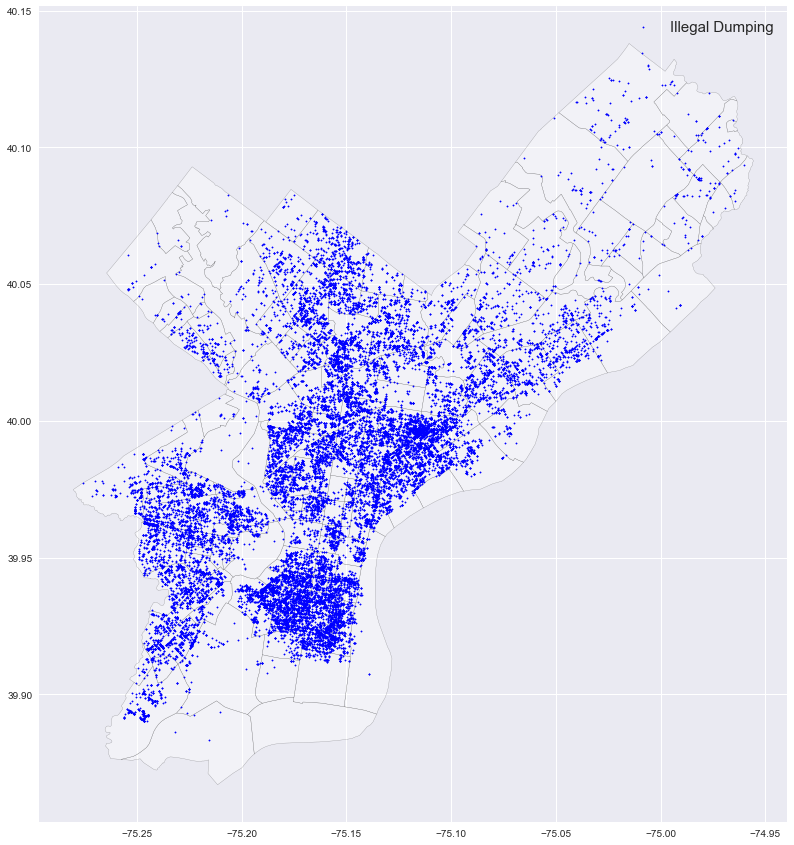

In [963]:
#plotting for Illegal Dumping service
fig, ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
philly_311[philly_311['service_name'] == 'Illegal Dumping'].plot(ax = ax, markersize = 2, color = "blue", marker = "o", label = "Illegal Dumping")

plt.legend(prop = {'size' : 15})
plt.show()

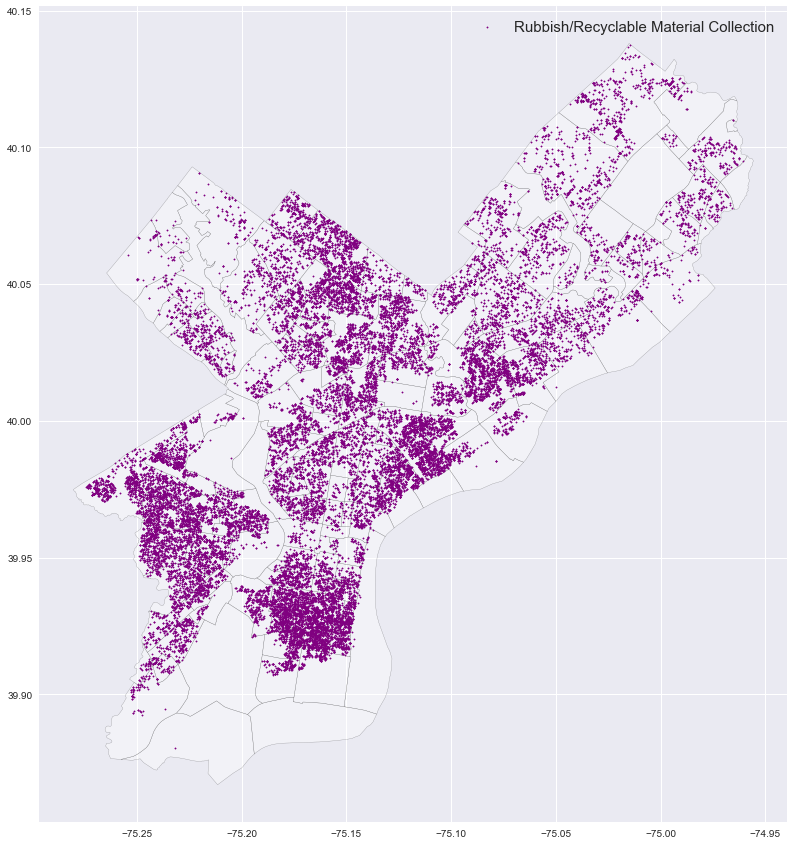

In [965]:
#plotting for Rubbish/Recyclable Material Collection service
fig, ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
philly_311[philly_311['service_name'] == 'Rubbish/Recyclable Material Collection'].plot(ax = ax, markersize = 2, color = "purple", marker = "o", label = "Rubbish/Recyclable Material Collection")
plt.legend(prop = {'size' : 15})
plt.show()